<a href="https://colab.research.google.com/github/cinthyaejh/EEG_ECoG_Signal_Translation/blob/main/ECoG_to_EEG_Kalman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Focus on ECoG Channel 18, 26, 27, 36 for FP1 and 92, 104 for O1
#FP1 = ECoGChannel 18, 26, 27, 36 (assuming FP1 represents row 1)
#O1 = EcoGChannel 92, 104 (assuming O1 represents row 17)
#ECoG - each column = 0.001 second (1000 samples per second)
#EEG - each column = 0.00024414 seconds (4096 samples per second)
'''
used EEGCOmp for syncing the readngs

EEG: data are taken from 18087 to 320907 and totally 302820 points...
ECoG: data are taken from 11334 to 314147 and totally 302813 points...
'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

eeg_data = pd.read_csv('/content/EEG_sync.csv')
ecog_data = pd.read_csv('/content/ECoG_sync.csv')

#for 1 s
#0 -> trigger, 1 = FP1, 17 = O1
eeg_channels = eeg_data.iloc[0:100, [1, 17]]
ecog_channels = ecog_data.iloc[0:100, [18, 26, 27, 36, 92, 104]]


In [ ]:
import pandas as pd

# Assuming eeg_data and ecog_data are already loaded from CSV files

# For EEG data: Extracting rows by index
eeg_rows = eeg_data.iloc[[1, 17], :]  # Selects rows at index 1 and 17, all columns

# For ECoG data: Extracting rows by index
ecog_rows = ecog_data.iloc[[18, 26, 27, 36, 92, 104], :]  # Selects rows at specified indices, all columns

# Saving the extracted rows to their own CSV files
eeg_rows.to_csv('eeg_rows.csv', index=False)
ecog_rows.to_csv('ecog_rowsss.csv', index=False)


In [ ]:
from google.colab import files
files.download('ecog_rows.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Length of the eeg_FP1: 1428
Length of the ecog18: 2502
Length of the ecog26: 2819
Length of the ecog27: 2559
Length of the ecog36: 2598


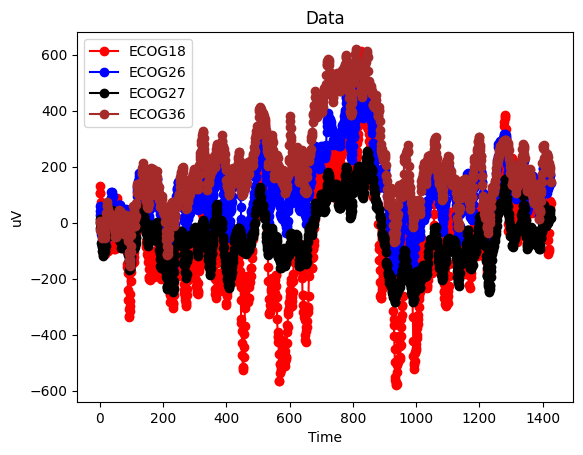

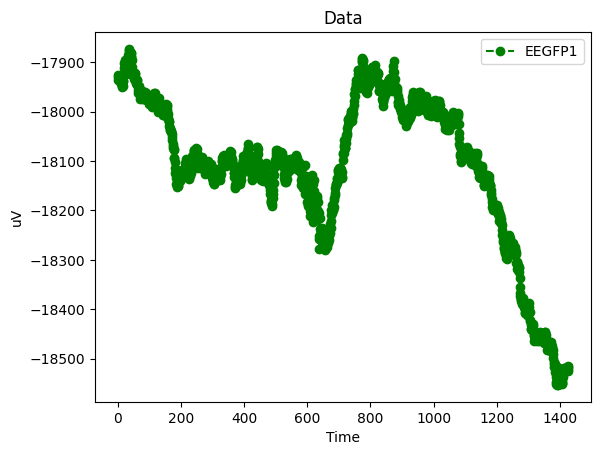

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#manuallyy getting the TRAINING VALUES
eeg_FP1 = np.array([-17936,-17925,-17929,-17936,-17935,-17929,-17933,-17931,-17929,-17931,-17930,-17932,-17944,-17947,-17938,-17950,-17949,-17937,-17938,-17922,-17911,-17901,-17900,-17895,-17905,-17922,-17923,-17924,-17916,-17921,-17915,-17913,-17905,-17898,-17886,-17880,-17873,-17876,-17886,-17891,-17887,-17882,-17882,-17888,-17889,-17896,-17910,-17919,-17920,-17921,-17927,-17933,-17927,-17926,-17924,-17921,-17929,-17936,-17942,-17942,-17935,-17936,-17946,-17943,-17957,-17962,-17948,-17950,-17948,-17957,-17967,-17975,-17967,-17958,-17958,-17958,-17959,-17960,-17959,-17967,-17966,-17974,-17975,-17971,-17973,-17965,-17961,-17967,-17968,-17962,-17969,-17972,-17968,-17968,-17969,-17979,-17978,-17979,-17972,-17982,-17985,-17975,-17982,-17980,-17978,-17977,-17978,-17981,-17987,-17984,-17990,-17988,-17985,-17977,-17963,-17971,-17979,-17963,-17967,-17978,-17979,-17977,-17976,-17972,-17977,-17977,-17986,-18001,-17985,-17972,-17973,-17985,-17991,-17994,-18000,-17998,-18001,-18001,-17991,-17986,-17993,-17985,-17989,-17994,-18007,-18007,-18006,-18005,-17994,-17993,-17990,-17989,-17985,-17986,-17989,-17987,-17998,-17989,-17995,-18004,-18012,-18014,-18019,-18021,-18030,-18038,-18034,-18037,-18039,-18039,-18042,-18046,-18052,-18058,-18066,-18073,-18070,-18076,-18078,-18094,-18093,-18102,-18115,-18124,-18129,-18134,-18146,-18148,-18153,-18149,-18151,-18150,-18134,-18133,-18135,-18134,-18138,-18125,-18132,-18141,-18133,-18132,-18122,-18119,-18122,-18126,-18124,-18121,-18127,-18122,-18133,-18129,-18113,-18116,-18103,-18104,-18108,-18107,-18096,-18102,-18102,-18099,-18100,-18106,-18119,-18111,-18126,-18136,-18130,-18125,-18124,-18123,-18118,-18124,-18116,-18105,-18097,-18089,-18093,-18104,-18088,-18077,-18079,-18078,-18088,-18081,-18081,-18081,-18073,-18078,-18076,-18094,-18106,-18113,-18106,-18094,-18095,-18090,-18101,-18103,-18101,-18104,-18108,-18113,-18101,-18097,-18099,-18091,-18106,-18108,-18109,-18112,-18103,-18108,-18108,-18118,-18127,-18115,-18109,-18118,-18121,-18115,-18112,-18113,-18105,-18099,-18111,-18114,-18111,-18109,-18121,-18123,-18124,-18122,-18106,-18105,-18107,-18112,-18114,-18122,-18134,-18134,-18143,-18139,-18146,-18147,-18140,-18141,-18136,-18126,-18118,-18116,-18127,-18141,-18138,-18129,-18131,-18125,-18122,-18127,-18122,-18131,-18133,-18129,-18139,-18132,-18126,-18116,-18115,-18110,-18099,-18100,-18093,-18089,-18089,-18095,-18093,-18097,-18088,-18100,-18092,-18092,-18100,-18109,-18104,-18090,-18095,-18090,-18092,-18089,-18096,-18097,-18088,-18085,-18085,-18080,-18083,-18086,-18090,-18093,-18082,-18096,-18097,-18103,-18106,-18112,-18111,-18111,-18124,-18124,-18132,-18148,-18154,-18152,-18150,-18142,-18133,-18125,-18122,-18132,-18130,-18131,-18131,-18137,-18140,-18138,-18147,-18142,-18138,-18126,-18138,-18126,-18128,-18125,-18118,-18105,-18098,-18099,-18090,-18099,-18094,-18094,-18094,-18093,-18103,-18100,-18104,-18093,-18089,-18086,-18082,-18082,-18073,-18065,-18073,-18086,-18089,-18099,-18103,-18116,-18121,-18121,-18117,-18124,-18126,-18130,-18139,-18136,-18133,-18123,-18123,-18124,-18109,-18123,-18124,-18118,-18112,-18110,-18102,-18089,-18073,-18071,-18071,-18076,-18085,-18100,-18113,-18123,-18130,-18124,-18122,-18120,-18123,-18131,-18137,-18138,-18130,-18128,-18137,-18141,-18135,-18135,-18134,-18139,-18137,-18135,-18131,-18119,-18110,-18104,-18106,-18124,-18135,-18133,-18142,-18140,-18138,-18138,-18134,-18142,-18148,-18153,-18159,-18166,-18182,-18178,-18180,-18184,-18190,-18186,-18177,-18175,-18167,-18158,-18144,-18128,-18113,-18101,-18099,-18097,-18089,-18084,-18078,-18080,-18081,-18078,-18081,-18086,-18088,-18080,-18088,-18086,-18088,-18094,-18090,-18097,-18095,-18086,-18082,-18090,-18093,-18084,-18092,-18101,-18112,-18110,-18111,-18127,-18135,-18142,-18139,-18141,-18143,-18137,-18137,-18137,-18125,-18122,-18111,-18123,-18114,-18107,-18104,-18105,-18114,-18119,-18110,-18095,-18100,-18106,-18095,-18098,-18095,-18101,-18100,-18105,-18104,-18102,-18115,-18110,-18111,-18110,-18100,-18097,-18087,-18090,-18092,-18093,-18107,-18103,-18117,-18118,-18107,-18105,-18102,-18117,-18118,-18107,-18120,-18124,-18139,-18148,-18120,-18132,-18143,-18143,-18147,-18142,-18155,-18145,-18141,-18109,-18108,-18131,-18167,-18151,-18141,-18130,-18132,-18167,-18183,-18152,-18168,-18191,-18186,-18150,-18150,-18171,-18191,-18202,-18212,-18212,-18186,-18165,-18167,-18171,-18128,-18146,-18177,-18223,-18199,-18167,-18139,-18160,-18202,-18210,-18218,-18206,-18195,-18195,-18212,-18170,-18174,-18182,-18201,-18217,-18252,-18277,-18258,-18206,-18215,-18238,-18250,-18247,-18257,-18244,-18245,-18237,-18235,-18251,-18251,-18241,-18252,-18265,-18270,-18258,-18277,-18279,-18271,-18267,-18276,-18274,-18273,-18268,-18261,-18249,-18266,-18257,-18247,-18252,-18259,-18245,-18235,-18227,-18222,-18235,-18210,-18198,-18206,-18201,-18189,-18200,-18200,-18189,-18193,-18178,-18175,-18169,-18165,-18154,-18146,-18146,-18148,-18144,-18142,-18134,-18137,-18123,-18119,-18119,-18118,-18119,-18113,-18115,-18113,-18120,-18116,-18126,-18134,-18134,-18132,-18122,-18097,-18085,-18084,-18083,-18072,-18058,-18067,-18073,-18073,-18074,-18064,-18055,-18047,-18047,-18044,-18033,-18026,-18016,-18014,-18019,-18019,-18022,-18020,-18016,-18008,-18008,-17999,-18001,-18009,-18013,-18018,-18010,-18005,-18002,-17994,-17986,-17979,-17965,-17968,-17955,-17954,-17949,-17944,-17936,-17942,-17951,-17947,-17940,-17923,-17916,-17915,-17922,-17931,-17935,-17939,-17946,-17952,-17933,-17928,-17917,-17894,-17897,-17899,-17892,-17895,-17898,-17907,-17916,-17920,-17930,-17934,-17937,-17943,-17943,-17952,-17960,-17962,-17955,-17954,-17950,-17949,-17939,-17933,-17926,-17929,-17946,-17941,-17941,-17937,-17926,-17923,-17913,-17914,-17910,-17914,-17910,-17909,-17912,-17916,-17920,-17923,-17931,-17923,-17906,-17918,-17918,-17929,-17933,-17925,-17920,-17927,-17921,-17924,-17940,-17946,-17959,-17959,-17959,-17957,-17956,-17948,-17945,-17943,-17950,-17958,-17963,-17975,-17989,-17978,-17980,-17972,-17965,-17965,-17966,-17965,-17959,-17961,-17963,-17961,-17961,-17954,-17957,-17951,-17948,-17942,-17938,-17934,-17938,-17938,-17933,-17931,-17933,-17942,-17941,-17947,-17953,-17952,-17959,-17956,-17945,-17918,-17907,-17898,-17919,-17937,-17934,-17949,-17954,-17950,-17954,-17956,-17953,-17961,-17957,-17968,-17980,-17986,-17980,-17976,-17981,-17984,-17987,-17991,-17995,-17994,-17993,-18001,-18001,-17997,-18011,-18015,-18009,-18017,-18016,-18017,-18009,-18007,-18004,-18006,-18010,-18011,-18021,-18029,-18022,-18019,-18006,-18009,-18018,-18019,-18009,-18010,-18004,-18012,-17995,-17991,-17996,-18004,-18006,-17993,-17988,-17978,-17970,-17961,-17967,-17965,-17978,-17980,-17981,-17989,-17983,-17979,-17980,-17992,-17987,-17975,-17979,-17988,-17986,-17998,-17996,-17982,-17970,-17964,-17961,-17960,-17966,-17968,-17980,-17985,-17983,-17987,-17978,-17974,-17983,-17985,-17988,-17989,-17980,-17986,-17997,-17994,-17995,-17990,-17982,-17969,-17972,-17979,-17984,-17992,-18004,-18007,-18000,-18000,-17999,-18002,-18003,-17994,-17998,-18005,-18008,-18006,-18005,-18007,-17995,-17990,-17984,-17978,-17985,-17990,-17985,-17978,-17976,-17983,-17988,-17993,-17998,-17998,-17999,-18004,-18011,-18009,-18008,-17997,-17989,-17987,-17979,-17978,-17987,-17996,-17994,-17999,-18003,-18009,-18000,-18010,-18011,-18004,-18006,-18001,-18004,-18005,-18016,-18020,-18019,-18035,-18027,-18029,-18031,-18034,-18027,-18024,-18030,-18037,-18035,-18026,-18027,-18038,-18020,-18011,-18020,-18025,-18020,-18013,-18010,-18011,-18023,-18027,-18025,-18020,-18009,-18007,-18000,-18010,-18009,-18011,-18012,-18017,-18014,-18021,-18025,-18014,-18021,-18022,-18016,-18008,-18002,-18005,-18025,-18044,-18054,-18066,-18072,-18085,-18090,-18092,-18101,-18100,-18094,-18090,-18094,-18096,-18093,-18092,-18085,-18083,-18088,-18080,-18073,-18074,-18075,-18084,-18091,-18085,-18081,-18078,-18072,-18079,-18085,-18084,-18087,-18079,-18086,-18091,-18097,-18098,-18092,-18088,-18103,-18102,-18103,-18106,-18097,-18105,-18104,-18105,-18105,-18102,-18098,-18101,-18097,-18084,-18095,-18089,-18092,-18084,-18087,-18103,-18112,-18120,-18116,-18108,-18114,-18125,-18133,-18125,-18131,-18135,-18120,-18113,-18109,-18110,-18115,-18122,-18130,-18133,-18133,-18136,-18151,-18149,-18149,-18143,-18130,-18132,-18133,-18134,-18130,-18129,-18129,-18132,-18141,-18137,-18142,-18131,-18136,-18142,-18146,-18148,-18149,-18150,-18159,-18165,-18168,-18177,-18183,-18193,-18199,-18184,-18190,-18197,-18193,-18190,-18195,-18199,-18200,-18200,-18190,-18194,-18201,-18202,-18199,-18189,-18195,-18200,-18208,-18203,-18211,-18221,-18212,-18210,-18212,-18218,-18226,-18224,-18225,-18230,-18240,-18249,-18250,-18259,-18263,-18278,-18273,-18276,-18283,-18286,-18286,-18282,-18290,-18296,-18298,-18285,-18277,-18265,-18262,-18255,-18255,-18252,-18249,-18259,-18256,-18260,-18264,-18279,-18278,-18270,-18270,-18281,-18271,-18265,-18278,-18280,-18283,-18288,-18290,-18289,-18280,-18277,-18273,-18284,-18289,-18306,-18305,-18305,-18319,-18321,-18315,-18310,-18314,-18316,-18325,-18336,-18354,-18366,-18373,-18380,-18383,-18379,-18389,-18386,-18379,-18381,-18381,-18378,-18390,-18396,-18396,-18402,-18408,-18407,-18406,-18398,-18394,-18391,-18401,-18403,-18411,-18400,-18404,-18399,-18387,-18396,-18405,-18406,-18423,-18421,-18431,-18440,-18440,-18442,-18442,-18437,-18434,-18434,-18430,-18444,-18452,-18455,-18465,-18460,-18454,-18456,-18454,-18454,-18458,-18462,-18465,-18456,-18460,-18449,-18452,-18447,-18460,-18464,-18458,-18451,-18451,-18445,-18447,-18453,-18447,-18455,-18459,-18454,-18464,-18464,-18460,-18460,-18469,-18463,-18458,-18446,-18446,-18452,-18451,-18459,-18460,-18469,-18471,-18482,-18483,-18480,-18481,-18483,-18482,-18477,-18480,-18482,-18476,-18470,-18467,-18471,-18482,-18474,-18481,-18479,-18483,-18491,-18499,-18506,-18511,-18516,-18510,-18513,-18527,-18530,-18537,-18548,-18551,-18548,-18551,-18553,-18549,-18553,-18548,-18528,-18518,-18519,-18524,-18524,-18528,-18532,-18544,-18549,-18550,-18546,-18550,-18551,-18537,-18531,-18522,-18518,-18527,-18522,-18519,-18525,-18523,-18518,-18525,-18524,-18516,-18520,-18522,-18520,-18524,-18514,-18516])
ecog_18 = np.array([104,129,105,75,65,28,24,29,-8,-16,-46,-79,-102,-101,-114,-101,-85,-113,-93,-55,-55,-46,-24,-33,-66,-100,-97,-89,-80,-51,-42,-5,30,37,52,57,45,44,20,2,-26,-41,-42,-58,-73,-90,-95,-96,-70,-47,-20,26,59,68,86,80,62,36,13,-2,13,28,29,19,9,-7,-58,-66,-56,-64,-48,-45,-41,-17,-8,-4,31,39,43,14,14,-3,-25,-32,-60,-106,-149,-160,-180,-241,-278,-309,-337,-333,-317,-298,-281,-254,-209,-176,-140,-136,-147,-139,-114,-139,-118,-141,-122,-106,-79,-59,-56,-42,-17,-30,-17,3,4,17,11,13,2,-6,-1,-15,7,11,18,36,57,47,72,100,106,127,121,133,138,138,115,77,49,3,-27,-66,-86,-80,-84,-90,-112,-118,-121,-140,-166,-194,-202,-196,-206,-195,-198,-190,-193,-197,-190,-178,-175,-181,-163,-178,-188,-194,-179,-154,-129,-101,-57,-55,-65,-40,-30,-29,-27,-12,-25,-53,-92,-130,-156,-148,-156,-171,-191,-200,-189,-170,-144,-137,-161,-145,-171,-174,-177,-192,-164,-163,-158,-164,-169,-170,-158,-158,-143,-110,-117,-124,-145,-155,-186,-206,-221,-258,-284,-257,-231,-220,-226,-206,-219,-259,-295,-289,-307,-289,-259,-233,-217,-182,-143,-129,-120,-116,-103,-82,-94,-97,-80,-87,-101,-112,-142,-156,-156,-139,-131,-159,-164,-186,-192,-183,-167,-167,-179,-180,-191,-221,-242,-252,-249,-267,-278,-296,-297,-283,-288,-258,-237,-205,-206,-187,-172,-173,-188,-182,-179,-189,-165,-146,-129,-121,-121,-98,-97,-97,-84,-84,-94,-117,-139,-135,-130,-117,-129,-167,-204,-226,-233,-243,-252,-256,-249,-246,-216,-172,-163,-166,-140,-103,-65,-55,-44,-33,-5,30,33,17,4,-21,-55,-76,-94,-146,-144,-148,-139,-114,-97,-80,-62,-47,-30,27,48,85,101,110,126,170,180,165,124,91,85,78,61,26,-18,-5,20,0,-16,-64,-119,-200,-237,-257,-271,-259,-246,-210,-182,-145,-117,-86,-51,-21,12,38,53,37,17,-2,-16,-39,-53,-73,-116,-178,-223,-240,-244,-222,-226,-206,-197,-192,-204,-211,-241,-286,-296,-253,-264,-230,-178,-112,-55,-38,-31,-48,-75,-89,-98,-100,-119,-130,-102,-89,-84,-63,-79,-118,-150,-153,-165,-179,-171,-183,-208,-208,-196,-161,-128,-101,-89,-86,-70,-50,-46,-70,-120,-146,-172,-203,-215,-231,-278,-345,-360,-388,-431,-472,-518,-528,-517,-482,-444,-398,-368,-306,-252,-202,-195,-203,-197,-190,-197,-229,-271,-283,-273,-271,-232,-221,-190,-194,-211,-190,-161,-161,-125,-104,-97,-60,-49,-30,-12,0,24,31,24,38,70,74,48,23,53,110,117,148,162,158,159,185,197,212,228,239,235,237,230,217,219,222,234,276,282,277,274,302,332,361,357,340,280,218,177,144,105,32,-26,-93,-158,-210,-273,-323,-326,-319,-316,-294,-245,-236,-219,-209,-199,-237,-209,-256,-277,-298,-296,-290,-282,-250,-223,-204,-186,-186,-226,-266,-303,-343,-391,-405,-408,-426,-469,-567,-567,-536,-505,-505,-520,-509,-528,-504,-470,-421,-430,-448,-473,-465,-470,-479,-440,-460,-513,-498,-488,-482,-479,-430,-392,-367,-374,-328,-316,-289,-304,-283,-264,-271,-241,-243,-217,-203,-214,-265,-298,-279,-249,-209,-184,-140,-116,-110,-87,-83,-52,-57,-48,-56,-93,-107,-135,-136,-134,-117,-118,-136,-148,-162,-149,-156,-131,-75,-95,-135,-169,-175,-197,-259,-319,-295,-260,-318,-317,-338,-348,-400,-419,-425,-373,-386,-373,-351,-323,-318,-309,-300,-263,-190,-160,-125,-80,-90,-90,-87,-78,-94,-128,-164,-161,-123,-96,-94,-79,-67,-18,14,51,77,111,99,101,75,86,103,143,164,168,159,177,162,116,112,101,119,163,179,179,182,151,174,179,203,220,219,207,209,204,223,242,254,240,236,222,206,201,205,202,219,223,206,208,228,246,265,246,212,213,203,176,163,152,149,157,184,212,245,277,298,295,315,302,267,247,219,205,156,123,94,87,72,78,109,118,130,145,180,215,233,243,237,247,262,270,290,295,282,297,314,328,351,362,367,351,348,335,333,345,360,356,366,367,376,387,375,362,342,308,272,249,229,207,192,198,233,231,260,293,325,333,300,286,299,282,283,251,233,235,226,239,257,283,297,317,346,360,396,430,448,492,555,589,611,592,585,559,549,535,523,484,465,443,436,408,409,408,401,373,361,365,357,342,352,362,360,367,334,336,315,291,269,255,252,221,202,184,163,169,168,164,135,122,92,104,130,182,220,283,354,383,406,399,384,337,296,192,122,66,-6,-81,-96,-134,-169,-213,-263,-271,-268,-256,-237,-228,-212,-191,-158,-131,-120,-99,-69,-64,-44,-23,-16,-20,-34,-15,-25,-35,-53,-42,-45,-25,17,16,-16,-35,-45,-42,-65,-77,-103,-132,-142,-166,-199,-230,-267,-317,-346,-366,-405,-453,-498,-552,-563,-570,-580,-576,-575,-533,-509,-497,-486,-443,-416,-407,-419,-441,-488,-482,-437,-404,-372,-344,-331,-299,-296,-263,-203,-174,-146,-128,-88,-83,-56,-15,-9,-7,-8,-20,1,15,29,-1,-8,-28,-45,-55,-67,-61,-89,-116,-162,-177,-202,-202,-224,-240,-283,-339,-422,-478,-500,-522,-508,-493,-466,-461,-456,-448,-433,-414,-401,-378,-363,-344,-329,-301,-273,-263,-248,-229,-195,-143,-103,-77,-62,-59,-64,-71,-81,-98,-120,-118,-137,-142,-160,-148,-171,-188,-203,-201,-198,-224,-234,-225,-207,-183,-147,-127,-126,-114,-105,-112,-123,-123,-125,-153,-179,-176,-172,-153,-114,-104,-58,-10,30,67,82,90,136,157,140,128,124,135,143,138,108,89,90,79,111,127,129,133,138,135,137,98,63,27,-31,-84,-142,-195,-221,-245,-248,-268,-271,-277,-290,-297,-294,-277,-272,-276,-286,-286,-264,-246,-225,-190,-147,-88,-24,5,23,39,36,16,10,17,23,27,15,2,-27,-74,-64,-79,-75,-65,-58,-64,-86,-92,-97,-80,-58,-52,-39,-15,-10,-50,-81,-100,-99,-130,-134,-163,-174,-156,-154,-147,-136,-120,-125,-127,-135,-133,-136,-155,-165,-184,-175,-156,-147,-136,-98,-65,-59,-91,-110,-131,-150,-183,-224,-235,-191,-180,-195,-179,-147,-120,-116,-121,-113,-78,-48,-12,12,11,3,-12,-76,-98,-113,-110,-108,-104,-118,-89,-53,-22,13,57,48,29,-17,-45,-82,-88,-68,-44,-25,-16,-43,-78,-101,-110,-119,-120,-94,-76,-62,-76,-67,-82,-98,-88,-116,-144,-169,-181,-181,-170,-165,-165,-157,-162,-142,-140,-126,-95,-103,-106,-88,-61,-65,-61,-44,-10,38,62,83,85,93,104,122,148,157,155,148,163,160,170,151,143,137,125,137,144,138,100,115,114,97,94,96,121,154,175,200,236,276,345,359,374,384,381,334,299,254,237,188,131,70,31,-4,-29,-24,-1,30,61,99,125,146,176,217,220,231,209,172,138,118,115,95,73,57,30,-8,-32,-44,-55,-63,-70,-57,-48,-18,2,-10,-7,-14,-23,-27,-20,3,43,70,99,160,158,146,165,179,179,193,199,198,183,128,95,44,22,10,-26,-55,-72,-85,-68,-17,30,62,102,145,147,135,157,178,143,138,130,93,64,35,39,56,93,83,88,117,125,139,153,134,114,99,89,114,129,109,97,101,104,113,108,101,107,115,124,127,99,86,62,50,66,53,10,-1,-6,32,44,45,30,32,56,44,38,25,24,4,-44,-59,-62,-100,-112,-101,-93,-39,13,53,65,78,70,88,95,69,37,-15,-36,-28,-24,-17,-13,3,6,29,79,109,139,135,132,130,141,140,108,95,126,152,202,238,260,269,242,212,205,210,199,195,177,178,175,164,133,117,77,23,-7,-28,-42,-54,-90,-90,-88,-89,-53,-54,-50,-63,-85,-131,-117,-90,-79,-107,-141,-182,-197,-200,-199,-194,-165,-118,-75,-77,-82,-33,-15,41,68,77,69,83,78,73,80,52,30,7,18,44,86,135,159,201,214,241,286,310,304,296,273,252,238,242,220,213,180,163,164,189,187,171,129,106,85,91,123,144,165,185,180,178,165,135,125,128,112,97,96,136,139,128,143,138,129,101,102,128,144,155,153,136,117,100,111,124,142,160,164,146,100,95,122,82,66,85,97,98,71,61,59,67,86,101,71,36,23,-6,11,27,41,42,63,89,107,97,136,145,183,182,205,214,237,246,264,249,243,229,229,240,247,283,288,261,269,288,312,314,306,275,263,244,215,182,188,187,184,170,159,160,136,137,129,114,105,140,158,185,171,178,181,177,160,158,157,157,153,148,148,189,193,172,171,149,137,128,141,149,145,104,86,74,71,67,62,56,27,26,8,-20,-38,-66,-69,-33,-14,-2,11,27,45,55,49,48,48,91,100,108,113,86,54,23,8,1,13,21,44,44,45,74,131,169,192,184,177,178,161,164,139,101,50,4,-15,-28,3,16,45,50,75,104,122,124,114,95,82,120,154,174,172,138,131,118,116,149,173,161,143,116,99,97,94,113,95,76,52,26,24,58,76,84,57,40,29,41,36,55,79,82,86,68,81,72,47,30,20,28,23,32,40,47,16,7,13,18,34,19,23,17,18,35,55,62,76,80,62,56,58,34,29,0,-6,-5,11,19,-7,-21,-32,-62,-58,-44,-22,0,23,70,93,96,84,61,55,8,-28,-71,-112,-117,-149,-152,-163,-163,-140,-120,-106,-65,-48,-20,-28,-6,2,24,63,71,96,117,160,199,217,225,243,240,244,282,298,314,320,319,310,289,270,258,281,239,206,181,145,93,57,1,-15,-15,-5,13,13,22,30,50,49,63,45,38,11,-9,-20,-56,-78,-120,-124,-113,-101,-92,-76,-59,-27,-13,-17,-4,-6,-35,-39,-8,14,61,70,68,103,96,78,60,41,36,4,-19,-29,-33,-34,-22,-49,-71,-109,-149,-181,-200,-200,-184,-174,-159,-130,-122,-51,-30,-28,-15,-2,-2,-30,-88,-142,-145,-174,-191,-184,-193,-196,-167,-118,-83,-39,-6,51,40,44,52,47,67,40,19,13,27,70,121,162,174,168,156,128,112,94,83,122,175,192,175,175,140,127,82,48,24,19,58,94,79,65,38,48,85,118,114,164,229,265,280,270,245,258,266,242,222,210,171,167,152,155,151,132,130,130,136,127,87,63,24,4,-18,-34,-41,-22,-17,-20,-11,-34,-25,-58,-56,-68,-94,-125,-143,-140,-118,-99,-76,-38,-18,-12,-18,-31,-27,-49,-96,-128,-149,-131,-110,-104,-83,-67,-34,-13,1,1,19,33,24,32,36,56,49,47,67,65,66,39,38,61,43,47,48,70,98,103,119,156,206,205,218,204,185,177,123,71,46,28,45,52,37,21,28,35,62,77,62,50,32,39,26,14,19,26,33,49,54,88,140,148,159,143,109,72,44,-2,-11,-18,3,35,70,124,155,147,125,127,127,136,137,139,157,181,202,227,218,224,226,235,217,188,161,152,167,186,198,195,229,211,200,191,195,205,202,204,190,196,233,265,275,229,170,103,52,23,56,62,59,51,29,4,-4,-3,-14,-24,-19,4,26,43,49,45,7,-10,-26,-39,-54,-72,-86,-131,-124,-115,-95,-53,-32,-13,-13,-37,-37,-38,-50,-61,-69,-75,-74,-92,-94,-83,-42,-44,-27,-30,-1,-3,-30,-43,-25,-40,-57,-66,-74,-66,-9,26,68,77,69,64,33,22,28,40,39,59,54,74,76,82,79,84,92,86,52,43,70,83,92,101,80,42,43,70,57,33,11,9,-2,-11,-33,-65,-107,-135,-148,-152,-116,-69,-45,-38,0,15,28,39,21,20,19,22,51,95,83,83,39,4,-1,2,14,41,54,61,48,58,73,114,107,109,82,94,97,97,100,122,155,157,182,207,187,201,222,204,151,90,28,18,21,39,42,65,108,115,131,150,153,165,160,175,194,193,190,181,189,201,181,166,160,182,177,145,129,161,177,193,188,156,129,70,25,12,21,0,16,6,-1,-13,-9,14,28,48,45,48,19,1,-30,-45,-34,-50,-34,-37,-52,-58,-44,-24,-18,21,19,38,47,58,63,92,119,151,169,140,95,43,-3,-20,-25,-27,-50,-58,-31,8,19,24,45,77,93,99,121,159,203,207,219,200,174,129,86,56,45,46,13,-11,-19,-12,-22,-16,-16,-12,-15,23,56,59,64,52,35,0,-15,-24,-42,-86,-55,-51,-47,11,24,32,64,75,68,72,101,158,178,167,186,157,158,172,180,161,153,182,170,151,113,136,103,50,38,48,61,70,94,132,137,124,111,123,126,111,110,134,138,145,154,145,143,170,174,162,158,135,126,152,158,154,137,135,107,94,83,54,60,89,125,128,127,149,137,155,171,161,168,177,188,173,170,187,183,177,183,179,173,167,152,161,153,152,155])
ecog_26 = np.array([59,40,27,20,5,-40,-53,-65,-84,-88,-93,-89,-79,-61,-77,-70,-50,-69,-47,-22,-14,9,36,45,45,39,53,57,46,34,20,27,57,67,86,109,89,86,92,109,89,93,70,54,59,27,7,10,18,1,-12,-7,-12,-4,-5,-5,-1,6,18,29,63,63,61,50,63,62,47,17,10,13,14,-4,11,17,11,8,19,-3,10,12,21,29,29,40,48,34,18,13,-4,-18,-23,-56,-81,-123,-131,-130,-133,-141,-134,-120,-103,-72,-81,-49,-26,-16,13,4,-6,1,7,-5,-13,20,37,44,70,93,111,122,131,148,137,157,165,176,175,158,149,150,165,154,173,184,185,201,187,199,178,169,156,138,120,106,82,48,37,43,14,-2,-19,-29,-32,-22,-25,-13,15,24,50,54,67,71,66,63,76,79,83,88,99,90,80,87,91,105,124,123,133,148,146,155,156,157,139,111,99,100,96,77,47,31,0,-9,-23,-15,-20,-17,-8,-15,-20,-22,-34,-27,-29,-30,-6,2,20,22,18,9,-1,-26,-54,-55,-47,-46,-42,-35,-55,-55,-41,-52,-50,-55,-104,-121,-137,-145,-175,-154,-152,-165,-144,-142,-141,-115,-80,-42,-6,26,60,83,95,119,115,122,145,144,141,149,133,121,115,140,125,116,107,108,104,110,110,95,87,95,81,50,21,5,-23,-33,-57,-63,-59,-48,-62,-44,-25,-9,-26,-18,14,27,34,31,35,41,67,70,79,68,86,112,114,132,137,136,137,154,159,173,172,166,145,128,91,69,68,69,49,51,48,43,64,68,72,76,98,123,149,159,192,191,197,217,215,210,206,215,206,190,182,156,144,116,99,67,49,46,44,4,4,20,2,-2,-3,-1,2,-4,-11,-2,32,41,65,73,77,75,70,97,96,101,123,125,141,139,129,151,187,204,222,229,210,211,206,191,176,168,154,149,153,160,180,174,177,185,183,186,174,161,141,126,102,75,55,41,21,-2,-10,-29,-29,-39,-44,-44,-56,-44,-46,1,-2,-5,-10,-16,-5,-10,7,37,46,63,48,72,96,132,126,142,135,153,163,168,165,163,151,153,146,152,168,165,164,177,170,181,188,194,172,182,155,141,127,96,54,11,-3,-19,-15,-13,-16,-9,-24,-12,-23,-28,-45,-57,-70,-49,-42,-54,-54,-41,-39,-45,-32,-28,-21,-11,8,-7,2,4,10,18,39,41,49,46,40,47,64,65,69,76,91,107,130,130,163,163,164,190,203,229,224,258,266,286,303,320,336,334,351,338,320,314,286,279,270,261,269,285,278,255,220,225,228,231,209,206,189,168,149,100,99,86,57,25,15,4,0,22,45,54,73,80,92,91,101,118,129,129,139,117,103,100,103,80,74,106,136,145,159,173,166,173,164,165,136,112,99,101,97,82,70,64,55,32,38,25,21,14,32,36,20,47,61,64,55,28,32,17,1,0,-3,-15,-39,-22,-15,-8,6,41,51,78,85,87,98,116,151,151,148,136,146,125,81,69,96,114,101,128,128,115,116,109,113,120,137,166,166,168,174,152,155,130,100,82,64,50,41,54,67,70,64,81,67,81,79,92,76,95,94,75,70,67,61,41,27,20,15,-7,19,45,58,90,94,95,104,139,141,161,163,147,130,146,168,190,192,194,210,224,254,245,234,243,235,241,252,255,274,256,241,212,221,208,212,201,199,203,208,221,191,200,195,228,250,250,256,275,267,248,232,259,273,261,253,236,240,240,229,239,250,258,278,325,343,359,365,380,391,381,372,365,371,369,366,351,358,342,350,329,333,326,289,283,277,293,291,301,318,313,302,297,298,314,317,309,321,299,296,298,282,280,273,278,273,278,290,302,313,322,327,331,347,343,341,344,352,354,361,380,393,391,403,428,443,448,455,452,451,428,396,383,372,353,332,330,310,285,271,259,236,232,222,240,244,256,274,307,312,306,310,331,341,359,372,396,402,396,402,398,395,414,429,444,452,479,491,479,490,479,477,446,422,447,433,389,392,394,379,373,379,396,400,400,398,424,439,442,449,441,443,463,477,464,447,439,440,440,414,411,402,406,383,385,390,361,352,337,321,284,280,256,233,228,225,223,218,190,191,184,163,160,176,181,160,171,160,167,167,165,163,151,137,137,139,129,127,128,128,139,137,140,147,157,178,198,197,192,199,187,168,152,153,132,115,96,86,72,55,50,32,-2,-8,-2,-15,-21,0,-24,-40,-52,-58,-77,-104,-119,-134,-136,-158,-159,-172,-170,-168,-174,-160,-149,-138,-148,-128,-127,-122,-107,-82,-68,-46,-43,-47,-59,-34,-17,-11,16,13,8,15,20,38,65,71,88,115,120,136,142,125,104,109,92,86,67,62,62,49,43,49,13,-18,-31,-60,-72,-80,-95,-86,-118,-140,-141,-139,-156,-166,-186,-182,-163,-152,-121,-90,-63,-63,-48,-19,-16,-1,4,13,16,-4,-24,-17,-28,-29,-31,-50,-45,-10,5,28,45,54,56,47,53,45,27,19,9,21,25,34,30,26,29,46,55,57,55,76,77,82,112,133,158,142,130,128,124,118,127,117,113,117,101,99,107,102,125,142,157,186,184,172,197,216,190,178,164,159,148,127,112,115,92,67,85,89,115,133,129,129,91,52,30,16,-13,-34,-23,-2,17,38,47,59,64,71,81,79,110,127,139,146,156,159,168,194,199,182,176,177,166,159,144,149,143,142,128,127,145,139,134,114,114,98,105,99,107,91,82,62,24,13,-4,-5,-19,-44,-58,-53,-67,-52,-32,-13,31,41,65,69,81,85,83,60,58,54,42,49,55,51,63,63,91,77,85,92,121,122,159,175,171,176,174,152,134,115,75,50,21,26,26,25,15,10,21,36,36,66,92,96,123,135,150,151,151,146,135,134,143,159,177,189,208,201,211,241,256,266,241,223,209,183,179,178,171,171,144,146,106,100,105,80,99,85,77,89,99,79,48,28,-8,-18,-22,-30,-67,-66,-75,-87,-94,-99,-68,-74,-73,-38,-25,-9,5,37,63,70,93,87,91,95,90,109,116,123,142,150,151,178,191,213,224,239,271,282,273,281,280,286,291,272,289,283,271,273,291,273,279,284,289,301,316,313,302,307,316,310,301,313,304,290,257,226,210,201,174,181,186,198,191,179,179,161,157,161,178,153,156,128,120,113,118,125,119,119,112,119,112,108,94,85,98,101,91,91,109,126,129,116,124,128,127,122,124,132,123,139,156,150,161,171,179,189,220,225,226,219,168,151,137,131,132,107,72,59,40,40,52,57,62,65,74,96,108,107,126,135,128,128,127,145,143,157,167,160,142,115,121,116,96,92,87,86,102,107,116,126,118,106,113,102,84,73,38,23,29,18,26,65,83,78,105,109,128,141,174,194,191,177,169,154,147,132,110,110,106,120,120,107,116,119,124,135,139,129,134,161,151,170,169,140,107,106,98,86,71,58,79,89,93,119,127,135,143,140,142,136,117,119,105,88,92,95,98,119,102,120,132,138,142,145,144,155,172,161,162,150,146,149,152,146,157,149,135,128,117,110,83,45,12,23,29,30,13,13,-10,-10,-47,-36,-45,-51,-59,-68,-62,-57,-66,-65,-38,-6,21,39,15,24,48,49,60,64,59,65,56,59,65,55,71,97,83,112,125,144,163,173,196,207,234,258,263,263,238,227,205,185,170,135,120,99,67,30,39,41,44,57,36,33,40,55,54,79,68,65,65,62,59,80,89,91,68,68,98,133,138,156,153,145,159,179,188,172,174,168,162,154,144,148,162,177,169,187,189,179,184,193,161,128,136,128,118,87,56,67,56,51,28,0,-10,-15,-10,3,26,42,40,53,56,69,77,90,113,130,139,153,132,127,141,136,140,142,148,149,159,192,214,248,264,314,324,324,317,281,248,207,174,140,114,106,88,63,35,7,-25,-42,-38,-17,-18,-25,-11,-32,-36,-35,-48,-46,-47,-36,-27,-25,-12,2,13,33,71,90,101,119,127,137,143,146,148,128,120,117,95,99,99,90,89,78,60,15,19,43,34,38,24,16,3,-13,-25,-19,-12,1,17,26,45,29,38,66,88,105,132,151,179,210,224,257,269,249,266,284,277,268,255,238,222,185,156,140,127,81,43,31,33,44,20,21,10,-1,5,12,19,37,27,4,8,20,21,20,20,23,61,78,94,115,144,147,147,184,190,181,167,162,156,132,96,71,49,50,30,0,8,-10,-4,-11,-23,11,6,10,34,59,61,62,38,21,18,11,10,24,22,15,8,17,18,16,19,41,60,67,94,92,91,100,98,79,81,84,81,67,75,77,84,99,101,87,99,97,132,135,152,164,138,135,109,83,59,33,-5,-2,-19,-28,-38,-46,-37,-35,-45,-58,-59,-63,-70,-97,-97,-86,-77,-74,-58,-42,-23,7,23,50,85,113,157,154,173,188,215,221,231,232,249,253,263,240,216,207,163,142,95,62,54,46,41,52,55,56,60,60,56,26,10,8,-10,-31,-54,-84,-103,-130,-148,-169,-190,-190,-187,-168,-143,-114,-94,-77,-41,-12,16,28,58,67,47,31,39,18,23,2,-3,15,-5,-2,-7,-14,-21,-27,-34,-70,-99,-106,-113,-132,-156,-182,-173,-185,-188,-186,-157,-125,-130,-106,-80,-44,-11,9,18,35,30,19,12,11,23,10,4,3,4,-1,7,14,11,19,26,47,62,80,96,92,92,100,97,92,92,91,97,99,131,108,89,91,87,91,70,63,68,60,68,88,95,80,84,50,58,50,62,85,68,42,32,36,58,46,35,35,63,90,101,82,45,46,56,48,33,13,3,22,31,37,34,6,-11,-12,17,26,16,28,23,21,20,-5,-15,-17,-12,-4,-20,-32,-20,-41,-37,-38,-55,-55,-47,-24,1,15,31,49,35,10,-7,-14,-23,-37,-69,-100,-111,-126,-117,-110,-97,-54,-18,15,15,23,33,31,36,24,28,42,22,3,10,11,22,7,3,14,25,46,62,86,115,143,152,181,199,198,217,188,160,157,139,105,103,90,99,91,93,82,76,71,80,76,74,88,83,65,41,21,24,-2,-7,-4,10,-6,21,-5,-18,-40,-58,-64,-64,-70,-49,-20,-27,-23,-23,-12,-1,4,-15,-14,-1,1,-8,-1,15,32,43,55,78,95,103,124,122,127,128,109,117,129,114,119,109,93,103,116,116,124,124,131,105,116,132,124,101,88,72,38,25,20,21,18,9,-6,-25,6,8,12,23,5,9,34,64,87,94,103,92,89,87,76,84,85,77,59,92,103,113,143,171,180,189,191,202,211,192,185,174,154,139,113,102,90,72,49,29,17,0,-5,-18,-4,12,19,22,3,-1,9,25,11,16,0,22,49,54,45,69,90,95,114,112,148,164,187,197,223,238,221,205,203,205,196,191,173,167,153,152,143,142,142,136,117,123,139,158,176,176,167,136,120,115,105,104,84,107,100,113,103,79,83,94,90,97,112,116,86,63,50,22,4,5,-15,-34,-65,-77,-91,-100,-93,-78,-48,-47,-10,-1,4,-2,24,35,43,46,36,28,14,3,-16,-26,-32,-28,-19,-10,-20,-32,-6,1,11,7,33,38,48,57,47,62,54,54,58,61,71,89,81,78,103,96,104,88,91,80,80,52,32,11,-5,-6,-12,-17,-30,-19,-38,-31,-27,-18,-10,7,33,39,41,26,7,-12,-25,-44,-48,-36,-38,-41,-30,-27,-25,-14,3,20,53,56,57,56,73,77,80,82,76,71,78,62,43,48,63,54,43,47,64,46,53,52,81,86,98,107,134,136,129,116,88,100,111,103,84,50,24,4,3,16,33,63,72,75,91,98,119,114,114,108,107,108,99,104,99,94,63,67,67,72,86,75,80,101,111,83,63,66,104,119,98,100,96,97,110,97,73,71,74,94,107,93,111,104,113,101,93,96,77,88,114,126,123,132,122,108,82,79,85,83,60,47,66,66,76,85,102,108,86,61,70,68,77,67,65,66,49,42,50,81,117,149,156,166,152,125,133,146,143,134,130,128,99,94,93,88,68,67,57,75,87,109,117,132,130,127,138,129,93,82,65,50,42,33,25,25,14,41,59,52,54,66,73,64,74,86,94,83,75,63,69,64,80,82,58,36,47,55,84,79,97,103,89,89,98,88,96,93,89,81,68,51,62,62,43,38,35,23,23,28,28,37,40,47,61,70,101,103,108,111,91,75,75,85,76,55,39,41,38,34,35,37,43,55,62,78,95,110,94,81,68,34,23,15,5,-6,21,32,26,36,44,33,64,71,93,116,108,110,94,80,71,65,67,66,59,52,44,64,83,100,96,91,92,116,132,119,101,102,99,81,74,55,42,26,-4,-17,-24,7,12,22,25,42,62,65,95,93,97,102,97,108,105,114,108,96,90,85,54,34,55,65,66,40,38,47,60,52,71,67,64,54,52,35,51,56,28,18,8,-9,-20,-29,-37,-29,5,27,55,78,95,96,103,87,92,113,101,101,92,83,100,120,121,128,129,160,175,184,173,179,189,182,151,141,110,99,61,56,72,67,30,28,44,28,16,27,33,22,30,45,60,42,39,35,25,24,19,4,0,-2,5,13,39,44,70,80,91,89,94,92,92,96,88,102,100,108,102,82,87,98,94,98,124,133,147,143,138,145,156,148,120,111,104,106,102,94,83,85,69,61,62,85,104,117,105,131,134,142,132,148,158,151,139,133,141,144,136,132,114,80,71,48,68,67,86,87,69,82,58,58,46,24,21,23,27,42,57,55,60,62,62,91,95,107,124,116,144])
ecog_27 = np.array([12,0,-19,-27,-29,-72,-82,-88,-103,-108,-120,-115,-97,-83,-95,-99,-82,-107,-84,-51,-40,-22,-2,5,13,-9,-12,-18,-25,-45,-47,-28,-1,0,12,33,25,12,36,45,40,42,33,22,30,17,3,6,6,-7,-26,-15,-27,-30,-49,-45,-52,-52,-55,-45,-50,-59,-61,-67,-62,-66,-69,-91,-72,-76,-79,-90,-74,-75,-65,-67,-63,-59,-59,-53,-43,-31,-35,-43,-35,-46,-71,-70,-87,-109,-117,-135,-139,-169,-165,-165,-166,-159,-146,-122,-100,-88,-85,-75,-72,-75,-65,-77,-93,-78,-77,-81,-89,-72,-52,-57,-23,1,14,23,32,46,35,39,45,28,38,24,19,28,38,27,46,43,52,56,41,46,39,23,21,11,4,2,-6,-36,-38,-27,-45,-55,-68,-85,-75,-73,-67,-67,-55,-33,-22,-10,-8,-10,-8,-16,-20,-31,-38,-46,-45,-52,-59,-62,-63,-50,-43,-38,-32,-25,-22,-21,1,-9,-17,-40,-54,-53,-60,-74,-98,-114,-130,-156,-160,-162,-154,-151,-149,-160,-164,-144,-159,-145,-140,-143,-138,-149,-145,-149,-157,-179,-196,-225,-239,-231,-229,-209,-192,-179,-167,-155,-141,-131,-127,-120,-135,-155,-155,-185,-216,-209,-239,-236,-232,-247,-236,-208,-178,-143,-117,-87,-56,-57,-44,-35,-45,-59,-52,-38,-47,-40,-55,-48,-48,-41,-35,-31,-33,-32,-42,-35,-42,-53,-64,-78,-86,-111,-134,-151,-150,-152,-178,-180,-183,-184,-197,-185,-138,-131,-123,-111,-77,-63,-59,-48,-50,-51,-46,-50,-58,-60,-56,-51,-61,-67,-67,-66,-57,-49,-35,-22,-16,-22,-38,-40,-63,-76,-79,-85,-101,-111,-117,-121,-99,-95,-89,-87,-80,-72,-52,-34,-28,-23,-20,-2,-1,3,6,10,-3,-7,-19,-22,-12,-40,-45,-43,-41,-62,-54,-86,-95,-93,-118,-135,-150,-160,-159,-173,-185,-186,-167,-161,-144,-130,-112,-110,-92,-77,-61,-43,-33,-14,4,8,-4,6,32,42,59,66,48,38,16,-2,-5,-14,-28,-33,-26,-15,4,3,5,8,1,1,-4,-19,-50,-58,-67,-90,-86,-116,-113,-127,-138,-154,-151,-158,-173,-185,-199,-206,-224,-205,-202,-217,-233,-232,-224,-219,-203,-194,-188,-188,-195,-176,-158,-142,-142,-127,-114,-95,-70,-58,-50,-51,-46,-50,-51,-45,-35,-32,-26,-28,-19,-24,-19,-21,-37,-34,-31,-27,-33,-44,-60,-85,-91,-100,-101,-102,-104,-91,-92,-85,-84,-90,-102,-105,-105,-111,-98,-109,-102,-105,-91,-88,-70,-88,-92,-98,-93,-96,-79,-73,-79,-77,-51,-43,-44,-50,-52,-51,-40,-38,-35,-36,-28,-9,-2,3,32,46,47,48,48,69,49,52,44,67,97,104,115,121,126,123,114,92,73,64,56,57,54,64,58,39,15,34,32,30,22,12,-13,-40,-52,-67,-78,-84,-93,-112,-117,-110,-108,-95,-81,-68,-53,-66,-58,-58,-51,-40,-30,-27,-19,-63,-63,-87,-88,-103,-105,-81,-62,-61,-64,-48,-59,-51,-63,-70,-96,-124,-124,-119,-110,-115,-132,-131,-140,-163,-147,-143,-163,-157,-129,-121,-117,-106,-100,-90,-103,-124,-128,-141,-155,-151,-146,-139,-132,-119,-122,-111,-97,-105,-119,-115,-104,-90,-76,-73,-40,-44,-39,-54,-56,-71,-95,-99,-79,-71,-71,-55,-70,-78,-77,-78,-67,-71,-46,-42,-52,-50,-45,-65,-71,-86,-108,-135,-154,-146,-154,-134,-127,-112,-115,-96,-117,-114,-121,-98,-107,-102,-81,-108,-112,-116,-116,-125,-122,-133,-142,-149,-141,-118,-96,-71,-57,-45,-32,-27,-22,-19,-11,-28,-38,-38,-23,-10,-31,-46,-37,-13,9,7,-4,14,7,21,37,54,69,65,71,43,57,42,50,39,38,51,60,70,55,58,46,73,99,91,97,103,92,65,49,48,51,46,56,38,48,43,46,68,78,99,114,130,139,162,166,179,178,177,171,164,159,137,121,113,119,105,99,101,93,99,92,94,102,112,109,124,134,139,126,116,113,130,136,119,121,95,91,85,63,63,52,55,52,52,53,67,69,77,86,98,105,102,106,97,100,107,106,138,150,166,175,191,197,198,195,191,169,150,122,104,94,76,64,60,47,33,17,24,30,31,42,60,63,73,104,117,137,132,143,147,147,155,161,172,177,163,173,174,182,198,193,200,200,197,202,179,160,152,150,129,123,127,117,95,99,97,87,95,104,132,126,139,153,185,198,209,220,231,238,249,256,248,234,218,228,227,207,200,193,186,178,177,190,178,184,183,191,155,156,147,128,118,109,106,89,80,79,75,56,69,65,65,52,55,50,53,46,48,43,28,20,18,11,-9,-9,-36,-44,-42,-45,-59,-59,-57,-61,-56,-76,-56,-73,-84,-107,-140,-148,-149,-152,-154,-175,-181,-187,-183,-195,-217,-206,-203,-207,-209,-194,-224,-229,-243,-246,-253,-257,-254,-266,-255,-269,-271,-283,-274,-284,-280,-258,-259,-246,-251,-239,-243,-239,-243,-221,-221,-217,-214,-217,-230,-221,-205,-206,-190,-189,-195,-170,-172,-152,-125,-119,-116,-101,-99,-106,-100,-118,-134,-139,-157,-162,-171,-170,-159,-172,-179,-177,-198,-208,-211,-218,-203,-210,-234,-233,-251,-258,-259,-255,-265,-271,-284,-278,-269,-277,-274,-248,-230,-233,-225,-190,-198,-177,-177,-173,-176,-189,-216,-208,-209,-212,-214,-229,-234,-214,-195,-184,-166,-179,-170,-167,-153,-166,-178,-193,-196,-182,-182,-186,-181,-190,-192,-174,-177,-183,-167,-153,-146,-121,-106,-89,-79,-79,-80,-74,-59,-74,-59,-61,-65,-63,-68,-70,-63,-62,-64,-40,-34,-18,-27,-35,-23,-17,-45,-56,-61,-76,-76,-88,-121,-113,-137,-164,-146,-151,-143,-143,-149,-144,-154,-187,-189,-199,-205,-198,-186,-174,-162,-153,-160,-142,-134,-121,-119,-140,-130,-96,-84,-68,-63,-70,-79,-60,-57,-66,-69,-68,-77,-86,-91,-100,-103,-101,-101,-103,-83,-79,-95,-88,-76,-87,-64,-70,-71,-79,-92,-104,-128,-141,-158,-172,-195,-213,-205,-212,-226,-223,-201,-182,-152,-152,-128,-128,-124,-108,-110,-121,-118,-123,-145,-134,-137,-142,-132,-127,-116,-118,-97,-89,-76,-70,-40,-28,-27,-25,-30,-51,-59,-80,-119,-134,-161,-162,-161,-153,-166,-154,-152,-140,-151,-122,-114,-119,-115,-110,-105,-97,-105,-93,-104,-102,-91,-83,-73,-53,-46,-31,-21,-8,3,21,25,19,16,12,9,14,18,11,-25,-18,-39,-57,-63,-65,-56,-71,-79,-78,-79,-87,-118,-136,-163,-190,-187,-192,-214,-221,-228,-237,-243,-247,-222,-238,-226,-194,-172,-160,-135,-112,-104,-99,-91,-87,-82,-84,-71,-66,-65,-54,-46,-42,-29,-16,-12,9,22,31,51,56,51,63,58,61,71,47,52,51,43,49,67,65,62,71,78,99,108,126,122,126,138,157,143,135,131,114,88,64,69,60,38,31,32,16,7,-6,-19,-48,-40,-47,-33,-39,-48,-79,-84,-86,-75,-79,-65,-61,-62,-54,-56,-41,-34,-36,-33,-29,-28,-25,-21,-21,-20,-24,-26,-27,-30,-31,-31,-8,-4,3,28,17,32,37,58,61,95,103,106,98,62,48,24,16,9,-13,-53,-75,-85,-94,-88,-79,-83,-68,-52,-41,-29,-34,-21,-33,-30,-16,-21,-22,-30,-33,-34,-35,-62,-65,-68,-61,-68,-70,-70,-82,-72,-59,-45,-34,-29,-45,-37,-39,-49,-54,-91,-95,-83,-95,-76,-53,-55,-56,-33,-17,-2,6,34,53,59,61,56,45,28,23,6,-8,-13,-12,9,1,4,4,2,-2,15,10,23,41,35,45,45,17,4,0,-18,-28,-40,-39,-35,-24,-18,-9,10,25,29,18,13,0,-6,-8,-9,-23,-9,-5,2,8,3,14,24,28,34,32,38,34,43,43,50,51,38,39,38,39,34,23,16,22,22,22,15,-19,-38,-32,-16,-20,-33,-42,-56,-63,-91,-93,-99,-111,-111,-123,-130,-145,-146,-139,-111,-81,-58,-51,-59,-63,-36,-34,-32,-18,-21,-20,-19,-27,-19,-4,11,33,23,34,33,53,66,79,105,119,143,155,172,167,157,148,117,99,89,47,34,8,-27,-55,-46,-44,-45,-25,-41,-49,-27,-42,-41,-26,-40,-46,-53,-49,-37,-32,-14,-4,-12,-15,27,51,69,88,94,86,92,97,110,98,96,94,79,70,62,65,67,65,57,73,68,67,69,91,64,44,66,82,79,54,20,19,6,-4,-18,-39,-42,-19,-20,-12,13,12,9,22,24,15,19,37,43,65,70,79,55,55,49,53,41,51,46,49,69,111,124,164,173,198,194,190,189,162,145,137,120,90,86,73,67,56,48,32,16,13,9,28,18,3,22,16,10,4,-2,-4,-10,-20,-28,-25,-14,-25,-11,10,33,49,71,88,89,96,102,106,107,105,82,80,78,80,83,76,75,61,47,17,12,25,24,24,26,9,4,-17,-13,-5,0,-2,2,3,15,15,23,50,69,83,92,119,128,152,171,187,189,183,200,208,209,197,197,187,176,168,143,122,108,82,56,45,42,58,57,55,43,50,50,55,46,48,27,13,26,22,15,8,4,17,31,52,76,97,108,118,127,134,136,138,126,131,131,112,108,98,85,83,66,57,51,35,47,32,9,34,27,40,58,73,80,66,49,56,46,47,30,29,28,17,18,25,31,39,39,61,80,96,100,105,100,121,121,128,118,113,116,113,111,123,116,132,133,136,132,138,147,162,184,193,165,162,127,108,93,84,51,41,28,19,8,-13,-8,-12,-11,-24,-21,-9,-21,-36,-33,-32,-23,-4,12,5,18,28,44,55,71,94,122,140,150,169,202,219,233,244,265,267,265,239,223,213,192,180,139,119,124,123,117,139,127,134,131,138,124,105,104,95,87,79,71,23,7,-9,-22,-55,-73,-77,-87,-78,-64,-42,-30,-4,9,41,52,62,85,89,71,61,71,59,65,47,28,31,26,32,22,20,22,30,21,-1,-24,-30,-44,-57,-71,-86,-67,-71,-72,-75,-50,-34,-17,10,15,41,58,62,68,85,79,77,74,81,85,58,64,63,60,57,62,83,71,87,78,89,101,111,126,117,123,118,127,128,125,117,129,131,141,128,118,123,132,133,130,138,142,138,146,167,172,168,176,149,135,105,111,120,104,86,66,70,84,66,62,55,80,111,137,132,118,116,129,125,119,100,81,103,112,111,112,95,98,96,124,129,120,127,118,120,120,101,85,90,82,82,73,79,100,85,83,105,105,106,113,134,141,148,159,155,147,128,119,101,100,81,61,44,46,45,53,71,73,93,122,139,128,135,136,132,133,130,121,131,116,123,136,132,137,125,120,150,152,154,156,167,184,195,200,215,225,222,228,210,199,193,171,151,143,136,148,136,141,129,120,132,134,136,132,130,148,140,121,113,125,105,132,156,154,141,153,133,116,114,105,102,100,101,118,126,138,141,128,142,146,151,140,132,132,123,100,101,106,100,107,118,140,151,167,182,183,194,194,192,202,208,214,198,181,177,176,185,169,175,183,186,179,206,214,202,187,168,168,154,149,162,175,164,165,167,160,176,181,191,185,169,152,166,194,208,208,209,184,195,190,170,170,173,156,136,157,164,195,218,235,237,252,261,259,264,251,249,243,223,233,213,214,194,176,149,129,117,95,91,87,101,127,152,157,149,137,139,148,120,126,97,103,128,123,109,125,144,149,165,168,184,196,218,244,273,302,298,288,288,292,284,270,268,261,245,238,244,245,249,265,263,286,285,301,308,294,278,260,244,242,236,235,217,227,204,218,201,189,195,217,204,203,230,236,253,229,216,196,180,166,138,119,104,99,92,85,91,92,105,115,123,133,132,127,153,155,161,161,154,152,136,133,119,117,112,115,121,115,102,97,105,110,118,130,150,175,174,191,196,206,214,213,219,221,228,247,240,218,221,211,217,221,220,223,219,204,194,173,157,161,159,145,129,127,116,117,115,105,103,113,145,159,169,167,154,145,142,120,121,126,120,119,118,120,121,126,134,144,163,178,194,207,216,221,226,233,225,225,235,227,207,200,193,189,174,164,173,148,154,156,195,204,222,228,246,247,251,243,215,226,233,230,224,212,199,179,189,189,187,202,201,210,221,222,243,239,241,247,248,240,240,237,231,234,201,199,201,200,204,188,196,208,206,202,186,197,231,253,238,239,232,227,238,232,213,201,197,202,197,193,224,212,218,201,206,209,206,212,231,242,243,253,237,220,198,190,193,188,185,177,177,192,189,206,217,207,187,184,193,194,200,212,221,204,191,182,198,201,228,238,247,256,254,244,242,263,248,237,230,223,210,211,215,200,176,186,187,195,214,235,246,251,252,259,271,271,249,255,240,218,205,214,193,178,150,160,173,179,175,185,187,182,184,191,203,201,202,187,189,193,194,189,172,149,164,161,174,165,182,188,179,181,186,178,192,191,195,196,182,167,163,165,152,156,146,142,147,158,163,175,188])
ecog_36 = np.array([6,3,-25,-14,-9,-32,-34,-41,-54,-38,-45,-52,-34,-30,-48,-48,-37,-57,-12,9,15,33,73,61,58,48,40,19,21,13,-3,12,22,23,26,27,30,16,-4,11,4,15,-1,2,8,0,-23,-36,-34,-52,-37,-52,-44,-37,-28,-15,-8,-5,2,8,21,46,37,35,41,21,36,17,24,11,0,-39,-23,-20,-13,-8,-32,-40,-27,-11,16,17,10,11,28,-4,-29,-39,-46,-60,-66,-104,-113,-134,-155,-145,-139,-131,-105,-84,-45,-17,-12,9,3,25,60,41,42,24,13,-11,-14,23,61,71,104,129,138,132,136,137,119,127,135,120,127,109,97,97,129,146,174,180,193,211,184,195,178,161,144,142,128,127,115,85,76,77,64,68,57,53,68,79,66,100,118,147,164,175,182,193,184,183,175,164,163,169,190,159,149,141,125,116,121,98,119,132,165,176,184,164,144,113,119,119,126,107,81,83,77,56,67,68,86,96,95,83,61,56,36,58,40,39,31,41,24,3,-31,-47,-64,-85,-113,-115,-112,-114,-97,-86,-54,-37,4,7,31,47,53,54,65,73,46,50,51,24,13,-2,1,-14,4,19,26,57,71,74,78,70,55,62,74,82,89,102,95,102,126,143,156,163,179,178,170,183,183,196,198,190,182,152,155,138,117,98,93,72,75,68,50,53,75,82,72,79,101,100,107,95,102,113,129,121,126,129,143,159,156,163,168,175,174,184,190,187,177,176,164,158,138,123,142,150,120,125,126,120,141,171,173,207,228,238,250,257,279,290,292,302,312,321,324,326,303,281,263,252,238,216,221,200,179,176,175,139,117,137,145,140,141,148,172,173,166,173,192,189,186,197,201,185,193,194,200,214,221,235,237,225,199,197,234,252,261,270,280,277,278,253,250,248,247,237,239,233,248,226,237,258,266,292,314,292,272,267,247,242,248,264,253,243,223,207,193,188,153,143,134,129,118,130,124,115,105,97,102,108,118,144,146,170,159,163,176,184,180,195,182,193,183,178,180,158,150,141,140,163,171,177,178,190,212,228,234,252,246,252,219,203,181,152,133,115,114,112,99,99,102,119,104,140,143,145,131,119,125,140,155,137,142,168,188,204,216,193,193,207,201,175,200,199,210,205,224,220,214,223,202,205,224,240,243,247,248,268,255,286,301,315,313,326,324,344,324,314,318,332,376,398,405,397,414,410,404,401,405,394,380,359,350,386,391,384,361,371,381,369,343,347,331,325,304,286,274,265,257,245,213,203,206,214,211,219,235,245,241,245,273,281,293,302,314,287,260,218,199,175,159,194,217,208,203,217,211,213,229,240,229,205,184,189,198,195,183,188,168,155,176,173,153,142,168,170,160,186,183,173,154,126,142,120,107,106,119,116,122,124,134,159,170,169,178,219,227,276,311,342,382,362,338,307,295,253,202,191,206,198,184,203,205,192,187,203,212,233,238,259,259,271,263,221,213,205,184,162,147,144,162,170,179,206,229,249,247,259,239,248,224,222,208,162,135,113,124,115,110,113,121,106,114,164,184,222,232,221,218,239,239,230,248,255,242,262,294,306,309,315,324,358,386,385,395,420,415,415,421,448,469,446,423,390,385,377,381,388,393,404,406,399,389,394,406,412,431,433,444,445,444,423,396,413,430,434,465,469,479,456,461,467,479,496,527,563,568,576,563,576,583,561,580,564,575,537,521,511,516,501,509,523,505,490,461,443,431,448,462,485,501,516,505,488,488,508,523,525,534,520,508,519,507,508,491,492,481,470,469,484,481,497,499,525,543,541,539,543,534,533,542,557,551,556,566,597,593,590,589,566,556,548,521,519,510,482,466,444,417,398,394,385,384,401,394,428,439,442,464,499,510,506,521,536,559,578,603,620,611,584,569,546,534,532,526,548,546,565,558,548,545,548,543,484,474,473,456,452,450,468,477,494,497,505,519,521,537,564,575,587,575,593,595,611,605,590,542,505,506,497,483,475,477,474,485,481,489,468,468,461,460,425,419,419,414,421,422,428,438,435,454,436,413,417,411,411,401,387,380,381,402,412,400,362,329,310,282,256,265,262,244,241,231,225,239,239,235,234,226,232,244,237,204,166,170,148,118,94,83,82,64,72,80,77,99,105,106,108,122,115,121,104,73,48,25,-10,-38,-52,-71,-63,-65,-65,-53,-51,-36,-17,0,-1,18,18,30,61,117,133,128,106,104,91,112,115,101,110,116,103,103,92,97,119,141,175,219,235,232,231,215,224,247,243,255,252,253,260,276,255,253,203,168,150,126,125,107,83,86,69,54,41,39,19,6,-10,-16,14,25,24,52,49,45,51,48,45,56,61,78,80,49,48,56,53,57,51,32,39,76,111,129,149,148,152,158,171,176,200,214,188,202,191,170,161,148,139,164,171,181,185,222,225,221,239,239,231,220,220,223,240,226,226,218,203,206,196,194,202,216,228,264,279,291,299,280,302,304,272,247,232,208,183,175,162,175,164,139,147,142,156,166,165,178,164,119,113,98,82,86,100,118,146,158,155,175,192,190,198,181,197,216,225,214,218,213,228,236,234,212,192,182,172,164,170,183,175,151,133,136,142,152,149,151,137,131,141,144,144,156,143,133,107,89,53,55,17,2,-14,-15,-16,-7,41,52,93,88,96,86,94,119,123,136,151,145,136,131,128,127,134,127,156,154,155,135,152,135,135,130,129,137,132,106,107,86,72,50,65,80,89,110,86,92,91,118,128,159,177,198,218,230,222,219,223,215,206,211,231,242,263,257,270,287,290,306,306,295,271,277,260,239,236,225,199,166,134,133,96,78,61,64,49,32,17,27,43,29,20,29,11,-13,-19,-17,-36,-23,-1,-3,1,6,11,-2,26,57,80,82,102,118,127,120,115,113,106,108,122,129,128,148,149,170,176,196,210,214,219,222,228,235,238,251,259,260,265,247,274,269,264,259,279,275,281,283,289,292,284,291,287,289,294,296,292,296,286,271,252,261,269,285,276,271,259,235,228,211,198,178,209,205,210,199,169,138,134,147,156,153,161,172,162,170,158,137,119,106,119,135,126,129,134,143,152,148,147,159,191,205,201,211,209,206,225,221,237,262,259,267,279,270,275,263,246,229,194,178,179,161,143,125,114,116,122,130,116,114,127,154,174,191,187,172,161,150,127,104,101,99,104,107,80,73,68,68,71,81,96,109,110,126,138,138,107,83,70,67,55,40,14,13,39,38,46,78,104,116,144,175,214,215,266,275,274,277,263,229,201,207,199,190,196,210,243,241,245,233,213,214,206,214,198,207,199,192,178,145,122,112,101,106,96,104,140,158,172,208,231,241,244,230,219,183,155,136,153,147,157,170,181,187,185,208,217,213,215,204,204,215,215,197,185,170,169,146,133,127,103,104,95,101,98,98,74,49,32,34,46,56,52,67,80,102,79,95,102,89,86,70,85,74,65,81,111,154,183,198,192,186,185,175,173,186,184,179,171,178,167,172,187,201,210,227,235,258,262,255,264,248,244,250,247,245,240,225,225,226,214,197,198,178,161,149,147,135,134,125,118,124,138,140,165,180,177,179,178,185,208,246,251,235,198,201,220,262,291,286,282,272,249,255,265,246,227,229,190,186,159,146,145,132,122,115,116,120,107,119,91,86,107,144,166,167,134,135,141,139,154,155,149,167,181,200,218,219,208,194,175,162,129,156,181,194,193,200,179,174,191,190,198,193,206,203,215,248,267,281,279,297,295,282,266,246,237,226,197,147,118,112,96,104,109,97,97,123,134,161,159,169,173,158,168,163,172,178,182,177,166,156,159,152,150,150,159,158,182,185,171,145,162,174,181,169,165,181,198,223,240,240,249,251,246,206,215,235,212,205,191,176,171,131,134,153,160,165,177,189,200,217,230,249,269,261,259,258,255,270,258,266,256,246,238,243,226,220,200,189,185,172,177,189,195,190,184,194,191,193,190,204,209,216,227,225,245,254,237,234,243,242,229,211,192,224,235,247,258,247,225,205,200,194,194,188,173,175,168,146,149,132,123,112,93,57,55,55,75,85,83,116,139,178,215,230,238,233,209,208,207,196,170,157,153,153,150,157,152,148,138,154,146,142,157,163,166,175,190,191,211,231,233,220,211,219,210,215,200,197,180,185,190,193,229,236,197,192,165,141,138,125,100,99,118,126,138,140,150,166,189,151,152,141,136,109,114,119,118,123,142,171,191,192,185,187,191,193,195,175,164,179,204,208,197,200,192,178,168,144,141,148,168,175,183,180,185,201,188,209,214,216,233,251,271,264,268,284,274,240,233,196,167,142,97,52,46,49,30,42,57,71,70,74,75,83,76,80,78,73,63,50,73,76,89,66,66,89,82,110,119,112,130,147,158,138,113,98,77,51,65,54,65,69,67,76,103,107,124,141,145,164,180,148,133,136,125,98,107,113,132,99,97,80,68,60,68,85,86,107,103,137,163,180,198,230,247,256,249,251,253,252,254,238,246,242,240,267,282,279,259,251,269,266,290,306,307,302,305,295,282,265,234,228,184,152,115,131,122,101,66,59,93,123,152,161,139,132,157,166,185,175,167,183,187,216,217,210,200,183,215,241,240,251,241,220,217,194,178,160,147,127,110,121,144,108,113,126,120,127,121,131,158,144,155,161,161,144,133,136,159,149,135,110,107,111,152,164,158,181,205,215,220,219,221,220,215,202,206,209,179,167,158,135,133,121,95,95,97,98,95,125,149,168,172,214,235,232,249,214,192,194,191,171,178,161,165,180,156,147,158,185,196,199,202,211,203,213,200,184,174,163,175,188,190,153,148,136,128,126,102,108,97,104,122,145,160,156,158,152,155,167,155,156,159,164,167,168,175,187,220,225,249,254,260,274,261,249,230,220,240,252,235,231,221,189,191,191,195,216,223,237,233,251,262,268,257,242,248,243,249,236,261,234,224,204,202,203,202,195,186,144,139,154,181,190,201,231,221,220,212,215,240,249,237,222,240,226,243,261,268,260,252,268,279,291,289,295,271,279,276,269,279,261,258,231,200,179,164,153,152,167,185,192,190,178,178,167,165,146,133,89,111,136,138,138,159,184,193,225,246,255,273,277,273,282,293,284,295,287,300,293,286,266,254,228,218,234,233,256,262,280,284,295,320,331,335,303,275,253,231,235,241,223,242,245,267,250,230,229,235,217,214,220,232,222,202,183,157,145,126,104,85,66,45,41,51,61,79,74,64,67,71,75,79,88,80,100,107,112,124,124,114,87,78,61,74,81,71,68,55,65,74,78,105,135,156,154,154,139,153,169,168,175,176,200,203,199,197,214,226,215,211,213,200,189,184,162,161,128,127,97,95,67,78,74,87,98,93,92,100,130,144,155,156,163,171,177,173,158,163,148,137,135,130,147,155,165,177,180,191,187,182,199,187,199,186,180,164,159,168,141,125,135,135,124,135,146,118,137,146,177,198,210,213,220,229,216,219,207,202,186,172,138,115,108,94,104,108,120,134,138,160,193,195,228,227,225,220,192,195,191,217,219,203,189,211,195,194,200,192,207,222,211,198,179,203,237,254,229,221,214,217,220,213,195,213,219,218,220,202,203,189,182,167,167,170,185,205,227,231,215,224,210,200,192,165,158,142,125,131,154,163,168,195,185,192,164,147,130,140,143,165,174,181,173,176,188,193,225,233,246,246,255,222,229,249,242,237,231,224,205,194,209,195,179,167,176,188,209,243,255,260,261,258,254,251,240,243,230,201,184,200,190,166,163,161,169,180,189,203,196,174,159,157,165,148,152,128,148,153,149,168,180,157,167,177,186,171,166,144,120,127,133,132,145,151,159,156,164,154,169,164,157,148,147,143,167,159,169,161,183,166,185,201,227,247,257,260,238,196,183,181,173,152,138,104,116,99,118,132,158,166,163,178,185,183,194,172,161,139,145,148,114,108,102,127,128,121,124,110])


print("Length of the eeg_FP1:", len(eeg_FP1))
print("Length of the ecog18:", len(ecog_18))
print("Length of the ecog26:", len(ecog_26))
print("Length of the ecog27:", len(ecog_27))
print("Length of the ecog36:", len(ecog_36))

#plot ECoG and EEG
plt.plot(ecog_18[0:1427], label='ECOG18', marker='o', linestyle='-', color='red')
plt.plot(ecog_26[0:1427], label='ECOG26', marker='o', linestyle='-', color='blue')
plt.plot(ecog_27[0:1427], label='ECOG27', marker='o', linestyle='-', color='black')
plt.plot(ecog_36[0:1427], label='ECOG36', marker='o', linestyle='-', color='brown')
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('uV')
plt.legend()
plt.show()

plt.plot(eeg_FP1, label='EEGFP1', marker='o', linestyle='--', color='green')
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('uV')
plt.legend()
plt.show()



**Testing values here!!!**

In [ ]:
#TESTING VALUES for testing
Teeg_FP1 = [-19875,-19864,-19850,-19850,-19830,-19814,-19806,-19793,-19792,-19792,-19789,-19791,-19801,-19799,-19796,-19798,-19810,-19811,-19818,-19820,-19815,-19818,-19806,-19810,-19804,-19803,-19795,-19786,-19779,-19769,-19774,-19780,-19795,-19794,-19804,-19807,-19807,-19820,-19818,-19822,-19828,-19819,-19812,-19818,-19806,-19811,-19810,-19780,-19773,-19765,-19770,-19769,-19787,-19795,-19796,-19791,-19788,-19793,-19781,-19773,-19778,-19767,-19767,-19773,-19762,-19771,-19771,-19766,-19746,-19743,-19739,-19751,-19758,-19762,-19772,-19782,-19781,-19787,-19782,-19790,-19798,-19798,-19798,-19795,-19794,-19788,-19790,-19782,-19782,-19779,-19774,-19773,-19782,-19770,-19779,-19771,-19766,-19763,-19749,-19757,-19766,-19761,-19752,-19751,-19738,-19725,-19726,-19719,-19721,-19714,-19723,-19714,-19723,-19734,-19739,-19740,-19743,-19756,-19760,-19771,-19773,-19765,-19761,-19767,-19775,-19789,-19786,-19770,-19772,-19775,-19772,-19760,-19764,-19769,-19768,-19769,-19767,-19763,-19774,-19794,-19794,-19784,-19764,-19769,-19767,-19766,-19770,-19765,-19770,-19767,-19766,-19755,-19759,-19775,-19776,-19783,-19798,-19805,-19809,-19807,-19808,-19792,-19801,-19799,-19802,-19800,-19791,-19789,-19786,-19776,-19769,-19774,-19773,-19773,-19785,-19792,-19799,-19789,-19792,-19795,-19786,-19785,-19772,-19759,-19776,-19776,-19765,-19766,-19767,-19762,-19754,-19765,-19761,-19758,-19754,-19751,-19755,-19757,-19760,-19788,-19785,-19780,-19765,-19773,-19772,-19774,-19770,-19762,-19763,-19760,-19755,-19770,-19766,-19767,-19777,-19783,-19791,-19795,-19808,-19815,-19810,-19803,-19784,-19781,-19777,-19763,-19759,-19752,-19746,-19750,-19758,-19764,-19771,-19777,-19787,-19789,-19795,-19793,-19784,-19782,-19790,-19774,-19768,-19778,-19766,-19766,-19762,-19760,-19762,-19752,-19765,-19781,-19777,-19776,-19768,-19772,-19787,-19794,-19796,-19806,-19798,-19807,-19806,-19799,-19802,-19809,-19797,-19783,-19780,-19775,-19764,-19771,-19769,-19775,-19773,-19776,-19774,-19781,-19781,-19779,-19806,-19799,-19801,-19811,-19802,-19808,-19815,-19819,-19822,-19821,-19823,-19838,-19837,-19833,-19821,-19824,-19839,-19843,-19854,-19851,-19849,-19837,-19829,-19834,-19825,-19821,-19805,-19806,-19792,-19789,-19801,-19800,-19800,-19795,-19789,-19787,-19806,-19813,-19818,-19826,-19822,-19810,-19817,-19816,-19805,-19808,-19803,-19796,-19801,-19783,-19768,-19763,-19773,-19777,-19783,-19781,-19801,-19816,-19806,-19811,-19813,-19811,-19801,-19789,-19788,-19790,-19787,-19785,-19782,-19779,-19781,-19780,-19779,-19782,-19795,-19800,-19812,-19817,-19823,-19832,-19826,-19819,-19814,-19820,-19831,-19830,-19815,-19811,-19810,-19800,-19793,-19801,-19810,-19805,-19801,-19800,-19800,-19807,-19803,-19816,-19817,-19808,-19806,-19812,-19803,-19805,-19793,-19781,-19787,-19778,-19779,-19784,-19785,-19780,-19787,-19789,-19785,-19782,-19809,-19811,-19821,-19816,-19807,-19809,-19812,-19810,-19796,-19789,-19785,-19782,-19784,-19793,-19792,-19799,-19799,-19792,-19792,-19789,-19798,-19785,-19773,-19780,-19773,-19776,-19789,-19782,-19783,-19776,-19771,-19768,-19766,-19783,-19765,-19766,-19777,-19779,-19780,-19783,-19790,-19805,-19814,-19814,-19813,-19819,-19816,-19811,-19799,-19778,-19776,-19788,-19786,-19796,-19799,-19793,-19792,-19798,-19801,-19808,-19815,-19806,-19810,-19791,-19810,-19823,-19822,-19813,-19806,-19809,-19811,-19808,-19799,-19799,-19801,-19784,-19779,-19787,-19792,-19795,-19799,-19800,-19795,-19796,-19795,-19795,-19786,-19773,-19763,-19748,-19758,-19750,-19746,-19757,-19762,-19768,-19776,-19773,-19778,-19785,-19786,-19799,-19801,-19789,-19778,-19776,-19779,-19781,-19768,-19756,-19758,-19750,-19753,-19752,-19748,-19743,-19748,-19750,-19754,-19753,-19763,-19774,-19771,-19767,-19764,-19765,-19748,-19733,-19731,-19733,-19735,-19729,-19727,-19727,-19736,-19743,-19748,-19760,-19770,-19778,-19778,-19785,-19794,-19793,-19792,-19786,-19783,-19785,-19778,-19770,-19765,-19758,-19761,-19765,-19766,-19762,-19765,-19775,-19789,-19796,-19798,-19820,-19818,-19804,-19804,-19793,-19795,-19783,-19775,-19754,-19740,-19748,-19740,-19746,-19755,-19766,-19771,-19783,-19805,-19819,-19821,-19822,-19833,-19841,-19828,-19820,-19811,-19796,-19797,-19793,-19804,-19807,-19796,-19811,-19805,-19811,-19817,-19809,-19812,-19811,-19804,-19810,-19803,-19801,-19799,-19792,-19794,-19792,-19788,-19777,-19777,-19781,-19785,-19784,-19785,-19790,-19801,-19808,-19819,-19820,-19826,-19829,-19833,-19825,-19828,-19832,-19842,-19846,-19842,-19843,-19837,-19834,-19837,-19826,-19827,-19825,-19828,-19842,-19856,-19864,-19859,-19860,-19856,-19852,-19850,-19836,-19833,-19827,-19823,-19804,-19797,-19794,-19786,-19809,-19809,-19812,-19811,-19810,-19834,-19842,-19849,-19853,-19856,-19852,-19845,-19843,-19849,-19842,-19842,-19843,-19840,-19852,-19859,-19861,-19863,-19869,-19872,-19876,-19882,-19880,-19886,-19895,-19886,-19881,-19882,-19884,-19892,-19889,-19879,-19874,-19863,-19862,-19866,-19863,-19869,-19870,-19869,-19874,-19894,-19896,-19907,-19909,-19911,-19911,-19914,-19919,-19919,-19923,-19925,-19917,-19914,-19921,-19922,-19926,-19926,-19936,-19953,-19964,-19972,-19973,-19966,-19974,-19965,-19955,-19963,-19966,-19965,-19973,-19973,-19974,-19974,-19964,-19967,-19966,-19973,-19975,-19970,-19965,-19969,-19974,-19980,-19988,-19983,-19972,-19972,-19987,-19990,-19985,-19987,-19992,-19994,-20004,-20001,-20006,-20009,-20010,-20022,-20027,-20034,-20048,-20052,-20058,-20069,-20077,-20069,-20077,-20081,-20096,-20093,-20097,-20092,-20103,-20109,-20123,-20127,-20134,-20136,-20139,-20147,-20158,-20176,-20185,-20171,-20163,-20217,-20192,-20107,-20076,-20135,-20223,-20296,-20210,-20165,-20160,-20134,-20185,-20177,-20180,-20185,-20279,-20232,-20258,-20284,-20173,-20109,-20078,-20030,-20142,-20244,-20279,-20338,-20326,-20369,-20403,-20357,-20329,-20300,-20288,-20258,-20268,-20305,-20313,-20270,-20222,-20297,-20373,-20361,-20277,-20276,-20246,-20296,-20385,-20377,-20342,-20263,-20276,-20271,-20330,-20319,-20270,-20311,-20295,-20314,-20343,-20354,-20326,-20321,-20312,-20308,-20292,-20203,-20210,-20268,-20276,-20282,-20308,-20331,-20342,-20333,-20384,-20361,-20343,-20343,-20325,-20358,-20334,-20339,-20363,-20353,-20347,-20382,-20384,-20376,-20316,-20354,-20407,-20390,-20387,-20424,-20406,-20405,-20372,-20333,-20357,-20404,-20495,-20457,-20423,-20419,-20416,-20418,-20402,-20398,-20428,-20410,-20380,-20420,-20429,-20408,-20421,-20415,-20422,-20416,-20413,-20409,-20404,-20408,-20389,-20394,-20405,-20414,-20424,-20411,-20408,-20412,-20435,-20463,-20460,-20463,-20483,-20488,-20484,-20482,-20487,-20492,-20500,-20501,-20495,-20484,-20475,-20487,-20493,-20505,-20512,-20501,-20502,-20519,-20524,-20538,-20534,-20535,-20540,-20548,-20548,-20545,-20539,-20530,-20527,-20519,-20519,-20511,-20532,-20543,-20549,-20549,-20563,-20590,-20601,-20618,-20629,-20628,-20629,-20649,-20647,-20651,-20654,-20644,-20641,-20641,-20640,-20627,-20620,-20613,-20615,-20632,-20639,-20638,-20648,-20665,-20663,-20665,-20653,-20657,-20661,-20664,-20686,-20684,-20685,-20691,-20699,-20683,-20679,-20670,-20670,-20677,-20690,-20702,-20711,-20728,-20733,-20730,-20735,-20736,-20728,-20723,-20730,-20737,-20742,-20726,-20734,-20737,-20746,-20755,-20746,-20756,-20769,-20781,-20787,-20796,-20808,-20809,-20818,-20823,-20820,-20827,-20833,-20835,-20823,-20814,-20813,-20806,-20808,-20808,-20810,-20821,-20840,-20847,-20843,-20855,-20863,-20875,-20884,-20879,-20886,-20888,-20904,-20903,-20910,-20914,-20911,-20921,-20919,-20923,-20923,-20926,-20936,-20933,-20957,-20968,-20962,-20957,-20968,-20979,-20976,-20967,-20975,-20983,-20981,-20976,-20967,-20973,-20986,-20991,-20998,-21003,-21011,-21011,-21019,-21030,-21035,-21046,-21047,-21043,-21051,-21064,-21069,-21080,-21066,-21059,-21060,-21060,-21057,-21058,-21070,-21078,-21082,-21090,-21109,-21111,-21107,-21115,-21112,-21116,-21115,-21114,-21113,-21108,-21102,-21111,-21110,-21110,-21106,-21115,-21123,-21120,-21121,-21120,-21124,-21128,-21125,-21123,-21130,-21132,-21128,-21116,-21123,-21122,-21115,-21100,-21104,-21105,-21095,-21093,-21102,-21105,-21114,-21120,-21124,-21138,-21133,-21139,-21141,-21133,-21136,-21116,-21113,-21118,-21112,-21109,-21108,-21109,-21113,-21111,-21124,-21122,-21128,-21143,-21159,-21179,-21174,-21182,-21187,-21183,-21184,-21168,-21163,-21147,-21140,-21133,-21131,-21131,-21103,-21102,-21109,-21111,-21115,-21126,-21124,-21126,-21133,-21137,-21140,-21125,-21113,-21116,-21108,-21106,-21103,-21098,-21088,-21085,-21078,-21096,-21115,-21112,-21114,-21105,-21111,-21125,-21135,-21135,-21147,-21144,-21130,-21125,-21120,-21112,-21118,-21123,-21126,-21120,-21119,-21115,-21115,-21111,-21104,-21118,-21123,-21120,-21127,-21124,-21124,-21118,-21110,-21093,-21088,-21099,-21091,-21075,-21077,-21082,-21083,-21079,-21074,-21079,-21071,-21081,-21091,-21104,-21106,-21103,-21092,-21090,-21087,-21083,-21077,-21078,-21076,-21063,-21051,-21046,-21051,-21044,-21054,-21048,-21051,-21055,-21056,-21057,-21070,-21067,-21067,-21069,-21067,-21055,-21063,-21053,-21041,-21041,-21038,-21036,-21033,-21037,-21042,-21033,-21031,-21035,-21043,-21049,-21047,-21055,-21055,-21051,-21045,-21041,-21027,-21033,-21024,-21018,-21016,-21014,-21024,-21025,-21040,-21041,-21050,-21046,-21042,-21044,-21044,-21046,-21053,-21041,-21033,-21026,-21019,-21032,-21031,-21030,-21020,-21019,-21018,-21016,-21018,-21003,-21009,-21010,-21010,-21016,-21014,-21010,-21004,-20988,-21007,-21010,-21010,-21008,-21009,-21005,-20994,-20982,-20972,-20988,-20984,-20988,-20991,-20983,-20984,-20999,-21001,-20994,-20992,-20988,-20989,-20989,-20980,-20968,-20972,-20964,-20952,-20941,-20939,-20950,-20943,-20945,-20951,-20944,-20950,-20955,-20954,-20954,-20962,-20955,-20950,-20960,-20959,-20948,-20946,-20941,-20939,-20932,-20932,-20937,-20934,-20933,-20925,-20928,-20928,-20931,-20942,-20947,-20937,-20947,-20933,-20934,-20941,-20938,-20927,-20918,-20924,-20906,-20902,-20908,-20918,-20917,-20917,-20905,-20907,-20915,-20915,-20915,-20912,-20909,-20898,-20887,-20887,-20897,-20899,-20891,-20895,-20883,-20882,-20890,-20891,-20887,-20885,-20880,-20885,-20890,-20896,-20907,-20915,-20911,-20903,-20904,-20906,-20899,-20903,-20892,-20877]
Tecog_18 = [334,353,355,331,307,289,298,273,249,240,231,217,152,84,44,8,-22,-58,-63,-22,27,72,118,125,142,121,147,158,137,143,140,156,148,120,151,164,176,199,215,216,222,235,256,257,271,282,281,284,266,252,243,249,223,238,223,241,258,271,262,262,244,214,201,174,181,197,199,196,178,150,132,120,107,121,113,122,125,140,141,153,167,170,161,156,119,96,44,11,-46,-105,-169,-206,-243,-259,-255,-266,-267,-244,-219,-189,-144,-89,-48,-22,5,53,62,78,81,64,66,76,60,79,108,144,164,196,236,267,279,305,300,264,273,284,264,184,87,27,12,3,4,-5,2,-9,-2,19,45,50,73,116,128,135,123,104,90,93,73,61,50,53,62,86,100,118,118,129,118,107,107,87,80,83,97,65,-1,-11,-25,2,42,36,42,54,51,57,56,50,72,109,126,152,151,181,182,176,159,160,152,153,172,178,185,189,201,215,255,275,283,283,286,292,288,274,264,244,228,219,189,164,153,125,119,134,152,189,222,225,187,152,117,83,112,104,85,67,12,-49,-97,-142,-178,-195,-216,-240,-239,-224,-215,-209,-213,-176,-141,-101,-61,-61,-35,-32,-44,-50,-63,-45,-22,-26,-18,28,89,138,159,147,156,136,143,142,116,109,86,63,31,10,-24,-26,-28,-48,-89,-128,-145,-146,-140,-149,-140,-132,-107,-97,-97,-145,-189,-211,-241,-211,-175,-170,-127,-97,-90,-51,3,41,75,95,146,175,192,210,228,263,295,318,328,319,317,322,305,298,300,283,244,196,188,153,162,145,133,85,84,76,57,30,55,54,30,-19,-58,-102,-153,-197,-242,-251,-249,-257,-252,-221,-191,-127,-85,-61,-52,-43,-6,25,50,73,85,118,100,95,76,86,130,187,166,133,143,171,192,203,218,224,191,176,145,143,151,101,64,70,99,119,156,198,231,252,296,328,321,319,306,282,245,238,259,287,331,324,316,314,302,272,244,235,265,297,314,310,313,291,301,331,332,347,370,382,363,370,341,320,321,310,294,289,277,262,243,219,200,192,202,210,213,224,216,207,172,158,137,158,199,220,246,252,282,322,345,379,411,387,379,410,425,405,390,368,346,291,277,245,223,254,295,300,305,296,263,261,252,224,209,192,199,181,155,132,101,79,78,75,68,33,46,50,48,71,98,77,75,47,56,88,66,95,119,99,103,108,97,81,69,23,-2,-53,-49,-49,-53,-45,-40,-18,2,28,27,49,58,41,35,52,55,80,50,40,23,-10,34,65,56,24,46,54,62,71,60,45,61,68,42,19,4,23,53,72,94,135,145,176,195,183,134,84,25,-42,-57,-77,-104,-134,-119,-99,-102,-104,-84,-80,-85,-73,-45,-66,-92,-93,-47,-31,-45,-64,-84,-125,-182,-202,-189,-175,-174,-188,-204,-239,-225,-187,-135,-126,-98,-52,-1,46,87,127,173,182,167,146,130,123,109,99,127,136,127,112,106,95,96,89,95,121,120,120,103,141,134,90,73,60,35,19,26,64,77,66,81,104,167,190,223,240,246,248,210,220,248,249,253,226,201,193,163,179,185,159,142,143,164,170,154,144,118,99,77,68,64,93,100,109,110,121,101,86,70,61,98,96,141,148,157,134,119,110,69,63,54,32,56,77,90,115,125,164,208,246,248,267,241,236,230,177,169,173,209,219,198,216,230,214,211,217,183,172,177,181,167,150,151,171,185,186,166,167,128,129,128,133,123,109,95,84,70,78,106,124,150,158,176,200,242,262,301,313,313,322,304,277,265,251,220,212,220,233,212,174,171,157,152,148,126,85,73,79,87,86,64,0,-30,-61,-50,-42,-20,-18,-5,4,22,55,70,101,121,127,137,151,145,157,159,166,145,134,113,85,79,86,105,129,134,95,90,86,69,49,47,58,55,33,55,25,-5,-20,-37,-41,-15,6,28,28,27,15,21,22,18,-19,-24,-71,-91,-91,-108,-138,-147,-162,-164,-149,-109,-50,-24,-3,0,-51,-89,-98,-95,-99,-85,-37,-12,9,36,88,124,134,133,123,102,88,88,81,73,83,87,62,51,34,11,24,23,45,45,45,30,-2,-28,-53,-32,0,14,59,94,117,155,139,155,170,161,156,161,163,140,134,145,164,186,208,208,227,227,208,200,183,169,190,189,165,180,166,147,133,103,66,40,30,13,26,31,80,90,117,134,146,154,156,163,141,169,174,171,149,147,128,112,90,80,76,77,56,46,48,54,25,12,10,2,-6,-6,5,-2,-3,-36,-52,-78,-88,-92,-105,-110,-121,-113,-113,-85,-43,-26,-4,10,36,55,9,-26,-58,-90,-75,-119,-107,-98,-88,-86,-92,-92,-86,-63,-60,-42,-35,-33,-64,-105,-130,-114,-123,-142,-137,-153,-167,-151,-134,-112,-75,-24,3,32,68,81,70,68,69,85,83,97,98,121,128,101,99,104,122,128,154,178,190,193,184,186,158,175,186,180,176,197,179,170,131,76,76,69,70,94,62,28,-17,-52,-39,-33,-20,-42,-98,-133,-167,-175,-179,-189,-143,-124,-113,-95,-90,-70,-47,-21,-1,13,17,20,35,61,57,42,38,30,16,-2,-13,-29,-47,-29,-23,-14,6,-14,-3,-6,-5,-2,32,61,50,60,45,36,16,15,-23,-47,-52,-63,-62,-56,-49,-26,-23,-33,-60,-104,-112,-92,-69,-48,-45,-47,-73,-84,-89,-112,-132,-123,-117,-104,-88,-45,-3,15,14,-12,-50,-70,-63,-61,-41,-52,-21,9,24,30,46,49,50,19,29,48,56,48,73,105,145,143,142,141,117,108,109,107,106,97,124,128,151,178,186,209,198,190,175,143,133,115,94,71,48,25,39,31,-3,-10,-31,-44,-60,-76,-54,-51,-85,-89,-82,-78,-87,-84,-103,-129,-159,-186,-217,-214,-193,-153,-117,-111,-79,-55,-15,-14,-23,-50,-59,-47,-7,43,59,40,34,50,43,30,-7,-30,-11,-10,-22,-20,-14,10,15,11,21,40,42,26,4,-14,-16,-12,-41,-37,-45,-62,-66,-63,-66,-62,-77,-54,-67,-64,-65,-91,-116,-117,-110,-100,-113,-116,-65,-44,-44,-17,-10,-35,-48,-40,-12,1,-15,-45,-43,-43,-38,-5,-14,-13,0,26,54,85,109,110,133,171,178,171,179,197,177,181,183,172,143,111,67,50,16,4,10,18,14,5,-8,-14,-19,-76,-96,-125,-131,-136,-144,-132,-102,-84,-83,-27,-5,50,68,106,103,52,3,-17,-36,-30,-15,2,25,31,-4,-28,-60,-75,-94,-100,-123,-82,-53,-23,-57,-71,-73,-75,-26,5,25,58,73,119,153,130,148,174,161,162,132,105,99,90,82,91,108,98,109,112,89,78,120,144,150,118,80,52,38,65,43,19,-20,-21,-9,-15,-6,-8,-44,-88,-140,-181,-217,-229,-238,-272,-301,-314,-292,-284,-270,-251,-249,-267,-271,-269,-221,-187,-172,-171,-152,-141,-127,-105,-89,-64,-32,-4,23,32,45,46,39,30,16,-7,-27,-70,-58,-11,17,43,50,36,61,104,120,134,160,159,188,223,254,229,208,213,203,198,183,166,158,182,189,214,214,189,194,204,194,171,128,96,87,88,99,142,164,169,156,108,116,123,151,181,193,206,215,224,194,143,92,85,59,29,25,10,-26,-50,-71,-56,-56,-67,-59,-32,-6,18,69,82,62,38,32,25,24,38,15,-14,-23,-5,-13,-10,9,31,48,37,59,74,91,75,53,46,33,43,30,26,11,-6,-6,-9,-17,-37,-30,7,35,47,35,21,20,-4,-30,-73,-130,-176,-194,-180,-177,-168,-191,-206,-202,-227,-226,-221,-224,-215,-206,-200,-171,-125,-94,-80,-50,-9,23,36,56,108,113,142,132,91,44,-14,-20,-22,-51,-83,-120,-165,-164,-153,-156,-135,-111,-64,-46,-14,7,8,19,49,75,122,147,189,220,256,302,312,319,328,283,259,246,255,246,241,226,228,244,234,235,225,196,165,111,27,-44,-70,-130,-171,-185,-199,-236,-260,-307,-343,-357,-350,-340,-362,-390,-389,-356,-338,-352,-351,-355,-343,-306,-276,-264,-235,-230,-260,-263,-219,-180,-145,-109,-54,15,37,37,36,42,99,150,194,215,211,229,195,220,216,219,236,249,262,257,235,195,183,185,146,129,79,50,33,25,27,15,30,40,21,-12,-44,-43,-81,-90,-97,-115,-104,-86,-66,-33,-2,8,-5,-35,-27,-34,-15,4,2,4,4,-12,-2,0,-43,-62,-58,-30,17,57,98,120,143,134,116,116,107,119,143,144,145,145,169,208,200,212,196,192,212,215,225,249,246,245,250,247,235,199,146,101,47,30,22,2,21,22,-2,-19,-38,-57,-82,-83,-75,-91,-77,-87,-63,-63,-31,25,60,44,-5,-7,-24,-16,-50,-40,-24,5,14,11,8,11,20,45,80,116,146,155,126,127,130,138,143,143,141,143,131,160,175,175,165,171,160,130,91,72,29,-21,-32,-62,-97,-82,-97,-104,-106,-107,-111,-116,-113,-120,-128,-140,-151,-148,-142,-136,-145,-150,-163,-181,-203,-175,-112,-75,-75,-106,-155,-182,-208,-215,-228,-197,-193,-193,-191,-180,-167,-129,-93,-110,-87,-73,-57,-1,72,143,180,208,212,232,226,211,193,161,150,129,131,142,152,139,147,154,162,154,146,154,181,203,218,243,257,231,193,133,58,15,-1,31,70,70,45,19,20,-9,-26,-11,-15,-21,-17,-33,-65,-78,-106,-108,-125,-138,-145,-166,-199,-235,-254,-278,-297,-329,-341,-356,-345,-313,-263,-238,-220,-215,-173,-159,-145,-108,-78,-74,-55,-36,4,43,68,91,80,88,95,114,157,198,210,238,260,277,254,261,276,241,228,198,192,201,203,209,230,251,246,221,186,162,108,61,61,28,26,31,-12,-53,-91,-108,-149,-158,-170,-183,-213,-231,-250,-248,-250,-217,-171,-146,-86,-60,-30,-18,11,8,-32,-66,-61,-42,-19,-5,-5,-16,-46,-64,-46,-50,-46,-34,-19,-1,-2,-17,-12,-9,-18,-17,-40,-32,-68,-116,-102,-98,-65,-57,-49,-29,12,31,48,66,74,79,67,65,47,33,27,20,9,3,-6,19,25,29,40,61,69,68,77,89,87,107,110,142,144,135,156,159,179,157,154,131,127,90,45,51,39,45,36,30,21,41,39,45,41,51,62,77,93,82,82,101,102,88,87,88,78,60,28,-5,-29,-46,-75,-80,-75,-65,-47,-20,-3,11,29,42,51,69,80,78,72,87,97,126,136,119,111,118,111,61,74,62,18,-10,-3,18,32,48,25,8,16,32,-6,-32,-24,-12,-6,-10,-46,-83,-114,-146,-149,-144,-136,-88,-58,-46,-18,-10,-11,-9,4,23,56,62,62,53,51,48,61,86,104,142,180,190,181,172,170,185,157,144,147,141,137,117,114,109,89,53,36,33,27,25,30,19,68,61,57,67,49,34,54,28,27,24,33,-7,-24,-16,-28,-31,-21,-40,-45,-55,-32,-37,-67,-94,-111,-145,-160,-170,-168,-163,-162,-168,-158,-166,-166,-137,-128,-135,-133,-125,-120,-106,-86,-59,-25,9,33,48,41,45,32,30,44,43,28,4,-33,-42,-51,-33,1,32,57,70,87,99,106,76,29,-34,-109,-153,-204,-243,-256,-238,-238,-270,-263,-238,-233,-217,-182,-133,-148,-136,-90,-68,-82,-48,-63,-57,-12,11,38,60,105,146,167,206,243,249,286,304,315,309,299,256,272,263,237,222,214,190,172,195,176,174,185,203,213,177,149,133,118,121,110,71,58,24,21,41,38,29,13,14,10,22,39,54,62,65,92,89,62,57,-7,-58,-85,-99,-88,-107,-96,-118,-102,-89,-90,-61,-37,10,33,27,36,39,40,62,76,95,85,70,73,32,19,19,29,64,105,140,123,131,131,97,68,81,80,67,36,20,16,2,-11,-31,-40,-46,-58,-96,-108,-87,-91,-101,-103,-172,-190,-237,-261,-249,-256,-303,-323,-319,-337,-292,-268,-256,-163,-123,-77,-16,46,137,207,256,275,249,203,177,130,121,87,37,18,20,-19,-21,-29,0,54,112,145,174,178,154,149,191,234,229,225,227,257,302,289,275,249,210,208,201,216,254,294,311,292,272,289,298,317,300,320,317,295,270,241,259,232,173,137,94,89,66,62,86,74,75,92,99,115,84,78,87,94,115,118,139,149,172,201,224,227,223,223,199,208,245,253,265,294,323,357,393,366,358,340,303,281,268,247,219,206,195,184,183,169,151,170,143,125,118,84,62,84,114,142,133,115,115,103,99,109,96,105,122,164,177,182,165,156,164,186,166,186,194,169,177,202,223,225,208,156,112,140,110,94,100,77,85,94,82,76,67,67,93,64,61,66,93,101,69,52,41,13,31,41,82,86,106,85,64,62,52,45,62,61,54,56,54,72,80,67,83,60,87,116,146,176,153,87,48,33,22,4,-66,-115,-175,-208,-229,-223,-224,-224,-211,-196,-164,-173,-154,-165,-172,-133,-89,-45,-49,-45,-66,-129,-143,-171,-187,-145,-107,-63,-21,-31,-70,-71,-63,-24,25,40,53,23,11,3,14,42,55,50,-15,-28,-74,-104,-105,-102,-92,-55,-29,-28,-34,-80,-113,-92,-81,-69,-72,-67,-78,-80,-112,-110,-75,-52,-35,-19,-3,12,25,3,-23,-37]
Tecog_26 = [391,407,383,346,344,328,315,301,295,282,273,266,279,276,293,294,317,330,345,347,365,372,367,358,326,304,288,287,275,289,294,299,297,313,330,324,319,319,314,318,341,345,359,361,339,335,332,350,358,352,353,352,345,361,364,389,388,404,389,389,386,388,373,343,320,321,298,296,299,286,284,243,249,246,230,228,229,236,255,250,248,264,273,280,261,262,266,246,237,220,195,165,161,160,180,202,208,238,270,281,317,341,362,369,371,391,401,409,403,386,373,373,377,403,404,418,422,432,435,441,441,439,438,418,411,399,377,343,291,264,239,229,184,155,151,144,123,124,131,132,151,175,208,233,266,282,281,300,306,327,325,355,354,381,404,419,435,445,449,455,432,399,406,408,394,367,344,352,335,321,324,304,292,298,301,288,296,282,280,268,263,259,273,296,300,323,321,328,334,317,324,329,326,334,357,352,382,412,431,443,460,459,469,476,474,475,450,441,433,430,412,404,391,369,366,346,328,322,337,330,317,311,328,302,283,273,236,209,191,159,142,134,137,149,169,176,216,229,235,247,260,282,305,310,322,333,345,348,335,348,352,365,369,366,383,375,380,392,382,381,378,371,340,347,342,325,314,309,277,275,269,265,236,214,219,225,229,225,224,229,226,220,214,196,180,177,161,146,127,147,163,182,182,218,234,262,280,280,308,321,350,377,397,406,413,388,368,372,364,349,332,324,317,321,319,322,344,343,345,357,357,366,368,349,318,316,323,315,297,267,235,221,191,187,175,178,179,177,197,207,210,222,228,226,225,216,204,204,218,235,254,273,278,279,291,301,324,333,349,346,357,360,370,387,409,418,405,391,352,327,309,296,300,307,324,338,352,351,349,350,345,353,364,387,401,405,392,404,409,416,435,432,452,450,444,466,496,496,511,506,526,536,552,532,513,503,467,458,462,445,437,433,418,396,374,382,382,401,396,384,378,365,355,363,372,361,357,362,357,359,362,345,333,350,360,357,375,384,396,405,402,413,432,394,397,400,391,374,357,349,350,334,332,324,330,348,351,360,356,336,340,349,354,338,347,327,300,299,266,258,244,228,200,224,218,185,243,242,262,295,318,333,346,333,358,381,313,311,306,280,274,257,248,261,273,255,235,244,255,259,252,232,224,219,198,190,181,188,206,215,195,212,236,267,255,266,277,270,297,299,285,275,281,276,253,245,242,246,253,254,277,289,288,309,318,319,297,334,337,350,370,386,382,378,360,376,383,352,343,307,313,314,289,262,252,257,239,236,259,244,236,246,276,274,250,236,260,245,224,187,173,162,139,147,130,138,152,170,191,213,255,262,268,288,292,315,337,357,349,350,321,338,324,292,303,301,311,312,321,342,337,349,348,342,332,304,283,308,261,207,196,188,159,145,147,167,175,165,184,207,223,214,218,243,266,278,265,269,285,296,318,314,331,329,318,338,348,346,365,359,371,370,366,352,330,305,277,252,210,230,214,211,196,174,168,186,191,185,179,145,161,160,170,151,156,161,164,178,185,200,210,241,251,273,284,287,298,314,330,352,363,382,407,380,381,385,382,384,362,340,342,328,314,309,308,293,307,299,311,308,294,300,324,311,300,300,276,280,272,267,264,267,256,251,234,230,224,231,240,254,273,294,316,330,356,352,330,343,322,297,273,252,222,209,214,225,211,185,213,218,213,215,223,216,220,238,241,246,248,246,244,233,226,219,229,241,277,282,285,289,295,310,327,320,309,282,259,239,228,196,184,157,160,156,144,141,123,122,120,115,130,128,148,135,159,181,211,221,210,186,171,168,150,147,157,161,179,189,172,160,168,174,183,166,146,130,144,160,154,137,130,104,86,72,69,102,106,135,156,150,145,147,172,168,198,214,215,210,213,208,207,198,185,177,176,185,199,185,182,184,168,173,175,157,133,100,76,49,45,41,61,78,83,121,162,200,206,222,249,269,330,333,373,381,385,376,379,380,357,343,326,297,269,274,270,290,294,289,286,284,294,296,303,287,291,278,274,278,245,233,242,232,234,237,243,257,259,253,264,268,260,268,271,262,282,281,295,312,317,302,308,299,295,302,295,276,278,269,276,265,250,252,253,246,241,233,219,213,179,170,150,137,121,100,103,107,144,148,174,199,227,253,269,287,287,277,264,253,249,255,206,211,187,200,195,208,213,218,221,226,220,198,209,180,135,113,113,124,112,94,85,75,73,90,92,112,150,170,158,175,179,189,205,210,228,235,254,255,247,248,246,224,217,204,189,196,183,185,186,195,181,193,193,167,180,177,186,175,190,196,186,201,197,213,231,224,226,236,204,211,198,206,193,175,171,151,135,97,90,88,80,74,49,43,44,65,78,81,73,63,64,60,61,51,31,23,20,28,32,38,40,42,53,56,72,91,91,122,142,155,164,181,174,146,158,142,136,133,108,97,90,93,65,42,61,88,106,110,116,111,113,114,136,148,149,131,136,113,103,98,87,58,62,66,77,70,77,95,104,109,118,123,112,114,101,109,111,127,153,156,160,160,166,182,174,159,157,168,171,174,187,191,172,176,181,195,203,207,212,184,170,175,183,190,194,187,196,171,188,197,199,190,179,155,131,102,101,114,89,74,62,43,17,10,2,7,23,22,37,76,94,124,161,163,164,165,163,150,155,150,157,180,186,196,211,218,237,239,238,232,232,262,280,278,250,228,221,204,186,163,150,154,168,173,186,192,201,188,200,221,226,228,219,214,190,155,126,116,104,101,85,74,70,73,83,88,87,99,103,127,125,125,128,104,89,81,81,88,64,52,50,49,36,40,58,72,71,86,89,127,133,149,152,130,132,135,159,183,197,192,198,205,212,212,214,229,237,228,253,252,262,267,285,286,306,292,248,228,225,225,187,169,153,166,141,148,122,117,106,103,107,117,109,100,104,98,111,73,78,77,77,54,62,53,55,57,71,88,92,102,123,142,164,166,180,167,163,162,174,181,191,203,191,221,197,193,213,232,253,245,226,240,246,228,212,203,187,191,180,159,149,159,154,143,125,120,129,141,135,147,122,114,141,134,134,116,97,84,87,85,64,45,42,24,1,-21,-15,-25,-29,-39,-54,-60,-58,-60,-62,-67,-81,-83,-70,-62,-56,-39,-33,-22,-41,-15,-2,28,26,44,56,92,116,144,143,161,162,180,190,186,185,183,183,199,220,227,245,247,232,257,309,294,288,281,249,239,208,221,192,189,204,217,221,205,207,204,205,206,212,207,212,219,222,231,231,241,214,189,165,149,158,167,184,196,180,187,203,226,243,245,233,231,231,217,201,204,223,217,216,224,212,205,197,185,193,212,222,207,199,192,184,193,196,179,172,158,140,155,147,144,135,134,148,150,143,130,139,156,170,181,177,196,204,198,226,210,220,213,222,221,205,196,180,164,153,160,191,197,206,189,185,174,150,154,146,122,107,93,91,86,81,56,37,41,31,42,60,90,101,119,136,134,139,135,116,126,129,119,110,120,126,119,91,104,86,86,84,112,124,124,140,151,160,146,136,125,124,122,153,154,176,164,153,172,192,196,224,206,218,220,224,236,235,240,241,212,201,190,178,172,172,154,148,158,155,154,165,148,143,126,97,94,89,64,73,26,22,24,-10,-35,-21,-34,-32,-18,-19,-21,-11,16,28,43,58,62,72,97,111,121,133,141,154,133,149,189,214,239,248,276,285,287,261,264,246,258,265,284,299,297,288,292,291,306,330,320,319,331,303,292,278,287,253,244,232,248,222,207,182,166,158,156,160,157,131,135,117,117,120,146,146,143,155,147,118,118,130,140,160,161,158,173,187,176,182,152,141,176,175,187,200,227,257,264,274,272,291,292,289,294,298,301,301,284,268,249,247,230,206,204,215,216,244,242,240,249,224,208,227,244,262,259,250,241,237,201,196,187,189,192,178,183,185,214,223,224,210,200,201,188,181,160,147,133,116,82,68,77,68,90,70,103,100,96,93,128,159,179,185,182,196,202,195,204,203,209,226,248,259,272,272,288,286,303,292,298,296,298,268,273,271,236,199,157,139,121,103,90,84,74,65,39,27,59,85,66,29,9,-16,-30,-28,-17,-16,-17,-11,-4,-12,-18,-4,28,37,25,27,19,-2,-2,-10,-13,-23,-18,7,-6,16,48,62,64,92,112,124,148,179,210,230,240,242,243,230,240,243,248,264,250,237,243,261,254,257,245,256,270,262,260,263,271,286,304,302,270,245,192,143,120,113,101,96,74,71,60,58,54,59,67,82,78,82,72,92,89,90,79,94,110,127,129,150,148,154,169,176,181,171,166,178,206,231,256,246,234,217,205,205,189,191,179,189,172,192,192,183,203,215,223,201,219,247,266,278,281,287,278,263,263,257,245,218,200,194,168,158,146,122,109,97,97,83,84,61,49,47,43,62,64,38,24,13,33,62,63,67,52,52,40,37,35,41,51,60,62,75,71,83,79,93,89,107,133,133,154,189,206,212,241,272,288,309,334,352,365,357,363,363,338,333,326,299,297,287,290,276,248,236,232,238,222,211,202,226,213,206,200,200,204,199,231,216,204,209,202,207,207,206,217,209,204,227,226,249,249,264,266,263,248,240,254,248,243,256,259,234,209,210,187,202,184,172,186,200,224,214,194,188,190,179,173,184,177,157,162,134,111,84,87,70,47,51,58,97,99,96,81,57,28,3,11,22,9,27,47,48,77,101,124,137,147,159,166,166,183,190,193,185,189,190,181,180,162,165,172,164,157,159,161,144,138,79,88,93,108,73,50,52,64,54,36,37,8,-6,10,27,58,82,122,124,111,104,98,85,75,78,82,102,116,109,109,109,104,103,132,107,127,141,148,154,147,164,183,176,160,150,132,130,137,128,153,152,137,159,147,158,161,178,173,183,178,175,181,176,159,148,122,101,91,96,90,72,52,42,65,55,62,59,67,74,68,70,96,124,123,107,100,128,118,124,106,109,90,113,126,130,128,137,150,149,126,109,104,93,96,80,94,95,89,67,77,92,110,134,146,148,142,144,174,168,159,125,107,79,50,8,-13,-23,-33,-13,-24,-13,-43,-39,-32,-9,11,52,82,110,130,145,184,173,187,197,189,185,197,198,223,246,216,200,177,155,138,137,118,123,90,78,86,86,81,87,69,94,84,49,43,58,69,66,60,57,49,49,87,90,78,92,102,107,111,110,95,90,60,61,62,51,48,49,25,22,7,37,51,51,28,23,7,-11,-8,-26,-24,-42,-66,-63,-59,-59,-61,-35,-10,-11,38,56,71,88,90,104,119,116,131,133,126,121,124,128,98,106,106,117,151,160,175,184,189,198,170,136,144,125,122,118,110,100,95,62,62,67,39,32,31,45,40,15,26,40,26,14,-13,-28,-29,-25,-34,-23,-49,-80,-60,-34,-31,-13,-20,3,24,52,86,99,117,132,120,120,151,160,179,198,199,201,198,190,203,217,214,198,174,170,201,220,247,254,249,245,246,247,226,203,218,228,234,229,215,212,207,232,267,286,294,284,272,285,300,304,279,254,232,184,116,88,72,60,37,19,-9,-17,-18,-18,-2,6,4,16,19,26,15,25,40,71,72,47,56,44,39,34,27,20,16,39,41,46,70,82,98,100,114,109,117,108,105,85,75,73,64,75,75,77,91,86,76,77,73,98,110,118,118,109,122,124,116,123,138,116,103,77,91,110,112,130,118,103,104,101,95,74,55,66,66,91,91,101,101,101,90,86,79,82,87,92,75,76,94,113,124,142,155,144,140,126,106,61,53,52,67,77,86,90,103,115,142,138,136,144,163,182,200,202,193,193,175,146,114,71,40,34,31,33,62,54,73,64,69,85,95,45,29,11,-6,-27,-56,-72,-71,-92,-110,-99,-108,-99,-79,-50,-31,-8,6,12,13,25,25,27,-13,-25,-32,-44,-49,-56,-46,-21,-27,-18,-14,-26,-32,-35,-30,-7,8,17,30,13,10,1,-14,-34,-32,-28,-45,-18,-6,-6,0,-5,-25,-23,-16,9,27,16,20,20,30,39,47,61,66,50,50,55,63,62,72,61,52,56,57,44,48,43,28,21,25,30,15,10,-5,-39,-52]
Tecog_27 = [88,100,81,54,41,34,11,11,-2,2,-1,0,15,23,30,27,41,55,73,84,89,90,76,70,46,12,7,3,-9,-12,-11,-17,-37,-48,-30,-27,-31,-21,-2,2,34,56,62,63,55,58,60,77,79,78,84,95,83,97,110,116,113,110,107,88,69,57,52,39,25,21,14,11,6,7,8,-32,-32,-45,-51,-68,-59,-61,-64,-63,-55,-37,-19,-8,-21,-10,-2,6,-7,-17,-46,-61,-71,-72,-60,-61,-47,-25,16,23,40,64,89,101,111,119,124,131,124,109,105,99,83,95,89,88,85,97,106,110,114,121,116,106,99,96,78,42,2,-20,-19,-29,-37,-50,-57,-63,-78,-70,-69,-81,-68,-43,-16,4,17,31,40,51,48,77,69,90,98,119,122,130,121,117,109,95,78,53,52,51,47,48,35,34,20,21,17,17,11,19,17,10,17,2,11,3,10,3,21,25,43,75,80,95,90,80,84,72,66,68,80,87,109,126,129,133,144,144,148,147,144,134,106,91,68,51,48,47,26,17,18,10,11,29,38,42,25,5,33,26,7,1,-37,-50,-65,-78,-89,-89,-100,-88,-71,-72,-49,-34,-21,-11,5,24,46,50,66,68,74,68,57,53,55,60,56,66,87,93,97,102,99,97,93,93,74,86,85,86,69,64,52,42,29,31,8,8,4,-13,-7,-12,-9,-25,-32,-31,-56,-74,-75,-73,-81,-92,-94,-90,-74,-62,-55,-33,-10,10,17,17,41,46,76,93,107,108,96,74,54,49,35,14,-11,-9,-4,5,9,8,32,42,56,64,63,75,87,88,69,57,72,72,59,37,10,0,-14,-19,-3,-14,-21,-24,-8,-11,-14,-10,-6,-17,-13,-20,-37,-43,-29,-38,-32,-26,-26,-33,-25,-21,15,16,22,22,24,36,42,45,39,46,36,33,8,8,-9,-29,-29,-2,20,36,67,80,82,100,83,104,123,134,131,136,123,115,115,113,120,110,124,123,131,148,172,197,214,228,231,248,261,251,230,224,196,194,192,175,169,161,150,135,132,139,139,154,144,145,148,138,148,148,133,138,126,132,130,119,129,111,100,106,112,97,118,115,120,123,102,104,116,85,77,66,63,47,47,58,55,38,41,38,35,50,54,53,49,36,29,49,40,25,28,19,4,-7,-26,-31,-47,-64,-90,-77,-72,-88,-62,-62,-44,-24,5,5,-2,-29,-13,23,-40,-31,-30,-58,-51,-63,-65,-57,-33,-41,-57,-40,-25,-16,-18,-34,-34,-46,-56,-54,-54,-54,-49,-41,-38,-26,13,46,43,33,36,37,55,41,30,26,12,6,-9,-20,-25,-13,9,20,33,32,14,26,34,33,22,55,48,81,91,102,94,96,99,102,119,92,80,70,73,74,58,40,37,48,34,18,34,34,24,20,35,37,-2,-3,0,-3,-8,-24,-25,-15,-34,-30,-41,-28,-14,-6,7,4,30,45,48,45,37,38,47,38,22,23,5,20,12,0,6,13,18,43,48,47,53,65,62,57,37,25,-8,10,-9,-47,-56,-58,-76,-67,-65,-43,-50,-42,-36,-19,5,-14,-9,6,26,30,23,15,33,35,41,39,35,23,30,30,42,47,76,75,87,92,84,72,36,30,10,-21,-41,-32,-45,-55,-74,-88,-78,-58,-47,-39,-32,-41,-37,-33,-29,-50,-62,-58,-68,-65,-72,-78,-77,-58,-70,-42,-41,-52,-25,4,16,43,66,80,103,91,89,90,92,93,62,66,80,72,66,61,73,68,76,73,76,67,60,78,98,90,64,64,47,45,39,30,24,33,28,23,9,-6,-21,-23,-24,-14,-10,1,7,13,41,30,27,44,38,8,-4,-17,-37,-58,-57,-49,-47,-47,-37,-25,-31,-25,-22,-38,-27,-7,-8,-12,-9,-3,-21,-18,-20,-34,-33,-8,9,24,30,47,55,79,91,101,97,84,50,28,27,12,-20,-38,-51,-43,-66,-73,-84,-84,-91,-99,-87,-71,-66,-59,-43,-29,-18,-13,-2,-15,-27,-36,-42,-47,-53,-42,-40,-28,-23,-31,-22,-19,-14,-24,-33,-42,-50,-41,-58,-75,-84,-96,-122,-125,-110,-81,-94,-80,-68,-83,-84,-59,-29,-24,-5,-5,-30,-42,-61,-64,-48,-65,-65,-63,-53,-45,-23,-24,-30,-20,-35,-37,-17,-37,-60,-75,-100,-126,-130,-128,-126,-115,-89,-60,-39,2,19,32,57,68,105,118,134,136,142,147,133,117,94,63,39,28,-3,10,12,10,32,29,55,64,78,98,99,89,96,69,72,59,37,40,37,20,12,16,38,52,50,59,65,73,74,83,87,87,88,89,101,105,112,112,107,98,102,108,117,98,77,79,84,67,52,43,29,18,9,-1,-24,-24,-43,-42,-50,-57,-63,-74,-62,-58,-44,-23,-5,13,26,45,44,52,58,46,45,40,35,36,-5,-1,-13,-5,-1,22,35,36,39,27,24,18,29,4,-44,-58,-67,-70,-72,-69,-76,-94,-85,-74,-81,-51,-23,3,-11,7,7,31,51,70,79,76,100,89,91,88,80,64,60,44,29,27,25,19,16,11,2,-12,-9,-30,-30,-30,-3,-7,0,16,10,21,24,39,41,35,34,53,35,35,18,19,32,6,12,-22,-29,-60,-72,-57,-58,-63,-82,-79,-78,-69,-50,-51,-63,-79,-75,-73,-64,-72,-83,-81,-66,-63,-55,-63,-65,-63,-53,-42,-39,-27,-24,-26,-5,-4,6,14,24,1,16,-12,-27,-20,-32,-46,-56,-73,-95,-96,-74,-62,-37,-28,-24,-18,-29,-17,-5,-13,-15,-19,-34,-53,-54,-62,-67,-97,-87,-86,-86,-80,-64,-44,-32,-23,-11,6,11,10,2,3,5,8,22,29,37,32,41,53,42,42,47,53,66,57,58,63,46,47,47,56,57,68,62,47,29,34,43,63,70,71,78,64,79,78,77,67,60,52,34,8,0,5,-19,-37,-48,-57,-81,-96,-109,-102,-91,-81,-53,-11,18,38,58,73,69,68,79,75,61,66,64,77,78,103,112,116,122,122,117,111,99,106,114,106,76,57,59,45,35,26,28,21,25,36,47,46,55,34,49,63,75,69,47,32,34,22,22,17,11,11,4,-3,-5,12,17,15,18,27,24,34,26,39,39,31,19,5,14,20,11,-2,-4,-4,-20,-18,-4,5,5,8,4,33,39,39,24,5,-2,1,22,41,56,51,56,69,75,73,82,98,106,89,98,106,108,128,141,150,159,155,133,110,102,86,87,93,91,125,102,109,106,98,109,108,109,125,116,91,91,91,96,64,63,43,34,11,8,-1,-14,-9,-11,-2,7,17,38,56,76,85,83,61,53,35,56,54,64,62,38,36,24,19,48,81,96,98,75,81,94,91,71,69,49,76,66,44,38,38,31,30,22,23,31,56,62,64,53,56,83,77,77,55,41,32,26,25,4,-13,-18,-27,-40,-39,-41,-50,-30,-25,-40,-43,-46,-46,-70,-66,-82,-74,-64,-48,-34,-21,-13,9,-13,4,5,15,15,26,25,39,54,75,62,69,65,91,104,94,108,101,102,108,133,146,150,156,147,185,202,197,180,185,170,152,143,140,114,114,125,127,130,125,136,153,156,162,163,156,167,165,176,155,138,133,110,95,57,41,66,62,69,55,53,64,77,104,141,154,153,159,167,151,127,114,132,118,114,118,120,108,110,113,125,135,155,158,147,142,133,131,142,125,123,127,109,109,114,92,86,72,63,68,53,46,50,55,62,91,78,96,109,104,114,110,107,107,109,114,98,96,90,75,78,81,94,106,99,110,115,101,87,73,77,50,40,33,46,55,47,28,27,36,23,27,34,41,46,45,49,36,46,36,24,29,43,35,41,29,34,36,7,19,9,17,13,40,47,56,55,64,67,51,35,39,39,35,62,65,75,64,47,67,100,108,124,100,108,113,120,123,115,129,132,121,111,115,119,116,115,84,103,109,123,126,112,119,115,112,96,91,106,84,98,64,69,62,54,37,27,12,10,29,25,21,45,69,84,83,81,79,78,95,109,133,137,143,135,127,127,153,170,187,199,215,208,207,193,180,159,161,174,155,154,142,133,152,166,186,195,182,190,196,177,174,166,182,162,153,159,164,155,151,141,128,135,127,139,127,99,105,92,110,109,119,123,141,137,140,123,126,124,144,151,151,150,153,156,144,139,128,129,143,134,155,157,162,175,176,193,195,199,195,205,211,226,221,208,191,173,158,151,142,135,140,133,138,161,173,193,207,186,171,181,202,214,215,202,186,163,159,150,147,156,171,154,167,163,175,163,167,158,157,174,173,167,127,124,118,99,74,69,77,67,81,74,78,76,73,65,87,95,115,122,115,130,127,134,145,134,153,168,185,211,229,239,240,239,248,248,245,248,240,233,226,219,190,158,126,132,115,105,113,115,115,99,106,103,124,142,143,133,123,106,93,95,89,92,103,96,90,68,54,62,82,97,102,98,99,88,87,82,77,68,71,78,68,76,96,107,98,110,113,130,150,170,193,211,192,182,180,183,172,175,181,187,180,182,185,202,199,197,196,211,218,215,216,223,224,230,237,246,228,217,180,149,127,115,117,103,93,88,91,89,77,82,105,112,113,130,157,159,174,175,188,204,206,212,218,219,209,204,197,194,179,172,185,192,215,241,253,251,238,238,218,227,217,218,211,215,218,231,219,205,218,221,225,206,212,221,233,236,231,227,206,206,196,201,204,205,203,197,180,178,173,142,145,138,135,144,131,107,115,109,97,104,91,80,60,54,72,99,112,122,129,127,115,108,92,98,127,134,141,154,152,160,155,151,146,142,151,132,151,176,188,196,226,246,255,273,303,305,306,304,302,298,281,279,266,254,251,257,271,265,256,257,268,273,260,256,253,263,256,262,252,251,245,248,245,233,214,213,221,228,237,248,256,245,243,264,278,294,295,304,308,288,280,262,264,264,249,243,248,226,218,221,209,206,200,205,221,230,241,240,225,229,226,205,199,191,195,185,176,157,139,131,135,128,119,121,148,169,160,160,137,143,118,114,116,114,110,123,122,126,135,151,156,168,153,166,172,177,185,213,209,208,201,200,196,197,185,190,192,189,202,204,206,187,191,143,143,144,155,128,107,112,92,85,74,76,60,56,71,90,119,123,164,163,148,144,144,147,147,142,150,164,162,164,158,148,157,148,155,138,154,162,171,163,163,173,208,199,197,185,180,173,162,181,177,173,170,171,168,180,188,184,182,199,192,202,206,209,207,196,160,146,134,138,133,131,120,121,128,124,138,144,165,167,175,183,189,206,220,215,203,206,206,207,190,192,179,189,195,185,203,207,216,211,198,190,189,176,171,162,164,157,164,153,162,168,179,200,210,204,206,214,231,226,217,197,178,168,155,128,117,106,96,95,88,81,51,65,65,87,106,143,159,183,189,203,232,216,224,241,227,222,234,228,235,237,218,217,189,172,164,166,169,180,178,173,184,179,175,167,163,187,181,160,166,165,157,170,169,155,167,183,200,212,211,220,226,231,239,242,227,234,225,220,209,185,177,189,171,166,159,187,190,173,166,161,151,130,144,132,125,116,108,93,81,106,104,131,151,168,200,204,220,230,221,217,230,216,233,226,217,203,195,184,165,164,182,177,193,179,176,186,186,199,181,168,162,154,157,141,138,137,126,115,125,130,103,104,99,112,132,122,135,158,151,151,146,130,126,114,100,92,81,84,92,96,115,131,122,132,151,162,185,184,197,217,200,216,233,230,238,238,235,237,245,242,235,255,262,251,236,238,273,314,310,310,313,316,322,325,293,277,280,271,266,260,260,266,283,300,317,348,350,342,336,340,353,337,317,308,287,263,237,216,210,190,180,158,142,155,160,157,168,165,167,171,188,178,159,167,176,200,197,171,186,186,187,187,190,191,184,189,193,190,202,231,222,217,210,191,177,160,157,150,143,149,153,165,152,171,191,214,227,226,235,239,261,268,261,248,263,263,263,272,286,269,263,255,255,243,245,250,243,231,217,214,214,206,199,199,203,207,200,187,193,197,184,184,170,173,176,187,184,196,210,232,248,280,275,255,249,241,227,196,186,193,215,230,231,245,251,270,289,295,286,288,300,302,328,318,314,318,302,283,241,208,185,170,170,162,169,178,187,188,175,185,190,155,150,155,142,128,108,90,80,73,52,47,52,54,84,115,138,164,182,191,199,203,219,221,206,195,180,167,161,144,144,152,138,134,139,127,118,129,123,156,172,170,178,170,155,157,142,127,129,124,110,127,145,157,179,178,167,173,180,203,213,191,194,195,197,184,178,177,179,165,166,160,178,183,183,180,172,181,180,180,185,180,169,167,164,170,159,139,145,124,123,125,125,121,113,115,125,138,132,131,134,120,112,124,126,118,117,124,132,144,141,147,153,151,151,150,135,129,131,133,134,116,111,101,108,101,94,94,91,99,116,138,137,150,180,184,187,183,159,164,175,171,187,175,179,199,197,172,169,162,150,163,190,207,217,209,209,225,217,234,236,222,206,195,189,185,180,170,188,199,205,210,207,215,235,237,254,278,271,278,278,265,262,253,238,234,235,222,221,198,194,183,190,205,212,228,229,229,218,249,260,243,234,217,205,190,175,173,179,174,182,199,207,196,217,225,239,265,293,311,317,330,322,321]
Tecog_36 = [-633,-614,-613,-631,-616,-624,-631,-642,-656,-653,-647,-641,-639,-646,-656,-666,-662,-653,-662,-672,-672,-668,-680,-693,-708,-737,-736,-729,-728,-742,-744,-739,-752,-736,-700,-695,-677,-637,-629,-607,-589,-595,-580,-591,-591,-587,-582,-570,-562,-567,-577,-576,-591,-599,-614,-618,-639,-658,-679,-685,-679,-679,-683,-693,-705,-717,-737,-751,-748,-738,-747,-775,-767,-787,-789,-789,-764,-736,-728,-743,-745,-730,-737,-732,-739,-725,-720,-711,-708,-708,-727,-749,-768,-762,-730,-725,-703,-689,-657,-652,-637,-639,-631,-638,-652,-649,-645,-639,-632,-664,-670,-678,-670,-668,-664,-659,-659,-663,-661,-685,-694,-692,-680,-700,-694,-697,-727,-763,-823,-849,-841,-842,-838,-829,-825,-828,-843,-834,-820,-839,-838,-800,-766,-749,-710,-704,-710,-685,-674,-653,-649,-661,-647,-638,-662,-658,-662,-659,-665,-657,-684,-708,-707,-703,-712,-704,-720,-704,-700,-710,-699,-704,-717,-711,-718,-723,-728,-729,-703,-698,-669,-661,-661,-646,-644,-623,-640,-646,-638,-653,-660,-655,-668,-664,-657,-668,-661,-663,-657,-650,-631,-635,-630,-619,-610,-613,-645,-653,-681,-687,-714,-721,-738,-731,-712,-714,-715,-696,-677,-670,-681,-673,-663,-696,-716,-743,-783,-811,-829,-842,-852,-862,-881,-869,-844,-832,-815,-802,-783,-769,-762,-737,-739,-735,-747,-739,-744,-761,-789,-787,-804,-808,-799,-772,-748,-743,-762,-755,-742,-751,-742,-743,-746,-732,-728,-741,-750,-744,-759,-751,-754,-770,-792,-801,-787,-796,-789,-805,-825,-816,-852,-852,-878,-881,-881,-895,-897,-917,-943,-913,-884,-867,-874,-824,-780,-752,-735,-734,-718,-713,-693,-667,-652,-626,-624,-654,-681,-689,-709,-740,-776,-787,-798,-806,-803,-815,-798,-799,-781,-770,-761,-740,-718,-734,-736,-764,-747,-750,-759,-789,-808,-817,-851,-855,-857,-854,-862,-875,-850,-847,-840,-855,-864,-854,-869,-884,-892,-886,-885,-874,-850,-847,-843,-853,-834,-838,-819,-837,-840,-835,-812,-805,-793,-792,-809,-811,-834,-854,-876,-877,-885,-871,-845,-814,-797,-774,-740,-733,-741,-743,-755,-753,-724,-697,-677,-676,-695,-680,-697,-707,-699,-729,-694,-697,-690,-667,-646,-652,-628,-630,-617,-605,-588,-591,-627,-641,-669,-677,-688,-691,-703,-691,-702,-713,-736,-728,-717,-700,-679,-660,-647,-678,-699,-701,-693,-695,-684,-704,-700,-706,-698,-693,-702,-675,-673,-690,-680,-681,-665,-645,-652,-651,-640,-687,-715,-709,-719,-737,-728,-729,-726,-737,-725,-743,-731,-705,-690,-676,-687,-689,-679,-670,-690,-712,-742,-771,-782,-794,-823,-831,-844,-850,-866,-837,-813,-843,-800,-795,-763,-744,-727,-721,-745,-753,-744,-700,-747,-728,-738,-783,-795,-802,-804,-783,-755,-788,-820,-793,-774,-762,-784,-803,-806,-809,-825,-825,-844,-839,-826,-814,-820,-788,-755,-736,-745,-740,-732,-731,-725,-735,-750,-766,-762,-761,-776,-785,-766,-763,-752,-731,-732,-718,-728,-721,-737,-740,-777,-713,-692,-673,-671,-644,-650,-649,-644,-639,-628,-672,-677,-685,-676,-659,-707,-743,-745,-746,-770,-772,-746,-746,-767,-755,-745,-754,-773,-769,-743,-739,-754,-786,-817,-832,-833,-824,-852,-847,-820,-805,-790,-776,-754,-744,-729,-746,-741,-734,-720,-707,-702,-698,-719,-706,-709,-729,-720,-714,-700,-688,-687,-694,-704,-708,-703,-723,-746,-767,-806,-769,-825,-852,-842,-826,-841,-844,-828,-803,-802,-812,-811,-788,-781,-799,-801,-785,-752,-756,-761,-753,-720,-718,-709,-711,-689,-682,-701,-694,-682,-664,-646,-636,-623,-631,-643,-653,-676,-699,-715,-732,-759,-742,-751,-744,-743,-761,-767,-753,-749,-754,-767,-782,-780,-779,-759,-773,-775,-761,-759,-740,-761,-755,-753,-736,-726,-699,-693,-706,-676,-650,-645,-650,-627,-613,-602,-635,-633,-613,-585,-576,-615,-621,-638,-647,-668,-667,-675,-687,-673,-673,-663,-674,-673,-651,-630,-655,-658,-629,-647,-638,-635,-645,-635,-628,-633,-629,-646,-652,-666,-662,-668,-660,-645,-631,-622,-619,-589,-583,-588,-593,-598,-639,-659,-676,-701,-721,-738,-737,-743,-743,-716,-719,-712,-712,-701,-694,-690,-662,-642,-639,-623,-625,-628,-663,-669,-681,-670,-669,-632,-609,-621,-592,-553,-535,-527,-519,-546,-575,-604,-626,-642,-661,-695,-730,-738,-736,-738,-738,-736,-753,-774,-807,-815,-797,-770,-786,-764,-753,-742,-730,-733,-738,-750,-708,-709,-671,-665,-674,-660,-653,-644,-637,-645,-635,-615,-618,-625,-628,-637,-637,-659,-704,-718,-735,-763,-751,-736,-697,-658,-652,-647,-655,-656,-662,-649,-663,-658,-671,-708,-751,-775,-779,-777,-781,-778,-779,-770,-763,-743,-730,-717,-690,-680,-657,-621,-597,-609,-624,-641,-646,-647,-659,-634,-622,-600,-570,-514,-493,-500,-497,-487,-485,-483,-509,-500,-501,-497,-519,-526,-549,-581,-617,-632,-643,-665,-643,-626,-620,-614,-618,-605,-609,-582,-564,-567,-566,-543,-551,-532,-539,-565,-564,-544,-539,-529,-506,-506,-488,-501,-488,-464,-448,-439,-448,-435,-449,-455,-468,-477,-488,-476,-501,-503,-522,-515,-489,-486,-499,-497,-499,-500,-517,-524,-525,-543,-572,-582,-577,-600,-594,-607,-582,-575,-591,-570,-558,-559,-550,-539,-553,-545,-545,-516,-482,-486,-476,-483,-522,-531,-545,-549,-565,-635,-646,-647,-637,-621,-595,-567,-564,-558,-563,-552,-552,-523,-549,-580,-590,-574,-575,-591,-591,-593,-596,-592,-593,-623,-620,-592,-559,-571,-563,-568,-561,-560,-541,-547,-554,-544,-589,-599,-608,-609,-614,-625,-619,-623,-586,-558,-553,-560,-552,-557,-546,-549,-556,-548,-542,-505,-525,-515,-519,-547,-547,-553,-543,-536,-533,-507,-512,-527,-547,-570,-575,-564,-575,-586,-611,-616,-645,-659,-648,-640,-625,-616,-624,-651,-646,-629,-634,-640,-647,-646,-629,-605,-588,-596,-611,-601,-597,-576,-576,-573,-557,-549,-547,-548,-513,-510,-481,-459,-449,-440,-420,-425,-471,-470,-498,-523,-523,-554,-550,-557,-574,-601,-620,-617,-607,-591,-593,-574,-569,-556,-544,-510,-500,-491,-491,-486,-494,-489,-497,-506,-513,-500,-509,-510,-520,-522,-501,-470,-458,-444,-436,-422,-435,-447,-438,-458,-442,-419,-437,-424,-436,-425,-424,-428,-425,-430,-412,-416,-398,-411,-397,-429,-442,-459,-464,-461,-459,-461,-489,-514,-520,-499,-494,-478,-471,-458,-440,-406,-395,-402,-396,-410,-407,-410,-415,-423,-413,-427,-441,-429,-446,-495,-520,-536,-516,-492,-497,-474,-426,-402,-391,-371,-386,-391,-401,-392,-388,-385,-402,-399,-381,-409,-401,-404,-400,-378,-368,-365,-376,-381,-358,-329,-324,-351,-377,-373,-384,-415,-435,-430,-436,-410,-392,-401,-393,-361,-364,-344,-311,-301,-296,-324,-331,-353,-367,-368,-369,-364,-363,-373,-395,-419,-428,-436,-454,-455,-432,-411,-399,-395,-388,-380,-391,-400,-404,-409,-387,-409,-434,-446,-446,-467,-464,-445,-422,-418,-405,-388,-368,-356,-335,-341,-357,-354,-340,-319,-300,-293,-304,-307,-306,-306,-333,-344,-312,-286,-297,-282,-286,-283,-272,-257,-239,-216,-227,-261,-278,-290,-324,-339,-345,-341,-318,-352,-339,-330,-331,-336,-326,-339,-336,-342,-352,-365,-362,-342,-352,-359,-381,-374,-394,-392,-379,-370,-362,-355,-359,-354,-345,-333,-302,-286,-289,-276,-282,-290,-304,-301,-327,-311,-300,-307,-298,-310,-318,-307,-288,-282,-265,-293,-297,-285,-291,-305,-340,-361,-335,-335,-331,-317,-293,-272,-283,-310,-331,-323,-317,-321,-314,-324,-320,-306,-298,-289,-318,-305,-310,-313,-312,-312,-322,-347,-352,-360,-347,-348,-345,-343,-335,-350,-358,-341,-332,-355,-363,-378,-369,-377,-364,-358,-336,-332,-333,-345,-326,-323,-291,-303,-271,-261,-257,-232,-203,-200,-198,-196,-204,-198,-219,-199,-202,-197,-193,-179,-165,-139,-125,-127,-116,-94,-107,-117,-142,-171,-162,-166,-156,-166,-168,-137,-108,-92,-80,-79,-83,-68,-86,-81,-89,-112,-105,-109,-127,-137,-121,-131,-132,-144,-151,-147,-171,-165,-133,-145,-130,-116,-72,-62,-44,-64,-79,-87,-114,-130,-124,-96,-77,-75,-53,-33,-28,-32,-25,-20,-1,2,-11,-23,-38,-49,-58,-44,-54,-40,-32,-23,-26,-42,-57,-90,-120,-127,-114,-120,-117,-100,-88,-80,-58,-72,-27,-15,-19,12,3,22,25,45,39,25,14,-17,-27,-47,-48,-20,-8,-18,-34,-19,-62,-84,-92,-98,-112,-121,-115,-113,-82,-105,-127,-150,-152,-168,-168,-159,-121,-106,-92,-98,-85,-60,-83,-91,-76,-50,-43,-53,-60,-73,-99,-121,-115,-131,-108,-105,-65,-73,-84,-80,-72,-76,-76,-68,-45,-38,-49,-23,-34,-14,-27,-44,-17,1,12,31,31,53,63,41,38,41,61,55,43,44,21,18,20,31,8,8,24,33,54,52,53,58,60,50,18,49,8,23,-9,-7,-10,-16,-35,-26,-19,-13,-9,-23,-16,-8,-15,-17,-27,-25,-5,2,7,14,23,22,27,28,30,16,59,90,109,125,144,150,152,155,151,118,117,113,130,139,146,121,136,120,130,147,158,165,180,157,159,173,195,185,182,174,198,199,177,164,145,148,131,125,115,102,105,126,115,113,119,125,110,107,104,77,89,106,118,140,142,147,148,138,134,124,122,141,158,167,173,169,171,183,198,210,240,248,241,248,265,279,268,259,246,223,209,216,201,177,196,194,197,199,190,178,186,188,161,174,185,210,205,192,178,149,118,113,119,141,159,160,155,144,154,174,205,207,202,203,200,203,174,177,156,143,121,101,119,117,122,117,149,146,124,115,120,133,141,165,161,192,187,188,216,202,229,249,260,283,289,270,301,300,316,322,330,304,283,273,263,257,231,208,181,188,182,195,200,189,205,189,198,198,192,229,230,205,199,179,168,154,148,154,139,155,162,157,157,187,203,210,203,172,151,120,98,105,88,86,105,125,105,133,177,206,200,226,234,264,277,293,315,315,320,309,309,299,308,306,306,292,286,252,256,280,272,273,285,324,337,344,345,353,352,351,354,349,334,318,270,219,213,210,199,209,195,210,181,190,197,223,238,262,267,283,285,291,304,315,320,317,311,313,311,315,304,289,295,313,290,313,333,373,405,419,412,412,396,368,349,347,320,302,280,294,289,315,307,309,348,370,354,326,338,354,384,404,423,423,399,376,360,349,351,350,356,345,317,321,314,276,274,267,269,266,257,256,250,237,248,257,267,267,268,243,258,288,294,272,272,282,293,308,289,281,286,288,287,290,295,300,317,337,333,347,349,354,372,394,393,399,439,464,487,512,535,557,561,563,573,567,529,529,532,516,516,536,542,523,511,486,492,491,466,466,494,513,501,518,507,497,492,479,476,462,447,450,465,480,499,492,488,471,469,482,510,525,526,532,533,542,521,526,539,541,518,511,503,482,447,452,430,406,377,359,362,375,383,389,391,407,421,412,423,426,440,410,424,410,388,377,384,386,361,380,412,424,393,372,350,334,303,300,300,296,290,315,318,320,328,361,356,367,367,364,371,372,382,383,387,395,388,396,394,386,385,395,385,378,368,370,378,357,379,345,352,364,389,381,372,382,387,375,350,353,344,336,329,334,359,368,400,393,379,390,386,379,367,369,393,399,404,418,387,388,389,389,403,384,405,421,432,401,407,417,431,410,398,375,363,350,360,379,404,398,397,404,404,397,409,384,383,395,373,385,392,400,407,401,365,367,361,371,387,388,395,384,400]

print("Length of the eeg_FP1:", len(Teeg_FP1))
print("Length of the ecog18:", len(Tecog_18))
print("Length of the ecog26:", len(Tecog_26))
print("Length of the ecog27:", len(Tecog_27))
print("Length of the ecog36:", len(Tecog_36))


Length of the eeg_FP1: 1428
Length of the ecog18: 2623
Length of the ecog26: 2632
Length of the ecog27: 2765
Length of the ecog36: 2154


In [ ]:
# Save the EEG channel data to a CSV file
eeg_channels.to_csv('/content/eeg_channels.csv', index=False)

# Save the ECoG channel data to a CSV file
ecog_channels.to_csv('/content/ecog_channels.csv', index=False)


'''
# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(eeg_channels) np.vstack([ecog_18, ecog_26, ecog_27, ecog_36])

# Save the DataFrame to a CSV file
df.to_csv("/content/eeg_channels.csv")

# Convert the NumPy array to a pandas DataFrame
pf = pd.DataFrame(ecog_channels)

# Save the DataFrame to a CSV file
pf.to_csv("/content/ecog_channels.csv")

'''

'''
plt.plot(eeg_channels, label='ECOG', marker='o', linestyle='-', color='red')
plt.plot(ecog_26, label='ECOG', marker='o', linestyle='-', color='red')
plt.plot(ecog_27, label='ECOG', marker='o', linestyle='-', color='red')
plt.plot(ecog_36, label='ECOG', marker='o', linestyle='-', color='red')
plt.title('Data')
plt.xlabel('Time')
plt.ylabel('uV')
plt.legend()
plt.show()

plt.plot(eeg_FP1, label='EEG', marker='o', linestyle='--', color='green')
plt.show()
'''

"\nplt.plot(eeg_channels, label='ECOG', marker='o', linestyle='-', color='red')\nplt.plot(ecog_26, label='ECOG', marker='o', linestyle='-', color='red')\nplt.plot(ecog_27, label='ECOG', marker='o', linestyle='-', color='red')\nplt.plot(ecog_36, label='ECOG', marker='o', linestyle='-', color='red')\nplt.title('Data')\nplt.xlabel('Time')\nplt.ylabel('uV')\nplt.legend()\nplt.show()\n\nplt.plot(eeg_FP1, label='EEG', marker='o', linestyle='--', color='green')\nplt.show()\n"

In [ ]:
!pip install statsmodels

import numpy as np
import statsmodels.api as sm

#data- manual, training
C18 = ecog_18[0:1427]
C26 = ecog_26[0:1427]
C27 = ecog_27[0:1427]
C36 = ecog_36[0:1427]
E = eeg_FP1[0:1427]

print("Length of the eeg_FP1:", len(E))
print("Length of the ecog18:", len(C18))
print("Length of the ecog26:", len(C26))
print("Length of the ecog27:", len(C27))
print("Length of the ecog36:", len(C36))


'''
#testing 10 data points
eeg_FP1 = np.array([-17936, -17925, -17929, -17936, -17935, -17929, -17933, -17931, -17929, -17931])
ecog_18 = np.array([104, 129, 105, 75, 65, 28, 24, 29, -8, -16])
ecog_26 = np.array([59, 40, 27, 20, 5, -40, -53, -65, -84, -88])
ecog_27 = np.array([12, 0, -19, -27, -29, -72, -82, -88, -103, -108])
ecog_36 = np.array([6, 3, -25, -14, -9, -32, -34, -41, -54, -38])
'''

#ECoG as independent variables
X = np.column_stack((C18, C26, C27, C36))
X = sm.add_constant(X)

# EEG data as dependent variable
y = E

model = sm.OLS(y, X).fit()
print(model.summary())

Length of the eeg_FP1: 1427
Length of the ecog18: 1427
Length of the ecog26: 1427
Length of the ecog27: 1427
Length of the ecog36: 1427
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     14.04
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           3.05e-11
Time:                        18:33:54   Log-Likelihood:                -9193.7
No. Observations:                1427   AIC:                         1.840e+04
Df Residuals:                    1422   BIC:                         1.842e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

#polynomial regression (non-linear relationship but linear equation)
# Dependent variable (EEG)
y = E
# Independent variables (ecog values)
X = np.column_stack((C18, C26, C27, C36))

#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=2, include_bias=False)

#reshape data to work properly with sklearn
features = poly.fit_transform(X)

model = LinearRegression()
model.fit(features, y)

#display model coefficients
print(model.intercept_, model.coef_)
'''
degree  = 3
-17843.943261377655 [ 1.85703857e-01 -1.52942171e+00  4.05970810e+00 -3.89612693e+00
 -2.51313654e-03 -1.06681731e-02  1.62426127e-02 -2.25591690e-03
  1.14367058e-02 -6.78874391e-05 -2.64806151e-03  2.06722902e-03
 -2.49996148e-02  1.59361849e-02  2.59904935e-07 -7.15353771e-06
 -4.67632251e-06  1.23017099e-05  1.36649882e-05 -3.75507470e-05
  2.16595444e-05  4.43358221e-05 -5.50207699e-05  5.69222493e-06
 -3.84821784e-05  5.59730096e-05  5.55554445e-05  4.31077549e-05
 -1.04931246e-04 -4.11992423e-05 -3.96260917e-05  1.32695608e-05
  7.52931066e-05 -7.52423390e-06]

  degree = 2
  -17818.866691817242 [-9.48499343e-01 -3.23054107e+00  5.99361856e+00 -1.46628051e+00
 -6.31152244e-05 -2.20966397e-03 -1.59881341e-03  4.03937047e-03
  1.07686688e-02 -2.18378999e-02 -1.21797254e-03  2.07883023e-02
 -9.52819935e-03  4.02807388e-03]
  '''

-17818.866691817242 [-9.48499343e-01 -3.23054107e+00  5.99361856e+00 -1.46628051e+00
 -6.31152244e-05 -2.20966397e-03 -1.59881341e-03  4.03937047e-03
  1.07686688e-02 -2.18378999e-02 -1.21797254e-03  2.07883023e-02
 -9.52819935e-03  4.02807388e-03]


'\ndegree  = 3\n-17843.943261377655 [ 1.85703857e-01 -1.52942171e+00  4.05970810e+00 -3.89612693e+00\n -2.51313654e-03 -1.06681731e-02  1.62426127e-02 -2.25591690e-03\n  1.14367058e-02 -6.78874391e-05 -2.64806151e-03  2.06722902e-03\n -2.49996148e-02  1.59361849e-02  2.59904935e-07 -7.15353771e-06\n -4.67632251e-06  1.23017099e-05  1.36649882e-05 -3.75507470e-05\n  2.16595444e-05  4.43358221e-05 -5.50207699e-05  5.69222493e-06\n -3.84821784e-05  5.59730096e-05  5.55554445e-05  4.31077549e-05\n -1.04931246e-04 -4.11992423e-05 -3.96260917e-05  1.32695608e-05\n  7.52931066e-05 -7.52423390e-06]\n  '

In [ ]:
rsquared = model.score(features, y)
print(rsquared)

0.45527691555407745


Estimated Uncertainties: 0.4142135623730951
Difference 1.952236128004e-312


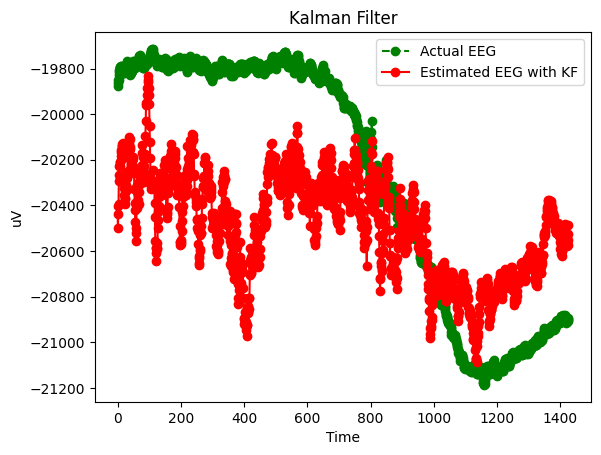

Mean Squared Error: 219645.96869851288
Mean Absolute Percentage Error: 410.77302598038943%
Root Mean Squared Error: 468.66402539400536
R Squared Value: 0.24659169734087694
Accuracy: 0.21037868162692847%
Standard Deviation: 412.66657412046436
Actual Value Variance: 291741.01937107847
Predicted Value Variance: 50602.605676523424
T Value: 14.337789333350038
T-test P Value: 4.5237493817321285e-45
Chi Square Value: -15675.115299649671
Chi Square P Value: 1.0
F Value: 5.765335904558544
P Value: 0.9999999999999999


In [ ]:
'''
from code I made in ELEN331L lab
'''

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
'''
#sensor measurements -manual
C18 = ecog_18[0:1427]
C26 = ecog_26[0:1427]
C27 = ecog_27[0:1427]
C36 = ecog_36[0:1427]
E = eeg_FP1[0:1427]
'''
#sensor measurements testing
C18 = Tecog_18[0:1427]
C26 = Tecog_26[0:1427]
C27 = Tecog_27[0:1427]
C36 = Tecog_36[0:1427]
E = Teeg_FP1[0:1427]


''' testing with trained data??
E = x_train[0]
C18 = y_train[0]
C26 = y_train[1]
C27 = y_train[2]
C36 = y_train[3]
'''

#C = ecog_channels[18, 26, 27, 36]
#E = eeg_channels[1]

#measurements noises
Cn = 0.5
En = 2

#arrays
𝜇= np.empty(1429)
𝜇[0] = -18140
o2 = np.empty(1429)
o2[0] = 1
dif = np.empty(1429)
hE_pred = np.empty(1429)

#write all the equations
for i in range(1,1428):
#Eeg to Ecog relationship linear estimate
  #E_pred = -18140+(-0.0018*C18[i-1])+(-0.4752*C26[i-1])+(0.0872*C27[i-1])+(0.4125*C36[i-1]) #Best for Raw Data
  #E_pred = -50 + (-0.0033*C18[i-1]) + (-0.4721*C26[i-1]) + (0.0813*C27[i-1]) + (0.4154*C36[i-1]) #Best for Preprocessed Data
  E_pred =-17818.87-0.948*C18[i-1]-3.23*C26[i-1]+5.99*C27[i-1]-1.466*C36[i-1]-0.0000631*C18[i-1]**2-0.00221*C18[i-1]*C26[i-1]-0.001599*C18[i-1]*C27[i-1]+0.004039*C18[i-1]*C36[i-1]+0.01077*C26[i-1]**2-0.02184*C26[i-1]*C27[i-1]+0.001078*C26[i-1]*C36[i-1]-0.01218*C27[i-1]**2+0.02079*C27[i-1]*C36[i-1]-0.009528*C36[i-1]**2+0.004028 #polygonial linear relationship
  hE_pred[i-1] = E_pred

  o2_pred = o2[i-1] + En
  K = o2_pred / (o2_pred + Cn)
  𝜇[i-1] = E_pred + K * (E[i-1] - E_pred)
  o2[i] = (1 - K) * o2_pred
  dif[i - 1] = E[i-1] - 𝜇[i-1]

print("Estimated Uncertainties:", o2[1427])
print("Difference", dif[1427])

plt.plot(E[0:1427], label='Actual EEG', marker='o', linestyle='--', color='green')
plt.plot(𝜇[0:1427], label='Estimated EEG with KF', marker='o', linestyle='-', color='red')
#plt.plot(hE_pred[0:1427], label='Estimated EEG from equation', marker='o', linestyle='-', color='blue')
plt.title('Kalman Filter')
plt.xlabel('Time')
plt.ylabel('uV')
plt.legend()
plt.show()

#calculate the Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R^2 Value between the predicted values and the actual values
meanSquaredError = mean_squared_error(E[1:1427], 𝜇[1:1427])
meanAbsolutePercentError = mean_absolute_error(E[1:1427], 𝜇[1:1427])
rootMeanSquaredError = np.sqrt(meanSquaredError)
rSquaredValue = r2_score(E[1:1427],  𝜇[1:1427])

print(f'Mean Squared Error: {meanSquaredError}')
print(f'Mean Absolute Percentage Error: {meanAbsolutePercentError}%')
print(f'Root Mean Squared Error: {rootMeanSquaredError}')
print(f'R Squared Value: {rSquaredValue}')

#Calculate the difference between the predicted values and the actual values
#The prediction is deemed accurate if the predicted value is within 50 uV of the actual value
predictionDifferences = E[1:1427] - 𝜇[1:1427]
absoluteValuePredictionDifferences = abs(predictionDifferences)
accuratePredictions = sum(absoluteValuePredictionDifferences < 1)
accuracyPercentage = (accuratePredictions / len(E[1:1427])) * 100
standardDeviation = np.std(predictionDifferences)

# Calculate the sample variances
actualValueVariance = np.var(E[1:1427], ddof=1)
predictedValueVariance = np.var(𝜇[1:1427], ddof=1)

print(f'Accuracy: {accuracyPercentage}%')
print(f'Standard Deviation: {standardDeviation}')
print(f'Actual Value Variance: {actualValueVariance}')
print(f'Predicted Value Variance: {predictedValueVariance}')

#Calculate the T-test and Chi-Square
tValue, pValue = stats.ttest_ind(E[1:1427], 𝜇[1:1427])
chiSquare, pVal = stats.chisquare(𝜇[1:1427], E[1:1427])
print(f'T Value: {tValue}')
print(f'T-test P Value: {pValue}')
print(f'Chi Square Value: {chiSquare}')
print(f'Chi Square P Value: {pVal}')

# Calculate the F-statistic
fValue = actualValueVariance / predictedValueVariance

# Calculate the p-value
p = stats.f.cdf(fValue, len(E[1:1427]) - 1, len(𝜇[1:1427]) - 1)

# Print the results
print("F Value:", fValue)
print("P Value:", p)

In [ ]:
import numpy as np
import pandas as pd

'''
# Load your EEG and ECoG data
eeg_data = pd.read_csv('/content/EEGdata.csv')
ecog_data = pd.read_csv('/content/ECoGdata.csv')

# Assuming EEG data is already preprocessed and ready to be used for prediction
# Let's also assume that each row in both datasets corresponds to a single time step
'''

# Generate sample EEG data
np.random.seed(42)  # For reproducibility
eeg_features = np.random.rand(100, 5)  # 100 samples, 5 features

# Generate sample ECoG data as a simple function of EEG data for demonstration
ecog_values = eeg_features[:, 0] * 2 + np.random.normal(0, 0.1, 100)  # Simple relationship plus some noise

# Convert to DataFrames
eeg_data = pd.DataFrame(eeg_features, columns=[f'Feature{i+1}' for i in range(5)])
ecog_data = pd.DataFrame(ecog_values, columns=['ECoGValue'])

def predict_ecog_from_eeg(eeg_features):
    # Placeholder for your actual EEG to ECoG prediction logic
    # This could be a call to a machine learning model
    return np.dot(eeg_features, np.random.rand(eeg_features.shape[1]))  # Return a single prediction

def ekf_update(xEst, PEst, Z, H, R):
    # Extended Kalman Filter update
    S = H @ PEst @ H.T + R
    K = PEst @ H.T @ np.linalg.inv(S)
    y = Z - H @ xEst
    xEst = xEst + K @ y
    PEst = (np.eye(len(xEst)) - K @ H) @ PEst
    return xEst, PEst

    '''
    H: The observation matrix, which maps the state vector xEst to the measurement space.
PEst: The state covariance matrix.
R: The measurement noise covariance matrix.
'''

def main():
    n_features = eeg_data.shape[1]
    n_outputs = 1  # Assuming we are predicting a single ECoG feature
    Q = np.eye(n_features)  # Process noise covariance <--adjust
    R = np.eye(n_outputs)  # Measurement noise covariance
    xEst = np.zeros((n_features, 1))
    PEst = np.eye(n_features)

    for time_step in range(len(eeg_data)):
        eeg_features = eeg_data.iloc[time_step].values.reshape(-1, 1)
        actual_ecog = ecog_data.iloc[time_step].values.reshape(-1, 1)

        predicted_ecog = predict_ecog_from_eeg(eeg_features)
        Z = actual_ecog.reshape(-1, 1)  # Measurement

        H = np.eye(n_outputs, n_features)

        xEst, PEst = ekf_update(xEst, PEst, Z, H, R)

        print(f"Time Step {time_step}: Predicted ECoG = {predicted_ecog.flatten()}, Actual ECoG = {actual_ecog.flatten()}")

main()


In [ ]:
#import pandas as pd
#EEGdata = pd.read_csv('/content/EEGdata.csv', skiprows=[18])
#ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
#sfreq = 4096

#montage = mne.channels.make_standard_montage('standard_1020')
#raw.set_montage(montage)

#ECoGdata = pd.read_csv('/content/ECOGdata.csv', skiprows=[128])
#ch_names = ['ECOG 1', 'ECOG 2', ..., 'ECOG 128']
#sfreq = 1000

In [ ]:
import numpy as np
import mne
import matplotlib
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization
from scipy import stats
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (5, 5)

def LSTMModel(x_train, x_test, y_train, y_test):
    #Define the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(1428, 1))) #There are 1428 Samples and 1 EEG Channel
    model.add(BatchNormalization())
    model.add(Dense(units=1))

    #Converting training and testing data into 2d array to resolve error that model.fit throws
    x_train = x_train.reshape(-1, 1)
    y_train_18 = y_train[0].reshape(-1, 1)
    y_train_26 = y_train[1].reshape(-1, 1)
    y_train_27 = y_train[2].reshape(-1, 1)
    y_train_36 = y_train[3].reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    y_test_18 = y_test[0].reshape(-1, 1)
    y_test_26 = y_test[1].reshape(-1, 1)
    y_test_27 = y_test[2].reshape(-1, 1)
    y_test_36 = y_test[3].reshape(-1, 1)

    #Compile the model using Mean Squared Error since this is a regression problem
    model.compile(loss='mean_squared_error', optimizer='adam')

    #x_train represent the training EEG input data, while y_train represent the training ECoG values
    model.fit(x_train, y_train_18, epochs=20, batch_size=32)
    model.fit(x_train, y_train_26, epochs=20, batch_size=32)
    model.fit(x_train, y_train_27, epochs=20, batch_size=32)
    #model.fit(x_train, y_train_36, epochs=20, batch_size=32)

    #x_test represent the testing EEG input data, while y_test represent the testing ECoG values
    loss = model.evaluate(x_test, y_test_18)
    print(f'Test Loss: {loss}')

    #Predict ECoG values from the testing EEG input data
    y_pred = model.predict(x_test)

    #Plot the Actual vs Estimated ECoG
    plt.title('LSTM Model')
    plt.plot(y_test_18, label='Actual ECoG', marker='o', linestyle='--', color='green')
    plt.plot(y_pred, label='Estimated ECoG', marker='o', linestyle='-', color='red')
    plt.xlabel('Time')
    plt.ylabel('uV')
    plt.legend()
    plt.show()

    #Calculate the Mean Squared Error, Mean Absolute Error, Root Mean Squared Error, and R^2 Value between the predicted values and the actual values
    meanSquaredError = mean_squared_error(y_test_18, y_pred)
    meanAbsolutePercentError = mean_absolute_error(y_test_18, y_pred)
    rootMeanSquaredError = np.sqrt(meanSquaredError)
    rSquaredValue = r2_score(y_test_18, y_pred)

    print(f'Mean Squared Error: {meanSquaredError}')
    print(f'Mean Absolute Percentage Error: {meanAbsolutePercentError}%')
    print(f'Root Mean Squared Error: {rootMeanSquaredError}')
    print(f'R Squared Value: {rSquaredValue}')

    #Calculate the difference between the predicted values and the actual values
    predictionDifferences = y_test_18 - y_pred
    absoluteValuePredictionDifferences = abs(predictionDifferences)
    accuratePredictions = sum(absoluteValuePredictionDifferences < 1)
    accuracyPercentage = (accuratePredictions / len(y_test[0])) * 100
    standardDeviation = np.std(predictionDifferences)

    # Calculate the sample variances
    actualValueVariance = np.var(y_test_18, ddof=1)
    predictedValueVariance = np.var(y_pred, ddof=1)

    print(f'Accuracy: {accuracyPercentage}%')
    print(f'Standard Deviation: {standardDeviation}')
    print(f'Actual Value Variance: {actualValueVariance}')
    print(f'Predicted Value Variance: {predictedValueVariance}')

    #Calculate the T-test
    tValue, pValue = stats.ttest_ind(y_test_18, y_pred)
    print(f'T Value: {tValue}')
    print(f'T-test P Value: {pValue}')

    # Calculate the F-statistic
    fValue = actualValueVariance / predictedValueVariance

    # Calculate the P-value
    p = stats.f.cdf(fValue, len(y_test_18) - 1, len(y_pred) - 1)

    # Print the results
    print("F Value:", fValue)
    print("P Value:", p)

    return

def performPCA(threeDimensionalDataset):
    #Reshaping our preprocessed dataset from a 3d array to a 2d array in order to perform PCA
    twoDimensionDataset = threeDimensionalDataset.reshape(-1, threeDimensionalDataset.shape[-1])

    #Making the data zero mean
    #To Resolve this error, we need to reshape our data as we are currently passing in a 3d array when we actually need it to be a 2d array
    standardizedData = StandardScaler().fit_transform(twoDimensionDataset)
    pcaData = decomposition.PCA(n_components=6)
    pcaData.fit(standardizedData)
    PrincipalComponentsValue = pcaData.transform(standardizedData)

    #Plot the Explained Variance Ratio to determine how many components (features) we should include in our final dataset
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pcaData.explained_variance_ratio_))
    plt.title('Explained Variance Ratio by Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)
    plt.show()

    print(PrincipalComponentsValue)

    return PrincipalComponentsValue

def EEGTraining():
    eeg_FP1 = np.array([[-17936,-17925,-17929,-17936,-17935,-17929,-17933,-17931,-17929,-17931,-17930,-17932,-17944,-17947,-17938,-17950,-17949,-17937,-17938,-17922,-17911,-17901,-17900,-17895,-17905,-17922,-17923,-17924,-17916,-17921,-17915,-17913,-17905,-17898,-17886,-17880,-17873,-17876,-17886,-17891,-17887,-17882,-17882,-17888,-17889,-17896,-17910,-17919,-17920,-17921,-17927,-17933,-17927,-17926,-17924,-17921,-17929,-17936,-17942,-17942,-17935,-17936,-17946,-17943,-17957,-17962,-17948,-17950,-17948,-17957,-17967,-17975,-17967,-17958,-17958,-17958,-17959,-17960,-17959,-17967,-17966,-17974,-17975,-17971,-17973,-17965,-17961,-17967,-17968,-17962,-17969,-17972,-17968,-17968,-17969,-17979,-17978,-17979,-17972,-17982,-17985,-17975,-17982,-17980,-17978,-17977,-17978,-17981,-17987,-17984,-17990,-17988,-17985,-17977,-17963,-17971,-17979,-17963,-17967,-17978,-17979,-17977,-17976,-17972,-17977,-17977,-17986,-18001,-17985,-17972,-17973,-17985,-17991,-17994,-18000,-17998,-18001,-18001,-17991,-17986,-17993,-17985,-17989,-17994,-18007,-18007,-18006,-18005,-17994,-17993,-17990,-17989,-17985,-17986,-17989,-17987,-17998,-17989,-17995,-18004,-18012,-18014,-18019,-18021,-18030,-18038,-18034,-18037,-18039,-18039,-18042,-18046,-18052,-18058,-18066,-18073,-18070,-18076,-18078,-18094,-18093,-18102,-18115,-18124,-18129,-18134,-18146,-18148,-18153,-18149,-18151,-18150,-18134,-18133,-18135,-18134,-18138,-18125,-18132,-18141,-18133,-18132,-18122,-18119,-18122,-18126,-18124,-18121,-18127,-18122,-18133,-18129,-18113,-18116,-18103,-18104,-18108,-18107,-18096,-18102,-18102,-18099,-18100,-18106,-18119,-18111,-18126,-18136,-18130,-18125,-18124,-18123,-18118,-18124,-18116,-18105,-18097,-18089,-18093,-18104,-18088,-18077,-18079,-18078,-18088,-18081,-18081,-18081,-18073,-18078,-18076,-18094,-18106,-18113,-18106,-18094,-18095,-18090,-18101,-18103,-18101,-18104,-18108,-18113,-18101,-18097,-18099,-18091,-18106,-18108,-18109,-18112,-18103,-18108,-18108,-18118,-18127,-18115,-18109,-18118,-18121,-18115,-18112,-18113,-18105,-18099,-18111,-18114,-18111,-18109,-18121,-18123,-18124,-18122,-18106,-18105,-18107,-18112,-18114,-18122,-18134,-18134,-18143,-18139,-18146,-18147,-18140,-18141,-18136,-18126,-18118,-18116,-18127,-18141,-18138,-18129,-18131,-18125,-18122,-18127,-18122,-18131,-18133,-18129,-18139,-18132,-18126,-18116,-18115,-18110,-18099,-18100,-18093,-18089,-18089,-18095,-18093,-18097,-18088,-18100,-18092,-18092,-18100,-18109,-18104,-18090,-18095,-18090,-18092,-18089,-18096,-18097,-18088,-18085,-18085,-18080,-18083,-18086,-18090,-18093,-18082,-18096,-18097,-18103,-18106,-18112,-18111,-18111,-18124,-18124,-18132,-18148,-18154,-18152,-18150,-18142,-18133,-18125,-18122,-18132,-18130,-18131,-18131,-18137,-18140,-18138,-18147,-18142,-18138,-18126,-18138,-18126,-18128,-18125,-18118,-18105,-18098,-18099,-18090,-18099,-18094,-18094,-18094,-18093,-18103,-18100,-18104,-18093,-18089,-18086,-18082,-18082,-18073,-18065,-18073,-18086,-18089,-18099,-18103,-18116,-18121,-18121,-18117,-18124,-18126,-18130,-18139,-18136,-18133,-18123,-18123,-18124,-18109,-18123,-18124,-18118,-18112,-18110,-18102,-18089,-18073,-18071,-18071,-18076,-18085,-18100,-18113,-18123,-18130,-18124,-18122,-18120,-18123,-18131,-18137,-18138,-18130,-18128,-18137,-18141,-18135,-18135,-18134,-18139,-18137,-18135,-18131,-18119,-18110,-18104,-18106,-18124,-18135,-18133,-18142,-18140,-18138,-18138,-18134,-18142,-18148,-18153,-18159,-18166,-18182,-18178,-18180,-18184,-18190,-18186,-18177,-18175,-18167,-18158,-18144,-18128,-18113,-18101,-18099,-18097,-18089,-18084,-18078,-18080,-18081,-18078,-18081,-18086,-18088,-18080,-18088,-18086,-18088,-18094,-18090,-18097,-18095,-18086,-18082,-18090,-18093,-18084,-18092,-18101,-18112,-18110,-18111,-18127,-18135,-18142,-18139,-18141,-18143,-18137,-18137,-18137,-18125,-18122,-18111,-18123,-18114,-18107,-18104,-18105,-18114,-18119,-18110,-18095,-18100,-18106,-18095,-18098,-18095,-18101,-18100,-18105,-18104,-18102,-18115,-18110,-18111,-18110,-18100,-18097,-18087,-18090,-18092,-18093,-18107,-18103,-18117,-18118,-18107,-18105,-18102,-18117,-18118,-18107,-18120,-18124,-18139,-18148,-18120,-18132,-18143,-18143,-18147,-18142,-18155,-18145,-18141,-18109,-18108,-18131,-18167,-18151,-18141,-18130,-18132,-18167,-18183,-18152,-18168,-18191,-18186,-18150,-18150,-18171,-18191,-18202,-18212,-18212,-18186,-18165,-18167,-18171,-18128,-18146,-18177,-18223,-18199,-18167,-18139,-18160,-18202,-18210,-18218,-18206,-18195,-18195,-18212,-18170,-18174,-18182,-18201,-18217,-18252,-18277,-18258,-18206,-18215,-18238,-18250,-18247,-18257,-18244,-18245,-18237,-18235,-18251,-18251,-18241,-18252,-18265,-18270,-18258,-18277,-18279,-18271,-18267,-18276,-18274,-18273,-18268,-18261,-18249,-18266,-18257,-18247,-18252,-18259,-18245,-18235,-18227,-18222,-18235,-18210,-18198,-18206,-18201,-18189,-18200,-18200,-18189,-18193,-18178,-18175,-18169,-18165,-18154,-18146,-18146,-18148,-18144,-18142,-18134,-18137,-18123,-18119,-18119,-18118,-18119,-18113,-18115,-18113,-18120,-18116,-18126,-18134,-18134,-18132,-18122,-18097,-18085,-18084,-18083,-18072,-18058,-18067,-18073,-18073,-18074,-18064,-18055,-18047,-18047,-18044,-18033,-18026,-18016,-18014,-18019,-18019,-18022,-18020,-18016,-18008,-18008,-17999,-18001,-18009,-18013,-18018,-18010,-18005,-18002,-17994,-17986,-17979,-17965,-17968,-17955,-17954,-17949,-17944,-17936,-17942,-17951,-17947,-17940,-17923,-17916,-17915,-17922,-17931,-17935,-17939,-17946,-17952,-17933,-17928,-17917,-17894,-17897,-17899,-17892,-17895,-17898,-17907,-17916,-17920,-17930,-17934,-17937,-17943,-17943,-17952,-17960,-17962,-17955,-17954,-17950,-17949,-17939,-17933,-17926,-17929,-17946,-17941,-17941,-17937,-17926,-17923,-17913,-17914,-17910,-17914,-17910,-17909,-17912,-17916,-17920,-17923,-17931,-17923,-17906,-17918,-17918,-17929,-17933,-17925,-17920,-17927,-17921,-17924,-17940,-17946,-17959,-17959,-17959,-17957,-17956,-17948,-17945,-17943,-17950,-17958,-17963,-17975,-17989,-17978,-17980,-17972,-17965,-17965,-17966,-17965,-17959,-17961,-17963,-17961,-17961,-17954,-17957,-17951,-17948,-17942,-17938,-17934,-17938,-17938,-17933,-17931,-17933,-17942,-17941,-17947,-17953,-17952,-17959,-17956,-17945,-17918,-17907,-17898,-17919,-17937,-17934,-17949,-17954,-17950,-17954,-17956,-17953,-17961,-17957,-17968,-17980,-17986,-17980,-17976,-17981,-17984,-17987,-17991,-17995,-17994,-17993,-18001,-18001,-17997,-18011,-18015,-18009,-18017,-18016,-18017,-18009,-18007,-18004,-18006,-18010,-18011,-18021,-18029,-18022,-18019,-18006,-18009,-18018,-18019,-18009,-18010,-18004,-18012,-17995,-17991,-17996,-18004,-18006,-17993,-17988,-17978,-17970,-17961,-17967,-17965,-17978,-17980,-17981,-17989,-17983,-17979,-17980,-17992,-17987,-17975,-17979,-17988,-17986,-17998,-17996,-17982,-17970,-17964,-17961,-17960,-17966,-17968,-17980,-17985,-17983,-17987,-17978,-17974,-17983,-17985,-17988,-17989,-17980,-17986,-17997,-17994,-17995,-17990,-17982,-17969,-17972,-17979,-17984,-17992,-18004,-18007,-18000,-18000,-17999,-18002,-18003,-17994,-17998,-18005,-18008,-18006,-18005,-18007,-17995,-17990,-17984,-17978,-17985,-17990,-17985,-17978,-17976,-17983,-17988,-17993,-17998,-17998,-17999,-18004,-18011,-18009,-18008,-17997,-17989,-17987,-17979,-17978,-17987,-17996,-17994,-17999,-18003,-18009,-18000,-18010,-18011,-18004,-18006,-18001,-18004,-18005,-18016,-18020,-18019,-18035,-18027,-18029,-18031,-18034,-18027,-18024,-18030,-18037,-18035,-18026,-18027,-18038,-18020,-18011,-18020,-18025,-18020,-18013,-18010,-18011,-18023,-18027,-18025,-18020,-18009,-18007,-18000,-18010,-18009,-18011,-18012,-18017,-18014,-18021,-18025,-18014,-18021,-18022,-18016,-18008,-18002,-18005,-18025,-18044,-18054,-18066,-18072,-18085,-18090,-18092,-18101,-18100,-18094,-18090,-18094,-18096,-18093,-18092,-18085,-18083,-18088,-18080,-18073,-18074,-18075,-18084,-18091,-18085,-18081,-18078,-18072,-18079,-18085,-18084,-18087,-18079,-18086,-18091,-18097,-18098,-18092,-18088,-18103,-18102,-18103,-18106,-18097,-18105,-18104,-18105,-18105,-18102,-18098,-18101,-18097,-18084,-18095,-18089,-18092,-18084,-18087,-18103,-18112,-18120,-18116,-18108,-18114,-18125,-18133,-18125,-18131,-18135,-18120,-18113,-18109,-18110,-18115,-18122,-18130,-18133,-18133,-18136,-18151,-18149,-18149,-18143,-18130,-18132,-18133,-18134,-18130,-18129,-18129,-18132,-18141,-18137,-18142,-18131,-18136,-18142,-18146,-18148,-18149,-18150,-18159,-18165,-18168,-18177,-18183,-18193,-18199,-18184,-18190,-18197,-18193,-18190,-18195,-18199,-18200,-18200,-18190,-18194,-18201,-18202,-18199,-18189,-18195,-18200,-18208,-18203,-18211,-18221,-18212,-18210,-18212,-18218,-18226,-18224,-18225,-18230,-18240,-18249,-18250,-18259,-18263,-18278,-18273,-18276,-18283,-18286,-18286,-18282,-18290,-18296,-18298,-18285,-18277,-18265,-18262,-18255,-18255,-18252,-18249,-18259,-18256,-18260,-18264,-18279,-18278,-18270,-18270,-18281,-18271,-18265,-18278,-18280,-18283,-18288,-18290,-18289,-18280,-18277,-18273,-18284,-18289,-18306,-18305,-18305,-18319,-18321,-18315,-18310,-18314,-18316,-18325,-18336,-18354,-18366,-18373,-18380,-18383,-18379,-18389,-18386,-18379,-18381,-18381,-18378,-18390,-18396,-18396,-18402,-18408,-18407,-18406,-18398,-18394,-18391,-18401,-18403,-18411,-18400,-18404,-18399,-18387,-18396,-18405,-18406,-18423,-18421,-18431,-18440,-18440,-18442,-18442,-18437,-18434,-18434,-18430,-18444,-18452,-18455,-18465,-18460,-18454,-18456,-18454,-18454,-18458,-18462,-18465,-18456,-18460,-18449,-18452,-18447,-18460,-18464,-18458,-18451,-18451,-18445,-18447,-18453,-18447,-18455,-18459,-18454,-18464,-18464,-18460,-18460,-18469,-18463,-18458,-18446,-18446,-18452,-18451,-18459,-18460,-18469,-18471,-18482,-18483,-18480,-18481,-18483,-18482,-18477,-18480,-18482,-18476,-18470,-18467,-18471,-18482,-18474,-18481,-18479,-18483,-18491,-18499,-18506,-18511,-18516,-18510,-18513,-18527,-18530,-18537,-18548,-18551,-18548,-18551,-18553,-18549,-18553,-18548,-18528,-18518,-18519,-18524,-18524,-18528,-18532,-18544,-18549,-18550,-18546,-18550,-18551,-18537,-18531,-18522,-18518,-18527,-18522,-18519,-18525,-18523,-18518,-18525,-18524,-18516,-18520,-18522,-18520,-18524,-18514,-18516]])

    #Preprocessing Training EEG Data
    ch_names = ['FP1']
    sfreq = 4096

    info = mne.create_info(ch_names, sfreq, ch_types='eeg')
    rawTraining = mne.io.RawArray(eeg_FP1, info)

    #Perform Bandpass Filter on EEG Training Data
    rawTrainingFilter = rawTraining.copy().filter(0.3, 70)
    rawTrainingFilt = rawTrainingFilter.notch_filter(50)

    #Extract the numerical data array to pass into the baselin correction, else it will throw an array shape error
    filteredData = rawTrainingFilt.get_data()

    #Perform Baseline Correcting and Normalization on EEG Training Data
    trainingBaseline = filteredData - np.mean(filteredData)
    trainingNormalize = (trainingBaseline - np.mean(trainingBaseline)) / np.std(trainingBaseline)

    #Convert back to array in order to plot else it will throw error
    rawTrainingNormalize = mne.io.RawArray(trainingNormalize, info)

    rawTrainingNormalize.compute_psd(fmin=0, fmax=80).plot()
    rawTrainingNormalize.plot(scalings=dict(eeg=1), duration=0.3);

    x_train = rawTrainingNormalize.get_data()

    return x_train

def EEGTesting():
    eeg_FP1 = np.array([[-19875,-19864,-19850,-19850,-19830,-19814,-19806,-19793,-19792,-19792,-19789,-19791,-19801,-19799,-19796,-19798,-19810,-19811,-19818,-19820,-19815,-19818,-19806,-19810,-19804,-19803,-19795,-19786,-19779,-19769,-19774,-19780,-19795,-19794,-19804,-19807,-19807,-19820,-19818,-19822,-19828,-19819,-19812,-19818,-19806,-19811,-19810,-19780,-19773,-19765,-19770,-19769,-19787,-19795,-19796,-19791,-19788,-19793,-19781,-19773,-19778,-19767,-19767,-19773,-19762,-19771,-19771,-19766,-19746,-19743,-19739,-19751,-19758,-19762,-19772,-19782,-19781,-19787,-19782,-19790,-19798,-19798,-19798,-19795,-19794,-19788,-19790,-19782,-19782,-19779,-19774,-19773,-19782,-19770,-19779,-19771,-19766,-19763,-19749,-19757,-19766,-19761,-19752,-19751,-19738,-19725,-19726,-19719,-19721,-19714,-19723,-19714,-19723,-19734,-19739,-19740,-19743,-19756,-19760,-19771,-19773,-19765,-19761,-19767,-19775,-19789,-19786,-19770,-19772,-19775,-19772,-19760,-19764,-19769,-19768,-19769,-19767,-19763,-19774,-19794,-19794,-19784,-19764,-19769,-19767,-19766,-19770,-19765,-19770,-19767,-19766,-19755,-19759,-19775,-19776,-19783,-19798,-19805,-19809,-19807,-19808,-19792,-19801,-19799,-19802,-19800,-19791,-19789,-19786,-19776,-19769,-19774,-19773,-19773,-19785,-19792,-19799,-19789,-19792,-19795,-19786,-19785,-19772,-19759,-19776,-19776,-19765,-19766,-19767,-19762,-19754,-19765,-19761,-19758,-19754,-19751,-19755,-19757,-19760,-19788,-19785,-19780,-19765,-19773,-19772,-19774,-19770,-19762,-19763,-19760,-19755,-19770,-19766,-19767,-19777,-19783,-19791,-19795,-19808,-19815,-19810,-19803,-19784,-19781,-19777,-19763,-19759,-19752,-19746,-19750,-19758,-19764,-19771,-19777,-19787,-19789,-19795,-19793,-19784,-19782,-19790,-19774,-19768,-19778,-19766,-19766,-19762,-19760,-19762,-19752,-19765,-19781,-19777,-19776,-19768,-19772,-19787,-19794,-19796,-19806,-19798,-19807,-19806,-19799,-19802,-19809,-19797,-19783,-19780,-19775,-19764,-19771,-19769,-19775,-19773,-19776,-19774,-19781,-19781,-19779,-19806,-19799,-19801,-19811,-19802,-19808,-19815,-19819,-19822,-19821,-19823,-19838,-19837,-19833,-19821,-19824,-19839,-19843,-19854,-19851,-19849,-19837,-19829,-19834,-19825,-19821,-19805,-19806,-19792,-19789,-19801,-19800,-19800,-19795,-19789,-19787,-19806,-19813,-19818,-19826,-19822,-19810,-19817,-19816,-19805,-19808,-19803,-19796,-19801,-19783,-19768,-19763,-19773,-19777,-19783,-19781,-19801,-19816,-19806,-19811,-19813,-19811,-19801,-19789,-19788,-19790,-19787,-19785,-19782,-19779,-19781,-19780,-19779,-19782,-19795,-19800,-19812,-19817,-19823,-19832,-19826,-19819,-19814,-19820,-19831,-19830,-19815,-19811,-19810,-19800,-19793,-19801,-19810,-19805,-19801,-19800,-19800,-19807,-19803,-19816,-19817,-19808,-19806,-19812,-19803,-19805,-19793,-19781,-19787,-19778,-19779,-19784,-19785,-19780,-19787,-19789,-19785,-19782,-19809,-19811,-19821,-19816,-19807,-19809,-19812,-19810,-19796,-19789,-19785,-19782,-19784,-19793,-19792,-19799,-19799,-19792,-19792,-19789,-19798,-19785,-19773,-19780,-19773,-19776,-19789,-19782,-19783,-19776,-19771,-19768,-19766,-19783,-19765,-19766,-19777,-19779,-19780,-19783,-19790,-19805,-19814,-19814,-19813,-19819,-19816,-19811,-19799,-19778,-19776,-19788,-19786,-19796,-19799,-19793,-19792,-19798,-19801,-19808,-19815,-19806,-19810,-19791,-19810,-19823,-19822,-19813,-19806,-19809,-19811,-19808,-19799,-19799,-19801,-19784,-19779,-19787,-19792,-19795,-19799,-19800,-19795,-19796,-19795,-19795,-19786,-19773,-19763,-19748,-19758,-19750,-19746,-19757,-19762,-19768,-19776,-19773,-19778,-19785,-19786,-19799,-19801,-19789,-19778,-19776,-19779,-19781,-19768,-19756,-19758,-19750,-19753,-19752,-19748,-19743,-19748,-19750,-19754,-19753,-19763,-19774,-19771,-19767,-19764,-19765,-19748,-19733,-19731,-19733,-19735,-19729,-19727,-19727,-19736,-19743,-19748,-19760,-19770,-19778,-19778,-19785,-19794,-19793,-19792,-19786,-19783,-19785,-19778,-19770,-19765,-19758,-19761,-19765,-19766,-19762,-19765,-19775,-19789,-19796,-19798,-19820,-19818,-19804,-19804,-19793,-19795,-19783,-19775,-19754,-19740,-19748,-19740,-19746,-19755,-19766,-19771,-19783,-19805,-19819,-19821,-19822,-19833,-19841,-19828,-19820,-19811,-19796,-19797,-19793,-19804,-19807,-19796,-19811,-19805,-19811,-19817,-19809,-19812,-19811,-19804,-19810,-19803,-19801,-19799,-19792,-19794,-19792,-19788,-19777,-19777,-19781,-19785,-19784,-19785,-19790,-19801,-19808,-19819,-19820,-19826,-19829,-19833,-19825,-19828,-19832,-19842,-19846,-19842,-19843,-19837,-19834,-19837,-19826,-19827,-19825,-19828,-19842,-19856,-19864,-19859,-19860,-19856,-19852,-19850,-19836,-19833,-19827,-19823,-19804,-19797,-19794,-19786,-19809,-19809,-19812,-19811,-19810,-19834,-19842,-19849,-19853,-19856,-19852,-19845,-19843,-19849,-19842,-19842,-19843,-19840,-19852,-19859,-19861,-19863,-19869,-19872,-19876,-19882,-19880,-19886,-19895,-19886,-19881,-19882,-19884,-19892,-19889,-19879,-19874,-19863,-19862,-19866,-19863,-19869,-19870,-19869,-19874,-19894,-19896,-19907,-19909,-19911,-19911,-19914,-19919,-19919,-19923,-19925,-19917,-19914,-19921,-19922,-19926,-19926,-19936,-19953,-19964,-19972,-19973,-19966,-19974,-19965,-19955,-19963,-19966,-19965,-19973,-19973,-19974,-19974,-19964,-19967,-19966,-19973,-19975,-19970,-19965,-19969,-19974,-19980,-19988,-19983,-19972,-19972,-19987,-19990,-19985,-19987,-19992,-19994,-20004,-20001,-20006,-20009,-20010,-20022,-20027,-20034,-20048,-20052,-20058,-20069,-20077,-20069,-20077,-20081,-20096,-20093,-20097,-20092,-20103,-20109,-20123,-20127,-20134,-20136,-20139,-20147,-20158,-20176,-20185,-20171,-20163,-20217,-20192,-20107,-20076,-20135,-20223,-20296,-20210,-20165,-20160,-20134,-20185,-20177,-20180,-20185,-20279,-20232,-20258,-20284,-20173,-20109,-20078,-20030,-20142,-20244,-20279,-20338,-20326,-20369,-20403,-20357,-20329,-20300,-20288,-20258,-20268,-20305,-20313,-20270,-20222,-20297,-20373,-20361,-20277,-20276,-20246,-20296,-20385,-20377,-20342,-20263,-20276,-20271,-20330,-20319,-20270,-20311,-20295,-20314,-20343,-20354,-20326,-20321,-20312,-20308,-20292,-20203,-20210,-20268,-20276,-20282,-20308,-20331,-20342,-20333,-20384,-20361,-20343,-20343,-20325,-20358,-20334,-20339,-20363,-20353,-20347,-20382,-20384,-20376,-20316,-20354,-20407,-20390,-20387,-20424,-20406,-20405,-20372,-20333,-20357,-20404,-20495,-20457,-20423,-20419,-20416,-20418,-20402,-20398,-20428,-20410,-20380,-20420,-20429,-20408,-20421,-20415,-20422,-20416,-20413,-20409,-20404,-20408,-20389,-20394,-20405,-20414,-20424,-20411,-20408,-20412,-20435,-20463,-20460,-20463,-20483,-20488,-20484,-20482,-20487,-20492,-20500,-20501,-20495,-20484,-20475,-20487,-20493,-20505,-20512,-20501,-20502,-20519,-20524,-20538,-20534,-20535,-20540,-20548,-20548,-20545,-20539,-20530,-20527,-20519,-20519,-20511,-20532,-20543,-20549,-20549,-20563,-20590,-20601,-20618,-20629,-20628,-20629,-20649,-20647,-20651,-20654,-20644,-20641,-20641,-20640,-20627,-20620,-20613,-20615,-20632,-20639,-20638,-20648,-20665,-20663,-20665,-20653,-20657,-20661,-20664,-20686,-20684,-20685,-20691,-20699,-20683,-20679,-20670,-20670,-20677,-20690,-20702,-20711,-20728,-20733,-20730,-20735,-20736,-20728,-20723,-20730,-20737,-20742,-20726,-20734,-20737,-20746,-20755,-20746,-20756,-20769,-20781,-20787,-20796,-20808,-20809,-20818,-20823,-20820,-20827,-20833,-20835,-20823,-20814,-20813,-20806,-20808,-20808,-20810,-20821,-20840,-20847,-20843,-20855,-20863,-20875,-20884,-20879,-20886,-20888,-20904,-20903,-20910,-20914,-20911,-20921,-20919,-20923,-20923,-20926,-20936,-20933,-20957,-20968,-20962,-20957,-20968,-20979,-20976,-20967,-20975,-20983,-20981,-20976,-20967,-20973,-20986,-20991,-20998,-21003,-21011,-21011,-21019,-21030,-21035,-21046,-21047,-21043,-21051,-21064,-21069,-21080,-21066,-21059,-21060,-21060,-21057,-21058,-21070,-21078,-21082,-21090,-21109,-21111,-21107,-21115,-21112,-21116,-21115,-21114,-21113,-21108,-21102,-21111,-21110,-21110,-21106,-21115,-21123,-21120,-21121,-21120,-21124,-21128,-21125,-21123,-21130,-21132,-21128,-21116,-21123,-21122,-21115,-21100,-21104,-21105,-21095,-21093,-21102,-21105,-21114,-21120,-21124,-21138,-21133,-21139,-21141,-21133,-21136,-21116,-21113,-21118,-21112,-21109,-21108,-21109,-21113,-21111,-21124,-21122,-21128,-21143,-21159,-21179,-21174,-21182,-21187,-21183,-21184,-21168,-21163,-21147,-21140,-21133,-21131,-21131,-21103,-21102,-21109,-21111,-21115,-21126,-21124,-21126,-21133,-21137,-21140,-21125,-21113,-21116,-21108,-21106,-21103,-21098,-21088,-21085,-21078,-21096,-21115,-21112,-21114,-21105,-21111,-21125,-21135,-21135,-21147,-21144,-21130,-21125,-21120,-21112,-21118,-21123,-21126,-21120,-21119,-21115,-21115,-21111,-21104,-21118,-21123,-21120,-21127,-21124,-21124,-21118,-21110,-21093,-21088,-21099,-21091,-21075,-21077,-21082,-21083,-21079,-21074,-21079,-21071,-21081,-21091,-21104,-21106,-21103,-21092,-21090,-21087,-21083,-21077,-21078,-21076,-21063,-21051,-21046,-21051,-21044,-21054,-21048,-21051,-21055,-21056,-21057,-21070,-21067,-21067,-21069,-21067,-21055,-21063,-21053,-21041,-21041,-21038,-21036,-21033,-21037,-21042,-21033,-21031,-21035,-21043,-21049,-21047,-21055,-21055,-21051,-21045,-21041,-21027,-21033,-21024,-21018,-21016,-21014,-21024,-21025,-21040,-21041,-21050,-21046,-21042,-21044,-21044,-21046,-21053,-21041,-21033,-21026,-21019,-21032,-21031,-21030,-21020,-21019,-21018,-21016,-21018,-21003,-21009,-21010,-21010,-21016,-21014,-21010,-21004,-20988,-21007,-21010,-21010,-21008,-21009,-21005,-20994,-20982,-20972,-20988,-20984,-20988,-20991,-20983,-20984,-20999,-21001,-20994,-20992,-20988,-20989,-20989,-20980,-20968,-20972,-20964,-20952,-20941,-20939,-20950,-20943,-20945,-20951,-20944,-20950,-20955,-20954,-20954,-20962,-20955,-20950,-20960,-20959,-20948,-20946,-20941,-20939,-20932,-20932,-20937,-20934,-20933,-20925,-20928,-20928,-20931,-20942,-20947,-20937,-20947,-20933,-20934,-20941,-20938,-20927,-20918,-20924,-20906,-20902,-20908,-20918,-20917,-20917,-20905,-20907,-20915,-20915,-20915,-20912,-20909,-20898,-20887,-20887,-20897,-20899,-20891,-20895,-20883,-20882,-20890,-20891,-20887,-20885,-20880,-20885,-20890,-20896,-20907,-20915,-20911,-20903,-20904,-20906,-20899,-20903,-20892,-20877]])

    #Preprocessing Testing EEG Data
    ch_names = ['FP1']
    sfreq = 4096

    info = mne.create_info(ch_names, sfreq, ch_types='eeg')
    rawTraining = mne.io.RawArray(eeg_FP1, info)

    #Perform Bandpass Filter on EEG Tesing Data
    rawTrainingFilter = rawTraining.copy().filter(0.3, 70)
    rawTrainingFilt = rawTrainingFilter.notch_filter(50)

    #Extract the numerical data array to pass into the baselin correction, else it will throw an array shape error
    filteredData = rawTrainingFilt.get_data()

    #Perform Baseline Correcting and Normalization on EEG Training Data
    trainingBaseline = filteredData - np.mean(filteredData)
    trainingNormalize = (trainingBaseline - np.mean(trainingBaseline)) / np.std(trainingBaseline)

    #Convert back to array in order to plot else it will throw error
    rawTrainingNormalize = mne.io.RawArray(trainingNormalize, info)

    #rawTrainingNormalize.compute_psd(fmin=0, fmax=80).plot()
    rawTrainingNormalize.plot(scalings='auto');

    x_test = rawTrainingNormalize.get_data()

    return x_test

def ECOGTraining():
    ecog_18 = np.array([104,129,105,75,65,28,24,29,-8,-16,-46,-79,-102,-101,-114,-101,-85,-113,-93,-55,-55,-46,-24,-33,-66,-100,-97,-89,-80,-51,-42,-5,30,37,52,57,45,44,20,2,-26,-41,-42,-58,-73,-90,-95,-96,-70,-47,-20,26,59,68,86,80,62,36,13,-2,13,28,29,19,9,-7,-58,-66,-56,-64,-48,-45,-41,-17,-8,-4,31,39,43,14,14,-3,-25,-32,-60,-106,-149,-160,-180,-241,-278,-309,-337,-333,-317,-298,-281,-254,-209,-176,-140,-136,-147,-139,-114,-139,-118,-141,-122,-106,-79,-59,-56,-42,-17,-30,-17,3,4,17,11,13,2,-6,-1,-15,7,11,18,36,57,47,72,100,106,127,121,133,138,138,115,77,49,3,-27,-66,-86,-80,-84,-90,-112,-118,-121,-140,-166,-194,-202,-196,-206,-195,-198,-190,-193,-197,-190,-178,-175,-181,-163,-178,-188,-194,-179,-154,-129,-101,-57,-55,-65,-40,-30,-29,-27,-12,-25,-53,-92,-130,-156,-148,-156,-171,-191,-200,-189,-170,-144,-137,-161,-145,-171,-174,-177,-192,-164,-163,-158,-164,-169,-170,-158,-158,-143,-110,-117,-124,-145,-155,-186,-206,-221,-258,-284,-257,-231,-220,-226,-206,-219,-259,-295,-289,-307,-289,-259,-233,-217,-182,-143,-129,-120,-116,-103,-82,-94,-97,-80,-87,-101,-112,-142,-156,-156,-139,-131,-159,-164,-186,-192,-183,-167,-167,-179,-180,-191,-221,-242,-252,-249,-267,-278,-296,-297,-283,-288,-258,-237,-205,-206,-187,-172,-173,-188,-182,-179,-189,-165,-146,-129,-121,-121,-98,-97,-97,-84,-84,-94,-117,-139,-135,-130,-117,-129,-167,-204,-226,-233,-243,-252,-256,-249,-246,-216,-172,-163,-166,-140,-103,-65,-55,-44,-33,-5,30,33,17,4,-21,-55,-76,-94,-146,-144,-148,-139,-114,-97,-80,-62,-47,-30,27,48,85,101,110,126,170,180,165,124,91,85,78,61,26,-18,-5,20,0,-16,-64,-119,-200,-237,-257,-271,-259,-246,-210,-182,-145,-117,-86,-51,-21,12,38,53,37,17,-2,-16,-39,-53,-73,-116,-178,-223,-240,-244,-222,-226,-206,-197,-192,-204,-211,-241,-286,-296,-253,-264,-230,-178,-112,-55,-38,-31,-48,-75,-89,-98,-100,-119,-130,-102,-89,-84,-63,-79,-118,-150,-153,-165,-179,-171,-183,-208,-208,-196,-161,-128,-101,-89,-86,-70,-50,-46,-70,-120,-146,-172,-203,-215,-231,-278,-345,-360,-388,-431,-472,-518,-528,-517,-482,-444,-398,-368,-306,-252,-202,-195,-203,-197,-190,-197,-229,-271,-283,-273,-271,-232,-221,-190,-194,-211,-190,-161,-161,-125,-104,-97,-60,-49,-30,-12,0,24,31,24,38,70,74,48,23,53,110,117,148,162,158,159,185,197,212,228,239,235,237,230,217,219,222,234,276,282,277,274,302,332,361,357,340,280,218,177,144,105,32,-26,-93,-158,-210,-273,-323,-326,-319,-316,-294,-245,-236,-219,-209,-199,-237,-209,-256,-277,-298,-296,-290,-282,-250,-223,-204,-186,-186,-226,-266,-303,-343,-391,-405,-408,-426,-469,-567,-567,-536,-505,-505,-520,-509,-528,-504,-470,-421,-430,-448,-473,-465,-470,-479,-440,-460,-513,-498,-488,-482,-479,-430,-392,-367,-374,-328,-316,-289,-304,-283,-264,-271,-241,-243,-217,-203,-214,-265,-298,-279,-249,-209,-184,-140,-116,-110,-87,-83,-52,-57,-48,-56,-93,-107,-135,-136,-134,-117,-118,-136,-148,-162,-149,-156,-131,-75,-95,-135,-169,-175,-197,-259,-319,-295,-260,-318,-317,-338,-348,-400,-419,-425,-373,-386,-373,-351,-323,-318,-309,-300,-263,-190,-160,-125,-80,-90,-90,-87,-78,-94,-128,-164,-161,-123,-96,-94,-79,-67,-18,14,51,77,111,99,101,75,86,103,143,164,168,159,177,162,116,112,101,119,163,179,179,182,151,174,179,203,220,219,207,209,204,223,242,254,240,236,222,206,201,205,202,219,223,206,208,228,246,265,246,212,213,203,176,163,152,149,157,184,212,245,277,298,295,315,302,267,247,219,205,156,123,94,87,72,78,109,118,130,145,180,215,233,243,237,247,262,270,290,295,282,297,314,328,351,362,367,351,348,335,333,345,360,356,366,367,376,387,375,362,342,308,272,249,229,207,192,198,233,231,260,293,325,333,300,286,299,282,283,251,233,235,226,239,257,283,297,317,346,360,396,430,448,492,555,589,611,592,585,559,549,535,523,484,465,443,436,408,409,408,401,373,361,365,357,342,352,362,360,367,334,336,315,291,269,255,252,221,202,184,163,169,168,164,135,122,92,104,130,182,220,283,354,383,406,399,384,337,296,192,122,66,-6,-81,-96,-134,-169,-213,-263,-271,-268,-256,-237,-228,-212,-191,-158,-131,-120,-99,-69,-64,-44,-23,-16,-20,-34,-15,-25,-35,-53,-42,-45,-25,17,16,-16,-35,-45,-42,-65,-77,-103,-132,-142,-166,-199,-230,-267,-317,-346,-366,-405,-453,-498,-552,-563,-570,-580,-576,-575,-533,-509,-497,-486,-443,-416,-407,-419,-441,-488,-482,-437,-404,-372,-344,-331,-299,-296,-263,-203,-174,-146,-128,-88,-83,-56,-15,-9,-7,-8,-20,1,15,29,-1,-8,-28,-45,-55,-67,-61,-89,-116,-162,-177,-202,-202,-224,-240,-283,-339,-422,-478,-500,-522,-508,-493,-466,-461,-456,-448,-433,-414,-401,-378,-363,-344,-329,-301,-273,-263,-248,-229,-195,-143,-103,-77,-62,-59,-64,-71,-81,-98,-120,-118,-137,-142,-160,-148,-171,-188,-203,-201,-198,-224,-234,-225,-207,-183,-147,-127,-126,-114,-105,-112,-123,-123,-125,-153,-179,-176,-172,-153,-114,-104,-58,-10,30,67,82,90,136,157,140,128,124,135,143,138,108,89,90,79,111,127,129,133,138,135,137,98,63,27,-31,-84,-142,-195,-221,-245,-248,-268,-271,-277,-290,-297,-294,-277,-272,-276,-286,-286,-264,-246,-225,-190,-147,-88,-24,5,23,39,36,16,10,17,23,27,15,2,-27,-74,-64,-79,-75,-65,-58,-64,-86,-92,-97,-80,-58,-52,-39,-15,-10,-50,-81,-100,-99,-130,-134,-163,-174,-156,-154,-147,-136,-120,-125,-127,-135,-133,-136,-155,-165,-184,-175,-156,-147,-136,-98,-65,-59,-91,-110,-131,-150,-183,-224,-235,-191,-180,-195,-179,-147,-120,-116,-121,-113,-78,-48,-12,12,11,3,-12,-76,-98,-113,-110,-108,-104,-118,-89,-53,-22,13,57,48,29,-17,-45,-82,-88,-68,-44,-25,-16,-43,-78,-101,-110,-119,-120,-94,-76,-62,-76,-67,-82,-98,-88,-116,-144,-169,-181,-181,-170,-165,-165,-157,-162,-142,-140,-126,-95,-103,-106,-88,-61,-65,-61,-44,-10,38,62,83,85,93,104,122,148,157,155,148,163,160,170,151,143,137,125,137,144,138,100,115,114,97,94,96,121,154,175,200,236,276,345,359,374,384,381,334,299,254,237,188,131,70,31,-4,-29,-24,-1,30,61,99,125,146,176,217,220,231,209,172,138,118,115,95,73,57,30,-8,-32,-44,-55,-63,-70,-57,-48,-18,2,-10,-7,-14,-23,-27,-20,3,43,70,99,160,158,146,165,179,179,193,199,198,183,128,95,44,22,10,-26,-55,-72,-85,-68,-17,30,62,102,145,147,135,157,178,143,138,130,93,64,35,39,56,93,83,88,117,125,139,153,134,114,99,89,114,129,109,97,101,104,113,108,101,107,115,124,127,99,86,62,50,66,53,10,-1,-6,32,44,45,30,32,56,44,38,25,24,4,-44,-59,-62,-100,-112,-101,-93,-39,13,53,65,78,70,88,95,69,37,-15,-36,-28,-24,-17,-13,3,6,29,79,109,139,135,132,130,141,140,108,95,126,152,202,238,260,269,242,212,205,210,199,195,177,178,175,164,133,117,77,23,-7,-28,-42,-54,-90,-90,-88,-89,-53,-54,-50,-63,-85,-131,-117,-90,-79,-107,-141,-182,-197,-200,-199,-194,-165,-118,-75,-77,-82,-33,-15,41,68,77,69,83,78,73,80,52,30,7,18,44,86,135,159,201,214,241,286,310,304,296,273,252,238,242,220,213,180,163,164,189,187,171,129,106,85,91,123,144,165,185,180,178,165,135,125,128,112,97,96,136,139,128,143,138,129,101,102,128,144,155,153,136,117,100,111,124,142,160,164,146,100,95,122,82,66,85,97,98,71,61,59,67,86,101,71,36,23,-6,11,27,41,42,63,89,107,97,136,145,183,182,205,214,237,246,264,249,243,229,229,240,247,283,288,261,269,288,312,314,306,275,263,244,215,182,188,187,184,170,159,160,136,137,129,114,105,140,158,185,171,178,181,177,160,158,157,157,153,148,148,189,193,172,171,149,137,128,141,149,145,104,86,74,71,67,62,56,27,26,8,-20,-38,-66,-69,-33,-14,-2,11,27,45,55,49,48,48,91,100,108,113,86,54,23,8,1,13,21,44,44,45,74,131,169,192,184,177,178,161,164,139,101,50,4,-15,-28,3,16,45,50,75,104,122,124,114,95,82,120,154,174,172,138,131,118,116,149,173,161,143,116,99,97,94,113,95,76,52,26,24,58,76,84,57,40,29,41,36,55,79,82,86,68,81,72,47,30,20,28,23,32,40,47,16,7,13,18,34,19,23,17,18,35,55,62,76,80,62,56,58,34,29,0,-6,-5,11,19,-7,-21,-32,-62,-58,-44,-22,0,23,70,93,96,84,61,55,8,-28,-71,-112,-117,-149,-152,-163,-163,-140,-120,-106,-65,-48,-20,-28,-6,2,24,63,71,96,117,160,199,217,225,243,240,244,282,298,314,320,319,310,289,270,258,281,239,206,181,145,93,57,1,-15,-15,-5,13,13,22,30,50,49,63,45,38,11,-9,-20,-56,-78,-120,-124,-113,-101,-92,-76,-59,-27,-13,-17,-4,-6,-35,-39,-8,14,61,70,68,103,96,78,60,41,36,4,-19,-29,-33,-34,-22,-49,-71,-109,-149,-181,-200,-200,-184,-174,-159,-130,-122,-51,-30,-28,-15,-2,-2,-30,-88,-142,-145,-174,-191,-184,-193,-196,-167,-118,-83,-39,-6,51,40,44,52,47,67,40,19,13,27,70,121,162,174,168,156,128,112,94,83,122,175,192,175,175,140,127,82,48,24,19,58,94,79,65,38,48,85,118,114,164,229,265,280,270,245,258,266,242,222,210,171,167,152,155,151,132,130,130,136,127,87,63,24,4,-18,-34,-41,-22,-17,-20,-11,-34,-25,-58,-56,-68,-94,-125,-143,-140,-118,-99,-76,-38,-18,-12,-18,-31,-27,-49,-96,-128,-149,-131,-110,-104,-83,-67,-34,-13,1,1,19,33,24,32,36,56,49,47,67,65,66,39,38,61,43,47,48,70,98,103,119,156,206,205,218,204,185,177,123,71,46,28,45,52,37,21,28,35,62,77,62,50,32,39,26,14,19,26,33,49,54,88,140,148,159,143,109,72,44,-2,-11,-18,3,35,70,124,155,147,125,127,127,136,137,139,157,181,202,227,218,224,226,235,217,188,161,152,167,186,198,195,229,211,200,191,195,205,202,204,190,196,233,265,275,229,170,103,52,23,56,62,59,51,29,4,-4,-3,-14,-24,-19,4,26,43,49,45,7,-10,-26,-39,-54,-72,-86,-131,-124,-115,-95,-53,-32,-13,-13,-37,-37,-38,-50,-61,-69,-75,-74,-92,-94,-83,-42,-44,-27,-30,-1,-3,-30,-43,-25,-40,-57,-66,-74,-66,-9,26,68,77,69,64,33,22,28,40,39,59,54,74,76,82,79,84,92,86,52,43,70,83,92,101,80,42,43,70,57,33,11,9,-2,-11,-33,-65,-107,-135,-148,-152,-116,-69,-45,-38,0,15,28,39,21,20,19,22,51,95,83,83,39,4,-1,2,14,41,54,61,48,58,73,114,107,109,82,94,97,97,100,122,155,157,182,207,187,201,222,204,151,90,28,18,21,39,42,65,108,115,131,150,153,165,160,175,194,193,190,181,189,201,181,166,160,182,177,145,129,161,177,193,188,156,129,70,25,12,21,0,16,6,-1,-13,-9,14,28,48,45,48,19,1,-30,-45,-34,-50,-34,-37,-52,-58,-44,-24,-18,21,19,38,47,58,63,92,119,151,169,140,95,43,-3,-20,-25,-27,-50,-58,-31,8,19,24,45,77,93,99,121,159,203,207,219,200,174,129,86,56,45,46,13,-11,-19,-12,-22,-16,-16,-12,-15,23,56,59,64,52,35,0,-15,-24,-42,-86,-55,-51,-47,11,24,32,64,75,68,72,101,158,178,167,186,157,158,172,180,161,153,182,170,151,113,136,103,50,38,48,61,70,94,132,137,124,111,123,126,111,110,134,138,145,154,145,143,170,174,162,158,135,126,152,158,154,137,135,107,94,83,54,60,89,125,128,127,149,137,155,171,161,168,177,188,173,170,187,183,177,183,179,173,167,152,161,153,152,155])
    ecog_26 = np.array([59,40,27,20,5,-40,-53,-65,-84,-88,-93,-89,-79,-61,-77,-70,-50,-69,-47,-22,-14,9,36,45,45,39,53,57,46,34,20,27,57,67,86,109,89,86,92,109,89,93,70,54,59,27,7,10,18,1,-12,-7,-12,-4,-5,-5,-1,6,18,29,63,63,61,50,63,62,47,17,10,13,14,-4,11,17,11,8,19,-3,10,12,21,29,29,40,48,34,18,13,-4,-18,-23,-56,-81,-123,-131,-130,-133,-141,-134,-120,-103,-72,-81,-49,-26,-16,13,4,-6,1,7,-5,-13,20,37,44,70,93,111,122,131,148,137,157,165,176,175,158,149,150,165,154,173,184,185,201,187,199,178,169,156,138,120,106,82,48,37,43,14,-2,-19,-29,-32,-22,-25,-13,15,24,50,54,67,71,66,63,76,79,83,88,99,90,80,87,91,105,124,123,133,148,146,155,156,157,139,111,99,100,96,77,47,31,0,-9,-23,-15,-20,-17,-8,-15,-20,-22,-34,-27,-29,-30,-6,2,20,22,18,9,-1,-26,-54,-55,-47,-46,-42,-35,-55,-55,-41,-52,-50,-55,-104,-121,-137,-145,-175,-154,-152,-165,-144,-142,-141,-115,-80,-42,-6,26,60,83,95,119,115,122,145,144,141,149,133,121,115,140,125,116,107,108,104,110,110,95,87,95,81,50,21,5,-23,-33,-57,-63,-59,-48,-62,-44,-25,-9,-26,-18,14,27,34,31,35,41,67,70,79,68,86,112,114,132,137,136,137,154,159,173,172,166,145,128,91,69,68,69,49,51,48,43,64,68,72,76,98,123,149,159,192,191,197,217,215,210,206,215,206,190,182,156,144,116,99,67,49,46,44,4,4,20,2,-2,-3,-1,2,-4,-11,-2,32,41,65,73,77,75,70,97,96,101,123,125,141,139,129,151,187,204,222,229,210,211,206,191,176,168,154,149,153,160,180,174,177,185,183,186,174,161,141,126,102,75,55,41,21,-2,-10,-29,-29,-39,-44,-44,-56,-44,-46,1,-2,-5,-10,-16,-5,-10,7,37,46,63,48,72,96,132,126,142,135,153,163,168,165,163,151,153,146,152,168,165,164,177,170,181,188,194,172,182,155,141,127,96,54,11,-3,-19,-15,-13,-16,-9,-24,-12,-23,-28,-45,-57,-70,-49,-42,-54,-54,-41,-39,-45,-32,-28,-21,-11,8,-7,2,4,10,18,39,41,49,46,40,47,64,65,69,76,91,107,130,130,163,163,164,190,203,229,224,258,266,286,303,320,336,334,351,338,320,314,286,279,270,261,269,285,278,255,220,225,228,231,209,206,189,168,149,100,99,86,57,25,15,4,0,22,45,54,73,80,92,91,101,118,129,129,139,117,103,100,103,80,74,106,136,145,159,173,166,173,164,165,136,112,99,101,97,82,70,64,55,32,38,25,21,14,32,36,20,47,61,64,55,28,32,17,1,0,-3,-15,-39,-22,-15,-8,6,41,51,78,85,87,98,116,151,151,148,136,146,125,81,69,96,114,101,128,128,115,116,109,113,120,137,166,166,168,174,152,155,130,100,82,64,50,41,54,67,70,64,81,67,81,79,92,76,95,94,75,70,67,61,41,27,20,15,-7,19,45,58,90,94,95,104,139,141,161,163,147,130,146,168,190,192,194,210,224,254,245,234,243,235,241,252,255,274,256,241,212,221,208,212,201,199,203,208,221,191,200,195,228,250,250,256,275,267,248,232,259,273,261,253,236,240,240,229,239,250,258,278,325,343,359,365,380,391,381,372,365,371,369,366,351,358,342,350,329,333,326,289,283,277,293,291,301,318,313,302,297,298,314,317,309,321,299,296,298,282,280,273,278,273,278,290,302,313,322,327,331,347,343,341,344,352,354,361,380,393,391,403,428,443,448,455,452,451,428,396,383,372,353,332,330,310,285,271,259,236,232,222,240,244,256,274,307,312,306,310,331,341,359,372,396,402,396,402,398,395,414,429,444,452,479,491,479,490,479,477,446,422,447,433,389,392,394,379,373,379,396,400,400,398,424,439,442,449,441,443,463,477,464,447,439,440,440,414,411,402,406,383,385,390,361,352,337,321,284,280,256,233,228,225,223,218,190,191,184,163,160,176,181,160,171,160,167,167,165,163,151,137,137,139,129,127,128,128,139,137,140,147,157,178,198,197,192,199,187,168,152,153,132,115,96,86,72,55,50,32,-2,-8,-2,-15,-21,0,-24,-40,-52,-58,-77,-104,-119,-134,-136,-158,-159,-172,-170,-168,-174,-160,-149,-138,-148,-128,-127,-122,-107,-82,-68,-46,-43,-47,-59,-34,-17,-11,16,13,8,15,20,38,65,71,88,115,120,136,142,125,104,109,92,86,67,62,62,49,43,49,13,-18,-31,-60,-72,-80,-95,-86,-118,-140,-141,-139,-156,-166,-186,-182,-163,-152,-121,-90,-63,-63,-48,-19,-16,-1,4,13,16,-4,-24,-17,-28,-29,-31,-50,-45,-10,5,28,45,54,56,47,53,45,27,19,9,21,25,34,30,26,29,46,55,57,55,76,77,82,112,133,158,142,130,128,124,118,127,117,113,117,101,99,107,102,125,142,157,186,184,172,197,216,190,178,164,159,148,127,112,115,92,67,85,89,115,133,129,129,91,52,30,16,-13,-34,-23,-2,17,38,47,59,64,71,81,79,110,127,139,146,156,159,168,194,199,182,176,177,166,159,144,149,143,142,128,127,145,139,134,114,114,98,105,99,107,91,82,62,24,13,-4,-5,-19,-44,-58,-53,-67,-52,-32,-13,31,41,65,69,81,85,83,60,58,54,42,49,55,51,63,63,91,77,85,92,121,122,159,175,171,176,174,152,134,115,75,50,21,26,26,25,15,10,21,36,36,66,92,96,123,135,150,151,151,146,135,134,143,159,177,189,208,201,211,241,256,266,241,223,209,183,179,178,171,171,144,146,106,100,105,80,99,85,77,89,99,79,48,28,-8,-18,-22,-30,-67,-66,-75,-87,-94,-99,-68,-74,-73,-38,-25,-9,5,37,63,70,93,87,91,95,90,109,116,123,142,150,151,178,191,213,224,239,271,282,273,281,280,286,291,272,289,283,271,273,291,273,279,284,289,301,316,313,302,307,316,310,301,313,304,290,257,226,210,201,174,181,186,198,191,179,179,161,157,161,178,153,156,128,120,113,118,125,119,119,112,119,112,108,94,85,98,101,91,91,109,126,129,116,124,128,127,122,124,132,123,139,156,150,161,171,179,189,220,225,226,219,168,151,137,131,132,107,72,59,40,40,52,57,62,65,74,96,108,107,126,135,128,128,127,145,143,157,167,160,142,115,121,116,96,92,87,86,102,107,116,126,118,106,113,102,84,73,38,23,29,18,26,65,83,78,105,109,128,141,174,194,191,177,169,154,147,132,110,110,106,120,120,107,116,119,124,135,139,129,134,161,151,170,169,140,107,106,98,86,71,58,79,89,93,119,127,135,143,140,142,136,117,119,105,88,92,95,98,119,102,120,132,138,142,145,144,155,172,161,162,150,146,149,152,146,157,149,135,128,117,110,83,45,12,23,29,30,13,13,-10,-10,-47,-36,-45,-51,-59,-68,-62,-57,-66,-65,-38,-6,21,39,15,24,48,49,60,64,59,65,56,59,65,55,71,97,83,112,125,144,163,173,196,207,234,258,263,263,238,227,205,185,170,135,120,99,67,30,39,41,44,57,36,33,40,55,54,79,68,65,65,62,59,80,89,91,68,68,98,133,138,156,153,145,159,179,188,172,174,168,162,154,144,148,162,177,169,187,189,179,184,193,161,128,136,128,118,87,56,67,56,51,28,0,-10,-15,-10,3,26,42,40,53,56,69,77,90,113,130,139,153,132,127,141,136,140,142,148,149,159,192,214,248,264,314,324,324,317,281,248,207,174,140,114,106,88,63,35,7,-25,-42,-38,-17,-18,-25,-11,-32,-36,-35,-48,-46,-47,-36,-27,-25,-12,2,13,33,71,90,101,119,127,137,143,146,148,128,120,117,95,99,99,90,89,78,60,15,19,43,34,38,24,16,3,-13,-25,-19,-12,1,17,26,45,29,38,66,88,105,132,151,179,210,224,257,269,249,266,284,277,268,255,238,222,185,156,140,127,81,43,31,33,44,20,21,10,-1,5,12,19,37,27,4,8,20,21,20,20,23,61,78,94,115,144,147,147,184,190,181,167,162,156,132,96,71,49,50,30,0,8,-10,-4,-11,-23,11,6,10,34,59,61,62,38,21,18,11,10,24,22,15,8,17,18,16,19,41,60,67,94,92,91,100,98,79,81,84,81,67,75,77,84,99,101,87,99,97,132,135,152,164,138,135,109,83,59,33,-5,-2,-19,-28,-38,-46,-37,-35,-45,-58,-59,-63,-70,-97,-97,-86,-77,-74,-58,-42,-23,7,23,50,85,113,157,154,173,188,215,221,231,232,249,253,263,240,216,207,163,142,95,62,54,46,41,52,55,56,60,60,56,26,10,8,-10,-31,-54,-84,-103,-130,-148,-169,-190,-190,-187,-168,-143,-114,-94,-77,-41,-12,16,28,58,67,47,31,39,18,23,2,-3,15,-5,-2,-7,-14,-21,-27,-34,-70,-99,-106,-113,-132,-156,-182,-173,-185,-188,-186,-157,-125,-130,-106,-80,-44,-11,9,18,35,30,19,12,11,23,10,4,3,4,-1,7,14,11,19,26,47,62,80,96,92,92,100,97,92,92,91,97,99,131,108,89,91,87,91,70,63,68,60,68,88,95,80,84,50,58,50,62,85,68,42,32,36,58,46,35,35,63,90,101,82,45,46,56,48,33,13,3,22,31,37,34,6,-11,-12,17,26,16,28,23,21,20,-5,-15,-17,-12,-4,-20,-32,-20,-41,-37,-38,-55,-55,-47,-24,1,15,31,49,35,10,-7,-14,-23,-37,-69,-100,-111,-126,-117,-110,-97,-54,-18,15,15,23,33,31,36,24,28,42,22,3,10,11,22,7,3,14,25,46,62,86,115,143,152,181,199,198,217,188,160,157,139,105,103,90,99,91,93,82,76,71,80,76,74,88,83,65,41,21,24,-2,-7,-4,10,-6,21,-5,-18,-40,-58,-64,-64,-70,-49,-20,-27,-23,-23,-12,-1,4,-15,-14,-1,1,-8,-1,15,32,43,55,78,95,103,124,122,127,128,109,117,129,114,119,109,93,103,116,116,124,124,131,105,116,132,124,101,88,72,38,25,20,21,18,9,-6,-25,6,8,12,23,5,9,34,64,87,94,103,92,89,87,76,84,85,77,59,92,103,113,143,171,180,189,191,202,211,192,185,174,154,139,113,102,90,72,49,29,17,0,-5,-18,-4,12,19,22,3,-1,9,25,11,16,0,22,49,54,45,69,90,95,114,112,148,164,187,197,223,238,221,205,203,205,196,191,173,167,153,152,143,142,142,136,117,123,139,158,176,176,167,136,120,115,105,104,84,107,100,113,103,79,83,94,90,97,112,116,86,63,50,22,4,5,-15,-34,-65,-77,-91,-100,-93,-78,-48,-47,-10,-1,4,-2,24,35,43,46,36,28,14,3,-16,-26,-32,-28,-19,-10,-20,-32,-6,1,11,7,33,38,48,57,47,62,54,54,58,61,71,89,81,78,103,96,104,88,91,80,80,52,32,11,-5,-6,-12,-17,-30,-19,-38,-31,-27,-18,-10,7,33,39,41,26,7,-12,-25,-44,-48,-36,-38,-41,-30,-27,-25,-14,3,20,53,56,57,56,73,77,80,82,76,71,78,62,43,48,63,54,43,47,64,46,53,52,81,86,98,107,134,136,129,116,88,100,111,103,84,50,24,4,3,16,33,63,72,75,91,98,119,114,114,108,107,108,99,104,99,94,63,67,67,72,86,75,80,101,111,83,63,66,104,119,98,100,96,97,110,97,73,71,74,94,107,93,111,104,113,101,93,96,77,88,114,126,123,132,122,108,82,79,85,83,60,47,66,66,76,85,102,108,86,61,70,68,77,67,65,66,49,42,50,81,117,149,156,166,152,125,133,146,143,134,130,128,99,94,93,88,68,67,57,75,87,109,117,132,130,127,138,129,93,82,65,50,42,33,25,25,14,41,59,52,54,66,73,64,74,86,94,83,75,63,69,64,80,82,58,36,47,55,84,79,97,103,89,89,98,88,96,93,89,81,68,51,62,62,43,38,35,23,23,28,28,37,40,47,61,70,101,103,108,111,91,75,75,85,76,55,39,41,38,34,35,37,43,55,62,78,95,110,94,81,68,34,23,15,5,-6,21,32,26,36,44,33,64,71,93,116,108,110,94,80,71,65,67,66,59,52,44,64,83,100,96,91,92,116,132,119,101,102,99,81,74,55,42,26,-4,-17,-24,7,12,22,25,42,62,65,95,93,97,102,97,108,105,114,108,96,90,85,54,34,55,65,66,40,38,47,60,52,71,67,64,54,52,35,51,56,28,18,8,-9,-20,-29,-37,-29,5,27,55,78,95,96,103,87,92,113,101,101,92,83,100,120,121,128,129,160,175,184,173,179,189,182,151,141,110,99,61,56,72,67,30,28,44,28,16,27,33,22,30,45,60,42,39,35,25,24,19,4,0,-2,5,13,39,44,70,80,91,89,94,92,92,96,88,102,100,108,102,82,87,98,94,98,124,133,147,143,138,145,156,148,120,111,104,106,102,94,83,85,69,61,62,85,104,117,105,131,134,142,132,148,158,151,139,133,141,144,136,132,114,80,71,48,68,67,86,87,69,82,58,58,46,24,21,23,27,42,57,55,60,62,62,91,95,107,124,116,144])
    ecog_27 = np.array([12,0,-19,-27,-29,-72,-82,-88,-103,-108,-120,-115,-97,-83,-95,-99,-82,-107,-84,-51,-40,-22,-2,5,13,-9,-12,-18,-25,-45,-47,-28,-1,0,12,33,25,12,36,45,40,42,33,22,30,17,3,6,6,-7,-26,-15,-27,-30,-49,-45,-52,-52,-55,-45,-50,-59,-61,-67,-62,-66,-69,-91,-72,-76,-79,-90,-74,-75,-65,-67,-63,-59,-59,-53,-43,-31,-35,-43,-35,-46,-71,-70,-87,-109,-117,-135,-139,-169,-165,-165,-166,-159,-146,-122,-100,-88,-85,-75,-72,-75,-65,-77,-93,-78,-77,-81,-89,-72,-52,-57,-23,1,14,23,32,46,35,39,45,28,38,24,19,28,38,27,46,43,52,56,41,46,39,23,21,11,4,2,-6,-36,-38,-27,-45,-55,-68,-85,-75,-73,-67,-67,-55,-33,-22,-10,-8,-10,-8,-16,-20,-31,-38,-46,-45,-52,-59,-62,-63,-50,-43,-38,-32,-25,-22,-21,1,-9,-17,-40,-54,-53,-60,-74,-98,-114,-130,-156,-160,-162,-154,-151,-149,-160,-164,-144,-159,-145,-140,-143,-138,-149,-145,-149,-157,-179,-196,-225,-239,-231,-229,-209,-192,-179,-167,-155,-141,-131,-127,-120,-135,-155,-155,-185,-216,-209,-239,-236,-232,-247,-236,-208,-178,-143,-117,-87,-56,-57,-44,-35,-45,-59,-52,-38,-47,-40,-55,-48,-48,-41,-35,-31,-33,-32,-42,-35,-42,-53,-64,-78,-86,-111,-134,-151,-150,-152,-178,-180,-183,-184,-197,-185,-138,-131,-123,-111,-77,-63,-59,-48,-50,-51,-46,-50,-58,-60,-56,-51,-61,-67,-67,-66,-57,-49,-35,-22,-16,-22,-38,-40,-63,-76,-79,-85,-101,-111,-117,-121,-99,-95,-89,-87,-80,-72,-52,-34,-28,-23,-20,-2,-1,3,6,10,-3,-7,-19,-22,-12,-40,-45,-43,-41,-62,-54,-86,-95,-93,-118,-135,-150,-160,-159,-173,-185,-186,-167,-161,-144,-130,-112,-110,-92,-77,-61,-43,-33,-14,4,8,-4,6,32,42,59,66,48,38,16,-2,-5,-14,-28,-33,-26,-15,4,3,5,8,1,1,-4,-19,-50,-58,-67,-90,-86,-116,-113,-127,-138,-154,-151,-158,-173,-185,-199,-206,-224,-205,-202,-217,-233,-232,-224,-219,-203,-194,-188,-188,-195,-176,-158,-142,-142,-127,-114,-95,-70,-58,-50,-51,-46,-50,-51,-45,-35,-32,-26,-28,-19,-24,-19,-21,-37,-34,-31,-27,-33,-44,-60,-85,-91,-100,-101,-102,-104,-91,-92,-85,-84,-90,-102,-105,-105,-111,-98,-109,-102,-105,-91,-88,-70,-88,-92,-98,-93,-96,-79,-73,-79,-77,-51,-43,-44,-50,-52,-51,-40,-38,-35,-36,-28,-9,-2,3,32,46,47,48,48,69,49,52,44,67,97,104,115,121,126,123,114,92,73,64,56,57,54,64,58,39,15,34,32,30,22,12,-13,-40,-52,-67,-78,-84,-93,-112,-117,-110,-108,-95,-81,-68,-53,-66,-58,-58,-51,-40,-30,-27,-19,-63,-63,-87,-88,-103,-105,-81,-62,-61,-64,-48,-59,-51,-63,-70,-96,-124,-124,-119,-110,-115,-132,-131,-140,-163,-147,-143,-163,-157,-129,-121,-117,-106,-100,-90,-103,-124,-128,-141,-155,-151,-146,-139,-132,-119,-122,-111,-97,-105,-119,-115,-104,-90,-76,-73,-40,-44,-39,-54,-56,-71,-95,-99,-79,-71,-71,-55,-70,-78,-77,-78,-67,-71,-46,-42,-52,-50,-45,-65,-71,-86,-108,-135,-154,-146,-154,-134,-127,-112,-115,-96,-117,-114,-121,-98,-107,-102,-81,-108,-112,-116,-116,-125,-122,-133,-142,-149,-141,-118,-96,-71,-57,-45,-32,-27,-22,-19,-11,-28,-38,-38,-23,-10,-31,-46,-37,-13,9,7,-4,14,7,21,37,54,69,65,71,43,57,42,50,39,38,51,60,70,55,58,46,73,99,91,97,103,92,65,49,48,51,46,56,38,48,43,46,68,78,99,114,130,139,162,166,179,178,177,171,164,159,137,121,113,119,105,99,101,93,99,92,94,102,112,109,124,134,139,126,116,113,130,136,119,121,95,91,85,63,63,52,55,52,52,53,67,69,77,86,98,105,102,106,97,100,107,106,138,150,166,175,191,197,198,195,191,169,150,122,104,94,76,64,60,47,33,17,24,30,31,42,60,63,73,104,117,137,132,143,147,147,155,161,172,177,163,173,174,182,198,193,200,200,197,202,179,160,152,150,129,123,127,117,95,99,97,87,95,104,132,126,139,153,185,198,209,220,231,238,249,256,248,234,218,228,227,207,200,193,186,178,177,190,178,184,183,191,155,156,147,128,118,109,106,89,80,79,75,56,69,65,65,52,55,50,53,46,48,43,28,20,18,11,-9,-9,-36,-44,-42,-45,-59,-59,-57,-61,-56,-76,-56,-73,-84,-107,-140,-148,-149,-152,-154,-175,-181,-187,-183,-195,-217,-206,-203,-207,-209,-194,-224,-229,-243,-246,-253,-257,-254,-266,-255,-269,-271,-283,-274,-284,-280,-258,-259,-246,-251,-239,-243,-239,-243,-221,-221,-217,-214,-217,-230,-221,-205,-206,-190,-189,-195,-170,-172,-152,-125,-119,-116,-101,-99,-106,-100,-118,-134,-139,-157,-162,-171,-170,-159,-172,-179,-177,-198,-208,-211,-218,-203,-210,-234,-233,-251,-258,-259,-255,-265,-271,-284,-278,-269,-277,-274,-248,-230,-233,-225,-190,-198,-177,-177,-173,-176,-189,-216,-208,-209,-212,-214,-229,-234,-214,-195,-184,-166,-179,-170,-167,-153,-166,-178,-193,-196,-182,-182,-186,-181,-190,-192,-174,-177,-183,-167,-153,-146,-121,-106,-89,-79,-79,-80,-74,-59,-74,-59,-61,-65,-63,-68,-70,-63,-62,-64,-40,-34,-18,-27,-35,-23,-17,-45,-56,-61,-76,-76,-88,-121,-113,-137,-164,-146,-151,-143,-143,-149,-144,-154,-187,-189,-199,-205,-198,-186,-174,-162,-153,-160,-142,-134,-121,-119,-140,-130,-96,-84,-68,-63,-70,-79,-60,-57,-66,-69,-68,-77,-86,-91,-100,-103,-101,-101,-103,-83,-79,-95,-88,-76,-87,-64,-70,-71,-79,-92,-104,-128,-141,-158,-172,-195,-213,-205,-212,-226,-223,-201,-182,-152,-152,-128,-128,-124,-108,-110,-121,-118,-123,-145,-134,-137,-142,-132,-127,-116,-118,-97,-89,-76,-70,-40,-28,-27,-25,-30,-51,-59,-80,-119,-134,-161,-162,-161,-153,-166,-154,-152,-140,-151,-122,-114,-119,-115,-110,-105,-97,-105,-93,-104,-102,-91,-83,-73,-53,-46,-31,-21,-8,3,21,25,19,16,12,9,14,18,11,-25,-18,-39,-57,-63,-65,-56,-71,-79,-78,-79,-87,-118,-136,-163,-190,-187,-192,-214,-221,-228,-237,-243,-247,-222,-238,-226,-194,-172,-160,-135,-112,-104,-99,-91,-87,-82,-84,-71,-66,-65,-54,-46,-42,-29,-16,-12,9,22,31,51,56,51,63,58,61,71,47,52,51,43,49,67,65,62,71,78,99,108,126,122,126,138,157,143,135,131,114,88,64,69,60,38,31,32,16,7,-6,-19,-48,-40,-47,-33,-39,-48,-79,-84,-86,-75,-79,-65,-61,-62,-54,-56,-41,-34,-36,-33,-29,-28,-25,-21,-21,-20,-24,-26,-27,-30,-31,-31,-8,-4,3,28,17,32,37,58,61,95,103,106,98,62,48,24,16,9,-13,-53,-75,-85,-94,-88,-79,-83,-68,-52,-41,-29,-34,-21,-33,-30,-16,-21,-22,-30,-33,-34,-35,-62,-65,-68,-61,-68,-70,-70,-82,-72,-59,-45,-34,-29,-45,-37,-39,-49,-54,-91,-95,-83,-95,-76,-53,-55,-56,-33,-17,-2,6,34,53,59,61,56,45,28,23,6,-8,-13,-12,9,1,4,4,2,-2,15,10,23,41,35,45,45,17,4,0,-18,-28,-40,-39,-35,-24,-18,-9,10,25,29,18,13,0,-6,-8,-9,-23,-9,-5,2,8,3,14,24,28,34,32,38,34,43,43,50,51,38,39,38,39,34,23,16,22,22,22,15,-19,-38,-32,-16,-20,-33,-42,-56,-63,-91,-93,-99,-111,-111,-123,-130,-145,-146,-139,-111,-81,-58,-51,-59,-63,-36,-34,-32,-18,-21,-20,-19,-27,-19,-4,11,33,23,34,33,53,66,79,105,119,143,155,172,167,157,148,117,99,89,47,34,8,-27,-55,-46,-44,-45,-25,-41,-49,-27,-42,-41,-26,-40,-46,-53,-49,-37,-32,-14,-4,-12,-15,27,51,69,88,94,86,92,97,110,98,96,94,79,70,62,65,67,65,57,73,68,67,69,91,64,44,66,82,79,54,20,19,6,-4,-18,-39,-42,-19,-20,-12,13,12,9,22,24,15,19,37,43,65,70,79,55,55,49,53,41,51,46,49,69,111,124,164,173,198,194,190,189,162,145,137,120,90,86,73,67,56,48,32,16,13,9,28,18,3,22,16,10,4,-2,-4,-10,-20,-28,-25,-14,-25,-11,10,33,49,71,88,89,96,102,106,107,105,82,80,78,80,83,76,75,61,47,17,12,25,24,24,26,9,4,-17,-13,-5,0,-2,2,3,15,15,23,50,69,83,92,119,128,152,171,187,189,183,200,208,209,197,197,187,176,168,143,122,108,82,56,45,42,58,57,55,43,50,50,55,46,48,27,13,26,22,15,8,4,17,31,52,76,97,108,118,127,134,136,138,126,131,131,112,108,98,85,83,66,57,51,35,47,32,9,34,27,40,58,73,80,66,49,56,46,47,30,29,28,17,18,25,31,39,39,61,80,96,100,105,100,121,121,128,118,113,116,113,111,123,116,132,133,136,132,138,147,162,184,193,165,162,127,108,93,84,51,41,28,19,8,-13,-8,-12,-11,-24,-21,-9,-21,-36,-33,-32,-23,-4,12,5,18,28,44,55,71,94,122,140,150,169,202,219,233,244,265,267,265,239,223,213,192,180,139,119,124,123,117,139,127,134,131,138,124,105,104,95,87,79,71,23,7,-9,-22,-55,-73,-77,-87,-78,-64,-42,-30,-4,9,41,52,62,85,89,71,61,71,59,65,47,28,31,26,32,22,20,22,30,21,-1,-24,-30,-44,-57,-71,-86,-67,-71,-72,-75,-50,-34,-17,10,15,41,58,62,68,85,79,77,74,81,85,58,64,63,60,57,62,83,71,87,78,89,101,111,126,117,123,118,127,128,125,117,129,131,141,128,118,123,132,133,130,138,142,138,146,167,172,168,176,149,135,105,111,120,104,86,66,70,84,66,62,55,80,111,137,132,118,116,129,125,119,100,81,103,112,111,112,95,98,96,124,129,120,127,118,120,120,101,85,90,82,82,73,79,100,85,83,105,105,106,113,134,141,148,159,155,147,128,119,101,100,81,61,44,46,45,53,71,73,93,122,139,128,135,136,132,133,130,121,131,116,123,136,132,137,125,120,150,152,154,156,167,184,195,200,215,225,222,228,210,199,193,171,151,143,136,148,136,141,129,120,132,134,136,132,130,148,140,121,113,125,105,132,156,154,141,153,133,116,114,105,102,100,101,118,126,138,141,128,142,146,151,140,132,132,123,100,101,106,100,107,118,140,151,167,182,183,194,194,192,202,208,214,198,181,177,176,185,169,175,183,186,179,206,214,202,187,168,168,154,149,162,175,164,165,167,160,176,181,191,185,169,152,166,194,208,208,209,184,195,190,170,170,173,156,136,157,164,195,218,235,237,252,261,259,264,251,249,243,223,233,213,214,194,176,149,129,117,95,91,87,101,127,152,157,149,137,139,148,120,126,97,103,128,123,109,125,144,149,165,168,184,196,218,244,273,302,298,288,288,292,284,270,268,261,245,238,244,245,249,265,263,286,285,301,308,294,278,260,244,242,236,235,217,227,204,218,201,189,195,217,204,203,230,236,253,229,216,196,180,166,138,119,104,99,92,85,91,92,105,115,123,133,132,127,153,155,161,161,154,152,136,133,119,117,112,115,121,115,102,97,105,110,118,130,150,175,174,191,196,206,214,213,219,221,228,247,240,218,221,211,217,221,220,223,219,204,194,173,157,161,159,145,129,127,116,117,115,105,103,113,145,159,169,167,154,145,142,120,121,126,120,119,118,120,121,126,134,144,163,178,194,207,216,221,226,233,225,225,235,227,207,200,193,189,174,164,173,148,154,156,195,204,222,228,246,247,251,243,215,226,233,230,224,212,199,179,189,189,187,202,201,210,221,222,243,239,241,247,248,240,240,237,231,234,201,199,201,200,204,188,196,208,206,202,186,197,231,253,238,239,232,227,238,232,213,201,197,202,197,193,224,212,218,201,206,209,206,212,231,242,243,253,237,220,198,190,193,188,185,177,177,192,189,206,217,207,187,184,193,194,200,212,221,204,191,182,198,201,228,238,247,256,254,244,242,263,248,237,230,223,210,211,215,200,176,186,187,195,214,235,246,251,252,259,271,271,249,255,240,218,205,214,193,178,150,160,173,179,175,185,187,182,184,191,203,201,202,187,189,193,194,189,172,149,164,161,174,165,182,188,179,181,186,178,192,191,195,196,182,167,163,165,152,156,146,142,147,158,163,175,188])
    ecog_36 = np.array([6,3,-25,-14,-9,-32,-34,-41,-54,-38,-45,-52,-34,-30,-48,-48,-37,-57,-12,9,15,33,73,61,58,48,40,19,21,13,-3,12,22,23,26,27,30,16,-4,11,4,15,-1,2,8,0,-23,-36,-34,-52,-37,-52,-44,-37,-28,-15,-8,-5,2,8,21,46,37,35,41,21,36,17,24,11,0,-39,-23,-20,-13,-8,-32,-40,-27,-11,16,17,10,11,28,-4,-29,-39,-46,-60,-66,-104,-113,-134,-155,-145,-139,-131,-105,-84,-45,-17,-12,9,3,25,60,41,42,24,13,-11,-14,23,61,71,104,129,138,132,136,137,119,127,135,120,127,109,97,97,129,146,174,180,193,211,184,195,178,161,144,142,128,127,115,85,76,77,64,68,57,53,68,79,66,100,118,147,164,175,182,193,184,183,175,164,163,169,190,159,149,141,125,116,121,98,119,132,165,176,184,164,144,113,119,119,126,107,81,83,77,56,67,68,86,96,95,83,61,56,36,58,40,39,31,41,24,3,-31,-47,-64,-85,-113,-115,-112,-114,-97,-86,-54,-37,4,7,31,47,53,54,65,73,46,50,51,24,13,-2,1,-14,4,19,26,57,71,74,78,70,55,62,74,82,89,102,95,102,126,143,156,163,179,178,170,183,183,196,198,190,182,152,155,138,117,98,93,72,75,68,50,53,75,82,72,79,101,100,107,95,102,113,129,121,126,129,143,159,156,163,168,175,174,184,190,187,177,176,164,158,138,123,142,150,120,125,126,120,141,171,173,207,228,238,250,257,279,290,292,302,312,321,324,326,303,281,263,252,238,216,221,200,179,176,175,139,117,137,145,140,141,148,172,173,166,173,192,189,186,197,201,185,193,194,200,214,221,235,237,225,199,197,234,252,261,270,280,277,278,253,250,248,247,237,239,233,248,226,237,258,266,292,314,292,272,267,247,242,248,264,253,243,223,207,193,188,153,143,134,129,118,130,124,115,105,97,102,108,118,144,146,170,159,163,176,184,180,195,182,193,183,178,180,158,150,141,140,163,171,177,178,190,212,228,234,252,246,252,219,203,181,152,133,115,114,112,99,99,102,119,104,140,143,145,131,119,125,140,155,137,142,168,188,204,216,193,193,207,201,175,200,199,210,205,224,220,214,223,202,205,224,240,243,247,248,268,255,286,301,315,313,326,324,344,324,314,318,332,376,398,405,397,414,410,404,401,405,394,380,359,350,386,391,384,361,371,381,369,343,347,331,325,304,286,274,265,257,245,213,203,206,214,211,219,235,245,241,245,273,281,293,302,314,287,260,218,199,175,159,194,217,208,203,217,211,213,229,240,229,205,184,189,198,195,183,188,168,155,176,173,153,142,168,170,160,186,183,173,154,126,142,120,107,106,119,116,122,124,134,159,170,169,178,219,227,276,311,342,382,362,338,307,295,253,202,191,206,198,184,203,205,192,187,203,212,233,238,259,259,271,263,221,213,205,184,162,147,144,162,170,179,206,229,249,247,259,239,248,224,222,208,162,135,113,124,115,110,113,121,106,114,164,184,222,232,221,218,239,239,230,248,255,242,262,294,306,309,315,324,358,386,385,395,420,415,415,421,448,469,446,423,390,385,377,381,388,393,404,406,399,389,394,406,412,431,433,444,445,444,423,396,413,430,434,465,469,479,456,461,467,479,496,527,563,568,576,563,576,583,561,580,564,575,537,521,511,516,501,509,523,505,490,461,443,431,448,462,485,501,516,505,488,488,508,523,525,534,520,508,519,507,508,491,492,481,470,469,484,481,497,499,525,543,541,539,543,534,533,542,557,551,556,566,597,593,590,589,566,556,548,521,519,510,482,466,444,417,398,394,385,384,401,394,428,439,442,464,499,510,506,521,536,559,578,603,620,611,584,569,546,534,532,526,548,546,565,558,548,545,548,543,484,474,473,456,452,450,468,477,494,497,505,519,521,537,564,575,587,575,593,595,611,605,590,542,505,506,497,483,475,477,474,485,481,489,468,468,461,460,425,419,419,414,421,422,428,438,435,454,436,413,417,411,411,401,387,380,381,402,412,400,362,329,310,282,256,265,262,244,241,231,225,239,239,235,234,226,232,244,237,204,166,170,148,118,94,83,82,64,72,80,77,99,105,106,108,122,115,121,104,73,48,25,-10,-38,-52,-71,-63,-65,-65,-53,-51,-36,-17,0,-1,18,18,30,61,117,133,128,106,104,91,112,115,101,110,116,103,103,92,97,119,141,175,219,235,232,231,215,224,247,243,255,252,253,260,276,255,253,203,168,150,126,125,107,83,86,69,54,41,39,19,6,-10,-16,14,25,24,52,49,45,51,48,45,56,61,78,80,49,48,56,53,57,51,32,39,76,111,129,149,148,152,158,171,176,200,214,188,202,191,170,161,148,139,164,171,181,185,222,225,221,239,239,231,220,220,223,240,226,226,218,203,206,196,194,202,216,228,264,279,291,299,280,302,304,272,247,232,208,183,175,162,175,164,139,147,142,156,166,165,178,164,119,113,98,82,86,100,118,146,158,155,175,192,190,198,181,197,216,225,214,218,213,228,236,234,212,192,182,172,164,170,183,175,151,133,136,142,152,149,151,137,131,141,144,144,156,143,133,107,89,53,55,17,2,-14,-15,-16,-7,41,52,93,88,96,86,94,119,123,136,151,145,136,131,128,127,134,127,156,154,155,135,152,135,135,130,129,137,132,106,107,86,72,50,65,80,89,110,86,92,91,118,128,159,177,198,218,230,222,219,223,215,206,211,231,242,263,257,270,287,290,306,306,295,271,277,260,239,236,225,199,166,134,133,96,78,61,64,49,32,17,27,43,29,20,29,11,-13,-19,-17,-36,-23,-1,-3,1,6,11,-2,26,57,80,82,102,118,127,120,115,113,106,108,122,129,128,148,149,170,176,196,210,214,219,222,228,235,238,251,259,260,265,247,274,269,264,259,279,275,281,283,289,292,284,291,287,289,294,296,292,296,286,271,252,261,269,285,276,271,259,235,228,211,198,178,209,205,210,199,169,138,134,147,156,153,161,172,162,170,158,137,119,106,119,135,126,129,134,143,152,148,147,159,191,205,201,211,209,206,225,221,237,262,259,267,279,270,275,263,246,229,194,178,179,161,143,125,114,116,122,130,116,114,127,154,174,191,187,172,161,150,127,104,101,99,104,107,80,73,68,68,71,81,96,109,110,126,138,138,107,83,70,67,55,40,14,13,39,38,46,78,104,116,144,175,214,215,266,275,274,277,263,229,201,207,199,190,196,210,243,241,245,233,213,214,206,214,198,207,199,192,178,145,122,112,101,106,96,104,140,158,172,208,231,241,244,230,219,183,155,136,153,147,157,170,181,187,185,208,217,213,215,204,204,215,215,197,185,170,169,146,133,127,103,104,95,101,98,98,74,49,32,34,46,56,52,67,80,102,79,95,102,89,86,70,85,74,65,81,111,154,183,198,192,186,185,175,173,186,184,179,171,178,167,172,187,201,210,227,235,258,262,255,264,248,244,250,247,245,240,225,225,226,214,197,198,178,161,149,147,135,134,125,118,124,138,140,165,180,177,179,178,185,208,246,251,235,198,201,220,262,291,286,282,272,249,255,265,246,227,229,190,186,159,146,145,132,122,115,116,120,107,119,91,86,107,144,166,167,134,135,141,139,154,155,149,167,181,200,218,219,208,194,175,162,129,156,181,194,193,200,179,174,191,190,198,193,206,203,215,248,267,281,279,297,295,282,266,246,237,226,197,147,118,112,96,104,109,97,97,123,134,161,159,169,173,158,168,163,172,178,182,177,166,156,159,152,150,150,159,158,182,185,171,145,162,174,181,169,165,181,198,223,240,240,249,251,246,206,215,235,212,205,191,176,171,131,134,153,160,165,177,189,200,217,230,249,269,261,259,258,255,270,258,266,256,246,238,243,226,220,200,189,185,172,177,189,195,190,184,194,191,193,190,204,209,216,227,225,245,254,237,234,243,242,229,211,192,224,235,247,258,247,225,205,200,194,194,188,173,175,168,146,149,132,123,112,93,57,55,55,75,85,83,116,139,178,215,230,238,233,209,208,207,196,170,157,153,153,150,157,152,148,138,154,146,142,157,163,166,175,190,191,211,231,233,220,211,219,210,215,200,197,180,185,190,193,229,236,197,192,165,141,138,125,100,99,118,126,138,140,150,166,189,151,152,141,136,109,114,119,118,123,142,171,191,192,185,187,191,193,195,175,164,179,204,208,197,200,192,178,168,144,141,148,168,175,183,180,185,201,188,209,214,216,233,251,271,264,268,284,274,240,233,196,167,142,97,52,46,49,30,42,57,71,70,74,75,83,76,80,78,73,63,50,73,76,89,66,66,89,82,110,119,112,130,147,158,138,113,98,77,51,65,54,65,69,67,76,103,107,124,141,145,164,180,148,133,136,125,98,107,113,132,99,97,80,68,60,68,85,86,107,103,137,163,180,198,230,247,256,249,251,253,252,254,238,246,242,240,267,282,279,259,251,269,266,290,306,307,302,305,295,282,265,234,228,184,152,115,131,122,101,66,59,93,123,152,161,139,132,157,166,185,175,167,183,187,216,217,210,200,183,215,241,240,251,241,220,217,194,178,160,147,127,110,121,144,108,113,126,120,127,121,131,158,144,155,161,161,144,133,136,159,149,135,110,107,111,152,164,158,181,205,215,220,219,221,220,215,202,206,209,179,167,158,135,133,121,95,95,97,98,95,125,149,168,172,214,235,232,249,214,192,194,191,171,178,161,165,180,156,147,158,185,196,199,202,211,203,213,200,184,174,163,175,188,190,153,148,136,128,126,102,108,97,104,122,145,160,156,158,152,155,167,155,156,159,164,167,168,175,187,220,225,249,254,260,274,261,249,230,220,240,252,235,231,221,189,191,191,195,216,223,237,233,251,262,268,257,242,248,243,249,236,261,234,224,204,202,203,202,195,186,144,139,154,181,190,201,231,221,220,212,215,240,249,237,222,240,226,243,261,268,260,252,268,279,291,289,295,271,279,276,269,279,261,258,231,200,179,164,153,152,167,185,192,190,178,178,167,165,146,133,89,111,136,138,138,159,184,193,225,246,255,273,277,273,282,293,284,295,287,300,293,286,266,254,228,218,234,233,256,262,280,284,295,320,331,335,303,275,253,231,235,241,223,242,245,267,250,230,229,235,217,214,220,232,222,202,183,157,145,126,104,85,66,45,41,51,61,79,74,64,67,71,75,79,88,80,100,107,112,124,124,114,87,78,61,74,81,71,68,55,65,74,78,105,135,156,154,154,139,153,169,168,175,176,200,203,199,197,214,226,215,211,213,200,189,184,162,161,128,127,97,95,67,78,74,87,98,93,92,100,130,144,155,156,163,171,177,173,158,163,148,137,135,130,147,155,165,177,180,191,187,182,199,187,199,186,180,164,159,168,141,125,135,135,124,135,146,118,137,146,177,198,210,213,220,229,216,219,207,202,186,172,138,115,108,94,104,108,120,134,138,160,193,195,228,227,225,220,192,195,191,217,219,203,189,211,195,194,200,192,207,222,211,198,179,203,237,254,229,221,214,217,220,213,195,213,219,218,220,202,203,189,182,167,167,170,185,205,227,231,215,224,210,200,192,165,158,142,125,131,154,163,168,195,185,192,164,147,130,140,143,165,174,181,173,176,188,193,225,233,246,246,255,222,229,249,242,237,231,224,205,194,209,195,179,167,176,188,209,243,255,260,261,258,254,251,240,243,230,201,184,200,190,166,163,161,169,180,189,203,196,174,159,157,165,148,152,128,148,153,149,168,180,157,167,177,186,171,166,144,120,127,133,132,145,151,159,156,164,154,169,164,157,148,147,143,167,159,169,161,183,166,185,201,227,247,257,260,238,196,183,181,173,152,138,104,116,99,118,132,158,166,163,178,185,183,194,172,161,139,145,148,114,108,102,127,128,121,124,110])

    #Making sure each channel has the same size or else the LSTM will not execute
    C18 = ecog_18[0:1428]
    C26 = ecog_26[0:1428]
    C27 = ecog_27[0:1428]
    C36 = ecog_36[0:1428]

    ecogData = np.array([C18, C26, C27, C36])

    #Preprocessing Training ECoG Data
    ch_names = ['ECoG_18', 'ECoG_26', 'ECoG_27', 'ECoG_36']
    sfreq = 1000

    info = mne.create_info(ch_names, sfreq, ch_types='ecog')
    rawTraining = mne.io.RawArray(ecogData, info)

    #Performing a bandpass filter from 0.3 Hz to 499 Hz to match given description (Setting Upper passband to 500 throws an error)
    rawTrainingFilter = rawTraining.copy().filter(0.3, 499)

    #Perform ICA on ECog Training Data
    ECOGTestingICA = mne.preprocessing.ICA(n_components=2, random_state=42, method='fastica')
    ECOGTestingICA.fit(rawTrainingFilter)

    filteredECOGTesting = ECOGTestingICA.apply(rawTrainingFilter.copy())

    #Get numerical data from the preprocessed dataset
    y_train = filteredECOGTesting.get_data()

    #Plots after completing Preprocessing
    filteredECOGTesting.plot(scalings='auto')

    return y_train

def ECOGTesting():
    ecog_18 = np.array([334,353,355,331,307,289,298,273,249,240,231,217,152,84,44,8,-22,-58,-63,-22,27,72,118,125,142,121,147,158,137,143,140,156,148,120,151,164,176,199,215,216,222,235,256,257,271,282,281,284,266,252,243,249,223,238,223,241,258,271,262,262,244,214,201,174,181,197,199,196,178,150,132,120,107,121,113,122,125,140,141,153,167,170,161,156,119,96,44,11,-46,-105,-169,-206,-243,-259,-255,-266,-267,-244,-219,-189,-144,-89,-48,-22,5,53,62,78,81,64,66,76,60,79,108,144,164,196,236,267,279,305,300,264,273,284,264,184,87,27,12,3,4,-5,2,-9,-2,19,45,50,73,116,128,135,123,104,90,93,73,61,50,53,62,86,100,118,118,129,118,107,107,87,80,83,97,65,-1,-11,-25,2,42,36,42,54,51,57,56,50,72,109,126,152,151,181,182,176,159,160,152,153,172,178,185,189,201,215,255,275,283,283,286,292,288,274,264,244,228,219,189,164,153,125,119,134,152,189,222,225,187,152,117,83,112,104,85,67,12,-49,-97,-142,-178,-195,-216,-240,-239,-224,-215,-209,-213,-176,-141,-101,-61,-61,-35,-32,-44,-50,-63,-45,-22,-26,-18,28,89,138,159,147,156,136,143,142,116,109,86,63,31,10,-24,-26,-28,-48,-89,-128,-145,-146,-140,-149,-140,-132,-107,-97,-97,-145,-189,-211,-241,-211,-175,-170,-127,-97,-90,-51,3,41,75,95,146,175,192,210,228,263,295,318,328,319,317,322,305,298,300,283,244,196,188,153,162,145,133,85,84,76,57,30,55,54,30,-19,-58,-102,-153,-197,-242,-251,-249,-257,-252,-221,-191,-127,-85,-61,-52,-43,-6,25,50,73,85,118,100,95,76,86,130,187,166,133,143,171,192,203,218,224,191,176,145,143,151,101,64,70,99,119,156,198,231,252,296,328,321,319,306,282,245,238,259,287,331,324,316,314,302,272,244,235,265,297,314,310,313,291,301,331,332,347,370,382,363,370,341,320,321,310,294,289,277,262,243,219,200,192,202,210,213,224,216,207,172,158,137,158,199,220,246,252,282,322,345,379,411,387,379,410,425,405,390,368,346,291,277,245,223,254,295,300,305,296,263,261,252,224,209,192,199,181,155,132,101,79,78,75,68,33,46,50,48,71,98,77,75,47,56,88,66,95,119,99,103,108,97,81,69,23,-2,-53,-49,-49,-53,-45,-40,-18,2,28,27,49,58,41,35,52,55,80,50,40,23,-10,34,65,56,24,46,54,62,71,60,45,61,68,42,19,4,23,53,72,94,135,145,176,195,183,134,84,25,-42,-57,-77,-104,-134,-119,-99,-102,-104,-84,-80,-85,-73,-45,-66,-92,-93,-47,-31,-45,-64,-84,-125,-182,-202,-189,-175,-174,-188,-204,-239,-225,-187,-135,-126,-98,-52,-1,46,87,127,173,182,167,146,130,123,109,99,127,136,127,112,106,95,96,89,95,121,120,120,103,141,134,90,73,60,35,19,26,64,77,66,81,104,167,190,223,240,246,248,210,220,248,249,253,226,201,193,163,179,185,159,142,143,164,170,154,144,118,99,77,68,64,93,100,109,110,121,101,86,70,61,98,96,141,148,157,134,119,110,69,63,54,32,56,77,90,115,125,164,208,246,248,267,241,236,230,177,169,173,209,219,198,216,230,214,211,217,183,172,177,181,167,150,151,171,185,186,166,167,128,129,128,133,123,109,95,84,70,78,106,124,150,158,176,200,242,262,301,313,313,322,304,277,265,251,220,212,220,233,212,174,171,157,152,148,126,85,73,79,87,86,64,0,-30,-61,-50,-42,-20,-18,-5,4,22,55,70,101,121,127,137,151,145,157,159,166,145,134,113,85,79,86,105,129,134,95,90,86,69,49,47,58,55,33,55,25,-5,-20,-37,-41,-15,6,28,28,27,15,21,22,18,-19,-24,-71,-91,-91,-108,-138,-147,-162,-164,-149,-109,-50,-24,-3,0,-51,-89,-98,-95,-99,-85,-37,-12,9,36,88,124,134,133,123,102,88,88,81,73,83,87,62,51,34,11,24,23,45,45,45,30,-2,-28,-53,-32,0,14,59,94,117,155,139,155,170,161,156,161,163,140,134,145,164,186,208,208,227,227,208,200,183,169,190,189,165,180,166,147,133,103,66,40,30,13,26,31,80,90,117,134,146,154,156,163,141,169,174,171,149,147,128,112,90,80,76,77,56,46,48,54,25,12,10,2,-6,-6,5,-2,-3,-36,-52,-78,-88,-92,-105,-110,-121,-113,-113,-85,-43,-26,-4,10,36,55,9,-26,-58,-90,-75,-119,-107,-98,-88,-86,-92,-92,-86,-63,-60,-42,-35,-33,-64,-105,-130,-114,-123,-142,-137,-153,-167,-151,-134,-112,-75,-24,3,32,68,81,70,68,69,85,83,97,98,121,128,101,99,104,122,128,154,178,190,193,184,186,158,175,186,180,176,197,179,170,131,76,76,69,70,94,62,28,-17,-52,-39,-33,-20,-42,-98,-133,-167,-175,-179,-189,-143,-124,-113,-95,-90,-70,-47,-21,-1,13,17,20,35,61,57,42,38,30,16,-2,-13,-29,-47,-29,-23,-14,6,-14,-3,-6,-5,-2,32,61,50,60,45,36,16,15,-23,-47,-52,-63,-62,-56,-49,-26,-23,-33,-60,-104,-112,-92,-69,-48,-45,-47,-73,-84,-89,-112,-132,-123,-117,-104,-88,-45,-3,15,14,-12,-50,-70,-63,-61,-41,-52,-21,9,24,30,46,49,50,19,29,48,56,48,73,105,145,143,142,141,117,108,109,107,106,97,124,128,151,178,186,209,198,190,175,143,133,115,94,71,48,25,39,31,-3,-10,-31,-44,-60,-76,-54,-51,-85,-89,-82,-78,-87,-84,-103,-129,-159,-186,-217,-214,-193,-153,-117,-111,-79,-55,-15,-14,-23,-50,-59,-47,-7,43,59,40,34,50,43,30,-7,-30,-11,-10,-22,-20,-14,10,15,11,21,40,42,26,4,-14,-16,-12,-41,-37,-45,-62,-66,-63,-66,-62,-77,-54,-67,-64,-65,-91,-116,-117,-110,-100,-113,-116,-65,-44,-44,-17,-10,-35,-48,-40,-12,1,-15,-45,-43,-43,-38,-5,-14,-13,0,26,54,85,109,110,133,171,178,171,179,197,177,181,183,172,143,111,67,50,16,4,10,18,14,5,-8,-14,-19,-76,-96,-125,-131,-136,-144,-132,-102,-84,-83,-27,-5,50,68,106,103,52,3,-17,-36,-30,-15,2,25,31,-4,-28,-60,-75,-94,-100,-123,-82,-53,-23,-57,-71,-73,-75,-26,5,25,58,73,119,153,130,148,174,161,162,132,105,99,90,82,91,108,98,109,112,89,78,120,144,150,118,80,52,38,65,43,19,-20,-21,-9,-15,-6,-8,-44,-88,-140,-181,-217,-229,-238,-272,-301,-314,-292,-284,-270,-251,-249,-267,-271,-269,-221,-187,-172,-171,-152,-141,-127,-105,-89,-64,-32,-4,23,32,45,46,39,30,16,-7,-27,-70,-58,-11,17,43,50,36,61,104,120,134,160,159,188,223,254,229,208,213,203,198,183,166,158,182,189,214,214,189,194,204,194,171,128,96,87,88,99,142,164,169,156,108,116,123,151,181,193,206,215,224,194,143,92,85,59,29,25,10,-26,-50,-71,-56,-56,-67,-59,-32,-6,18,69,82,62,38,32,25,24,38,15,-14,-23,-5,-13,-10,9,31,48,37,59,74,91,75,53,46,33,43,30,26,11,-6,-6,-9,-17,-37,-30,7,35,47,35,21,20,-4,-30,-73,-130,-176,-194,-180,-177,-168,-191,-206,-202,-227,-226,-221,-224,-215,-206,-200,-171,-125,-94,-80,-50,-9,23,36,56,108,113,142,132,91,44,-14,-20,-22,-51,-83,-120,-165,-164,-153,-156,-135,-111,-64,-46,-14,7,8,19,49,75,122,147,189,220,256,302,312,319,328,283,259,246,255,246,241,226,228,244,234,235,225,196,165,111,27,-44,-70,-130,-171,-185,-199,-236,-260,-307,-343,-357,-350,-340,-362,-390,-389,-356,-338,-352,-351,-355,-343,-306,-276,-264,-235,-230,-260,-263,-219,-180,-145,-109,-54,15,37,37,36,42,99,150,194,215,211,229,195,220,216,219,236,249,262,257,235,195,183,185,146,129,79,50,33,25,27,15,30,40,21,-12,-44,-43,-81,-90,-97,-115,-104,-86,-66,-33,-2,8,-5,-35,-27,-34,-15,4,2,4,4,-12,-2,0,-43,-62,-58,-30,17,57,98,120,143,134,116,116,107,119,143,144,145,145,169,208,200,212,196,192,212,215,225,249,246,245,250,247,235,199,146,101,47,30,22,2,21,22,-2,-19,-38,-57,-82,-83,-75,-91,-77,-87,-63,-63,-31,25,60,44,-5,-7,-24,-16,-50,-40,-24,5,14,11,8,11,20,45,80,116,146,155,126,127,130,138,143,143,141,143,131,160,175,175,165,171,160,130,91,72,29,-21,-32,-62,-97,-82,-97,-104,-106,-107,-111,-116,-113,-120,-128,-140,-151,-148,-142,-136,-145,-150,-163,-181,-203,-175,-112,-75,-75,-106,-155,-182,-208,-215,-228,-197,-193,-193,-191,-180,-167,-129,-93,-110,-87,-73,-57,-1,72,143,180,208,212,232,226,211,193,161,150,129,131,142,152,139,147,154,162,154,146,154,181,203,218,243,257,231,193,133,58,15,-1,31,70,70,45,19,20,-9,-26,-11,-15,-21,-17,-33,-65,-78,-106,-108,-125,-138,-145,-166,-199,-235,-254,-278,-297,-329,-341,-356,-345,-313,-263,-238,-220,-215,-173,-159,-145,-108,-78,-74,-55,-36,4,43,68,91,80,88,95,114,157,198,210,238,260,277,254,261,276,241,228,198,192,201,203,209,230,251,246,221,186,162,108,61,61,28,26,31,-12,-53,-91,-108,-149,-158,-170,-183,-213,-231,-250,-248,-250,-217,-171,-146,-86,-60,-30,-18,11,8,-32,-66,-61,-42,-19,-5,-5,-16,-46,-64,-46,-50,-46,-34,-19,-1,-2,-17,-12,-9,-18,-17,-40,-32,-68,-116,-102,-98,-65,-57,-49,-29,12,31,48,66,74,79,67,65,47,33,27,20,9,3,-6,19,25,29,40,61,69,68,77,89,87,107,110,142,144,135,156,159,179,157,154,131,127,90,45,51,39,45,36,30,21,41,39,45,41,51,62,77,93,82,82,101,102,88,87,88,78,60,28,-5,-29,-46,-75,-80,-75,-65,-47,-20,-3,11,29,42,51,69,80,78,72,87,97,126,136,119,111,118,111,61,74,62,18,-10,-3,18,32,48,25,8,16,32,-6,-32,-24,-12,-6,-10,-46,-83,-114,-146,-149,-144,-136,-88,-58,-46,-18,-10,-11,-9,4,23,56,62,62,53,51,48,61,86,104,142,180,190,181,172,170,185,157,144,147,141,137,117,114,109,89,53,36,33,27,25,30,19,68,61,57,67,49,34,54,28,27,24,33,-7,-24,-16,-28,-31,-21,-40,-45,-55,-32,-37,-67,-94,-111,-145,-160,-170,-168,-163,-162,-168,-158,-166,-166,-137,-128,-135,-133,-125,-120,-106,-86,-59,-25,9,33,48,41,45,32,30,44,43,28,4,-33,-42,-51,-33,1,32,57,70,87,99,106,76,29,-34,-109,-153,-204,-243,-256,-238,-238,-270,-263,-238,-233,-217,-182,-133,-148,-136,-90,-68,-82,-48,-63,-57,-12,11,38,60,105,146,167,206,243,249,286,304,315,309,299,256,272,263,237,222,214,190,172,195,176,174,185,203,213,177,149,133,118,121,110,71,58,24,21,41,38,29,13,14,10,22,39,54,62,65,92,89,62,57,-7,-58,-85,-99,-88,-107,-96,-118,-102,-89,-90,-61,-37,10,33,27,36,39,40,62,76,95,85,70,73,32,19,19,29,64,105,140,123,131,131,97,68,81,80,67,36,20,16,2,-11,-31,-40,-46,-58,-96,-108,-87,-91,-101,-103,-172,-190,-237,-261,-249,-256,-303,-323,-319,-337,-292,-268,-256,-163,-123,-77,-16,46,137,207,256,275,249,203,177,130,121,87,37,18,20,-19,-21,-29,0,54,112,145,174,178,154,149,191,234,229,225,227,257,302,289,275,249,210,208,201,216,254,294,311,292,272,289,298,317,300,320,317,295,270,241,259,232,173,137,94,89,66,62,86,74,75,92,99,115,84,78,87,94,115,118,139,149,172,201,224,227,223,223,199,208,245,253,265,294,323,357,393,366,358,340,303,281,268,247,219,206,195,184,183,169,151,170,143,125,118,84,62,84,114,142,133,115,115,103,99,109,96,105,122,164,177,182,165,156,164,186,166,186,194,169,177,202,223,225,208,156,112,140,110,94,100,77,85,94,82,76,67,67,93,64,61,66,93,101,69,52,41,13,31,41,82,86,106,85,64,62,52,45,62,61,54,56,54,72,80,67,83,60,87,116,146,176,153,87,48,33,22,4,-66,-115,-175,-208,-229,-223,-224,-224,-211,-196,-164,-173,-154,-165,-172,-133,-89,-45,-49,-45,-66,-129,-143,-171,-187,-145,-107,-63,-21,-31,-70,-71,-63,-24,25,40,53,23,11,3,14,42,55,50,-15,-28,-74,-104,-105,-102,-92,-55,-29,-28,-34,-80,-113,-92,-81,-69,-72,-67,-78,-80,-112,-110,-75,-52,-35,-19,-3,12,25,3,-23,-37])
    ecog_26 = np.array([391,407,383,346,344,328,315,301,295,282,273,266,279,276,293,294,317,330,345,347,365,372,367,358,326,304,288,287,275,289,294,299,297,313,330,324,319,319,314,318,341,345,359,361,339,335,332,350,358,352,353,352,345,361,364,389,388,404,389,389,386,388,373,343,320,321,298,296,299,286,284,243,249,246,230,228,229,236,255,250,248,264,273,280,261,262,266,246,237,220,195,165,161,160,180,202,208,238,270,281,317,341,362,369,371,391,401,409,403,386,373,373,377,403,404,418,422,432,435,441,441,439,438,418,411,399,377,343,291,264,239,229,184,155,151,144,123,124,131,132,151,175,208,233,266,282,281,300,306,327,325,355,354,381,404,419,435,445,449,455,432,399,406,408,394,367,344,352,335,321,324,304,292,298,301,288,296,282,280,268,263,259,273,296,300,323,321,328,334,317,324,329,326,334,357,352,382,412,431,443,460,459,469,476,474,475,450,441,433,430,412,404,391,369,366,346,328,322,337,330,317,311,328,302,283,273,236,209,191,159,142,134,137,149,169,176,216,229,235,247,260,282,305,310,322,333,345,348,335,348,352,365,369,366,383,375,380,392,382,381,378,371,340,347,342,325,314,309,277,275,269,265,236,214,219,225,229,225,224,229,226,220,214,196,180,177,161,146,127,147,163,182,182,218,234,262,280,280,308,321,350,377,397,406,413,388,368,372,364,349,332,324,317,321,319,322,344,343,345,357,357,366,368,349,318,316,323,315,297,267,235,221,191,187,175,178,179,177,197,207,210,222,228,226,225,216,204,204,218,235,254,273,278,279,291,301,324,333,349,346,357,360,370,387,409,418,405,391,352,327,309,296,300,307,324,338,352,351,349,350,345,353,364,387,401,405,392,404,409,416,435,432,452,450,444,466,496,496,511,506,526,536,552,532,513,503,467,458,462,445,437,433,418,396,374,382,382,401,396,384,378,365,355,363,372,361,357,362,357,359,362,345,333,350,360,357,375,384,396,405,402,413,432,394,397,400,391,374,357,349,350,334,332,324,330,348,351,360,356,336,340,349,354,338,347,327,300,299,266,258,244,228,200,224,218,185,243,242,262,295,318,333,346,333,358,381,313,311,306,280,274,257,248,261,273,255,235,244,255,259,252,232,224,219,198,190,181,188,206,215,195,212,236,267,255,266,277,270,297,299,285,275,281,276,253,245,242,246,253,254,277,289,288,309,318,319,297,334,337,350,370,386,382,378,360,376,383,352,343,307,313,314,289,262,252,257,239,236,259,244,236,246,276,274,250,236,260,245,224,187,173,162,139,147,130,138,152,170,191,213,255,262,268,288,292,315,337,357,349,350,321,338,324,292,303,301,311,312,321,342,337,349,348,342,332,304,283,308,261,207,196,188,159,145,147,167,175,165,184,207,223,214,218,243,266,278,265,269,285,296,318,314,331,329,318,338,348,346,365,359,371,370,366,352,330,305,277,252,210,230,214,211,196,174,168,186,191,185,179,145,161,160,170,151,156,161,164,178,185,200,210,241,251,273,284,287,298,314,330,352,363,382,407,380,381,385,382,384,362,340,342,328,314,309,308,293,307,299,311,308,294,300,324,311,300,300,276,280,272,267,264,267,256,251,234,230,224,231,240,254,273,294,316,330,356,352,330,343,322,297,273,252,222,209,214,225,211,185,213,218,213,215,223,216,220,238,241,246,248,246,244,233,226,219,229,241,277,282,285,289,295,310,327,320,309,282,259,239,228,196,184,157,160,156,144,141,123,122,120,115,130,128,148,135,159,181,211,221,210,186,171,168,150,147,157,161,179,189,172,160,168,174,183,166,146,130,144,160,154,137,130,104,86,72,69,102,106,135,156,150,145,147,172,168,198,214,215,210,213,208,207,198,185,177,176,185,199,185,182,184,168,173,175,157,133,100,76,49,45,41,61,78,83,121,162,200,206,222,249,269,330,333,373,381,385,376,379,380,357,343,326,297,269,274,270,290,294,289,286,284,294,296,303,287,291,278,274,278,245,233,242,232,234,237,243,257,259,253,264,268,260,268,271,262,282,281,295,312,317,302,308,299,295,302,295,276,278,269,276,265,250,252,253,246,241,233,219,213,179,170,150,137,121,100,103,107,144,148,174,199,227,253,269,287,287,277,264,253,249,255,206,211,187,200,195,208,213,218,221,226,220,198,209,180,135,113,113,124,112,94,85,75,73,90,92,112,150,170,158,175,179,189,205,210,228,235,254,255,247,248,246,224,217,204,189,196,183,185,186,195,181,193,193,167,180,177,186,175,190,196,186,201,197,213,231,224,226,236,204,211,198,206,193,175,171,151,135,97,90,88,80,74,49,43,44,65,78,81,73,63,64,60,61,51,31,23,20,28,32,38,40,42,53,56,72,91,91,122,142,155,164,181,174,146,158,142,136,133,108,97,90,93,65,42,61,88,106,110,116,111,113,114,136,148,149,131,136,113,103,98,87,58,62,66,77,70,77,95,104,109,118,123,112,114,101,109,111,127,153,156,160,160,166,182,174,159,157,168,171,174,187,191,172,176,181,195,203,207,212,184,170,175,183,190,194,187,196,171,188,197,199,190,179,155,131,102,101,114,89,74,62,43,17,10,2,7,23,22,37,76,94,124,161,163,164,165,163,150,155,150,157,180,186,196,211,218,237,239,238,232,232,262,280,278,250,228,221,204,186,163,150,154,168,173,186,192,201,188,200,221,226,228,219,214,190,155,126,116,104,101,85,74,70,73,83,88,87,99,103,127,125,125,128,104,89,81,81,88,64,52,50,49,36,40,58,72,71,86,89,127,133,149,152,130,132,135,159,183,197,192,198,205,212,212,214,229,237,228,253,252,262,267,285,286,306,292,248,228,225,225,187,169,153,166,141,148,122,117,106,103,107,117,109,100,104,98,111,73,78,77,77,54,62,53,55,57,71,88,92,102,123,142,164,166,180,167,163,162,174,181,191,203,191,221,197,193,213,232,253,245,226,240,246,228,212,203,187,191,180,159,149,159,154,143,125,120,129,141,135,147,122,114,141,134,134,116,97,84,87,85,64,45,42,24,1,-21,-15,-25,-29,-39,-54,-60,-58,-60,-62,-67,-81,-83,-70,-62,-56,-39,-33,-22,-41,-15,-2,28,26,44,56,92,116,144,143,161,162,180,190,186,185,183,183,199,220,227,245,247,232,257,309,294,288,281,249,239,208,221,192,189,204,217,221,205,207,204,205,206,212,207,212,219,222,231,231,241,214,189,165,149,158,167,184,196,180,187,203,226,243,245,233,231,231,217,201,204,223,217,216,224,212,205,197,185,193,212,222,207,199,192,184,193,196,179,172,158,140,155,147,144,135,134,148,150,143,130,139,156,170,181,177,196,204,198,226,210,220,213,222,221,205,196,180,164,153,160,191,197,206,189,185,174,150,154,146,122,107,93,91,86,81,56,37,41,31,42,60,90,101,119,136,134,139,135,116,126,129,119,110,120,126,119,91,104,86,86,84,112,124,124,140,151,160,146,136,125,124,122,153,154,176,164,153,172,192,196,224,206,218,220,224,236,235,240,241,212,201,190,178,172,172,154,148,158,155,154,165,148,143,126,97,94,89,64,73,26,22,24,-10,-35,-21,-34,-32,-18,-19,-21,-11,16,28,43,58,62,72,97,111,121,133,141,154,133,149,189,214,239,248,276,285,287,261,264,246,258,265,284,299,297,288,292,291,306,330,320,319,331,303,292,278,287,253,244,232,248,222,207,182,166,158,156,160,157,131,135,117,117,120,146,146,143,155,147,118,118,130,140,160,161,158,173,187,176,182,152,141,176,175,187,200,227,257,264,274,272,291,292,289,294,298,301,301,284,268,249,247,230,206,204,215,216,244,242,240,249,224,208,227,244,262,259,250,241,237,201,196,187,189,192,178,183,185,214,223,224,210,200,201,188,181,160,147,133,116,82,68,77,68,90,70,103,100,96,93,128,159,179,185,182,196,202,195,204,203,209,226,248,259,272,272,288,286,303,292,298,296,298,268,273,271,236,199,157,139,121,103,90,84,74,65,39,27,59,85,66,29,9,-16,-30,-28,-17,-16,-17,-11,-4,-12,-18,-4,28,37,25,27,19,-2,-2,-10,-13,-23,-18,7,-6,16,48,62,64,92,112,124,148,179,210,230,240,242,243,230,240,243,248,264,250,237,243,261,254,257,245,256,270,262,260,263,271,286,304,302,270,245,192,143,120,113,101,96,74,71,60,58,54,59,67,82,78,82,72,92,89,90,79,94,110,127,129,150,148,154,169,176,181,171,166,178,206,231,256,246,234,217,205,205,189,191,179,189,172,192,192,183,203,215,223,201,219,247,266,278,281,287,278,263,263,257,245,218,200,194,168,158,146,122,109,97,97,83,84,61,49,47,43,62,64,38,24,13,33,62,63,67,52,52,40,37,35,41,51,60,62,75,71,83,79,93,89,107,133,133,154,189,206,212,241,272,288,309,334,352,365,357,363,363,338,333,326,299,297,287,290,276,248,236,232,238,222,211,202,226,213,206,200,200,204,199,231,216,204,209,202,207,207,206,217,209,204,227,226,249,249,264,266,263,248,240,254,248,243,256,259,234,209,210,187,202,184,172,186,200,224,214,194,188,190,179,173,184,177,157,162,134,111,84,87,70,47,51,58,97,99,96,81,57,28,3,11,22,9,27,47,48,77,101,124,137,147,159,166,166,183,190,193,185,189,190,181,180,162,165,172,164,157,159,161,144,138,79,88,93,108,73,50,52,64,54,36,37,8,-6,10,27,58,82,122,124,111,104,98,85,75,78,82,102,116,109,109,109,104,103,132,107,127,141,148,154,147,164,183,176,160,150,132,130,137,128,153,152,137,159,147,158,161,178,173,183,178,175,181,176,159,148,122,101,91,96,90,72,52,42,65,55,62,59,67,74,68,70,96,124,123,107,100,128,118,124,106,109,90,113,126,130,128,137,150,149,126,109,104,93,96,80,94,95,89,67,77,92,110,134,146,148,142,144,174,168,159,125,107,79,50,8,-13,-23,-33,-13,-24,-13,-43,-39,-32,-9,11,52,82,110,130,145,184,173,187,197,189,185,197,198,223,246,216,200,177,155,138,137,118,123,90,78,86,86,81,87,69,94,84,49,43,58,69,66,60,57,49,49,87,90,78,92,102,107,111,110,95,90,60,61,62,51,48,49,25,22,7,37,51,51,28,23,7,-11,-8,-26,-24,-42,-66,-63,-59,-59,-61,-35,-10,-11,38,56,71,88,90,104,119,116,131,133,126,121,124,128,98,106,106,117,151,160,175,184,189,198,170,136,144,125,122,118,110,100,95,62,62,67,39,32,31,45,40,15,26,40,26,14,-13,-28,-29,-25,-34,-23,-49,-80,-60,-34,-31,-13,-20,3,24,52,86,99,117,132,120,120,151,160,179,198,199,201,198,190,203,217,214,198,174,170,201,220,247,254,249,245,246,247,226,203,218,228,234,229,215,212,207,232,267,286,294,284,272,285,300,304,279,254,232,184,116,88,72,60,37,19,-9,-17,-18,-18,-2,6,4,16,19,26,15,25,40,71,72,47,56,44,39,34,27,20,16,39,41,46,70,82,98,100,114,109,117,108,105,85,75,73,64,75,75,77,91,86,76,77,73,98,110,118,118,109,122,124,116,123,138,116,103,77,91,110,112,130,118,103,104,101,95,74,55,66,66,91,91,101,101,101,90,86,79,82,87,92,75,76,94,113,124,142,155,144,140,126,106,61,53,52,67,77,86,90,103,115,142,138,136,144,163,182,200,202,193,193,175,146,114,71,40,34,31,33,62,54,73,64,69,85,95,45,29,11,-6,-27,-56,-72,-71,-92,-110,-99,-108,-99,-79,-50,-31,-8,6,12,13,25,25,27,-13,-25,-32,-44,-49,-56,-46,-21,-27,-18,-14,-26,-32,-35,-30,-7,8,17,30,13,10,1,-14,-34,-32,-28,-45,-18,-6,-6,0,-5,-25,-23,-16,9,27,16,20,20,30,39,47,61,66,50,50,55,63,62,72,61,52,56,57,44,48,43,28,21,25,30,15,10,-5,-39,-52])
    ecog_27 = np.array([88,100,81,54,41,34,11,11,-2,2,-1,0,15,23,30,27,41,55,73,84,89,90,76,70,46,12,7,3,-9,-12,-11,-17,-37,-48,-30,-27,-31,-21,-2,2,34,56,62,63,55,58,60,77,79,78,84,95,83,97,110,116,113,110,107,88,69,57,52,39,25,21,14,11,6,7,8,-32,-32,-45,-51,-68,-59,-61,-64,-63,-55,-37,-19,-8,-21,-10,-2,6,-7,-17,-46,-61,-71,-72,-60,-61,-47,-25,16,23,40,64,89,101,111,119,124,131,124,109,105,99,83,95,89,88,85,97,106,110,114,121,116,106,99,96,78,42,2,-20,-19,-29,-37,-50,-57,-63,-78,-70,-69,-81,-68,-43,-16,4,17,31,40,51,48,77,69,90,98,119,122,130,121,117,109,95,78,53,52,51,47,48,35,34,20,21,17,17,11,19,17,10,17,2,11,3,10,3,21,25,43,75,80,95,90,80,84,72,66,68,80,87,109,126,129,133,144,144,148,147,144,134,106,91,68,51,48,47,26,17,18,10,11,29,38,42,25,5,33,26,7,1,-37,-50,-65,-78,-89,-89,-100,-88,-71,-72,-49,-34,-21,-11,5,24,46,50,66,68,74,68,57,53,55,60,56,66,87,93,97,102,99,97,93,93,74,86,85,86,69,64,52,42,29,31,8,8,4,-13,-7,-12,-9,-25,-32,-31,-56,-74,-75,-73,-81,-92,-94,-90,-74,-62,-55,-33,-10,10,17,17,41,46,76,93,107,108,96,74,54,49,35,14,-11,-9,-4,5,9,8,32,42,56,64,63,75,87,88,69,57,72,72,59,37,10,0,-14,-19,-3,-14,-21,-24,-8,-11,-14,-10,-6,-17,-13,-20,-37,-43,-29,-38,-32,-26,-26,-33,-25,-21,15,16,22,22,24,36,42,45,39,46,36,33,8,8,-9,-29,-29,-2,20,36,67,80,82,100,83,104,123,134,131,136,123,115,115,113,120,110,124,123,131,148,172,197,214,228,231,248,261,251,230,224,196,194,192,175,169,161,150,135,132,139,139,154,144,145,148,138,148,148,133,138,126,132,130,119,129,111,100,106,112,97,118,115,120,123,102,104,116,85,77,66,63,47,47,58,55,38,41,38,35,50,54,53,49,36,29,49,40,25,28,19,4,-7,-26,-31,-47,-64,-90,-77,-72,-88,-62,-62,-44,-24,5,5,-2,-29,-13,23,-40,-31,-30,-58,-51,-63,-65,-57,-33,-41,-57,-40,-25,-16,-18,-34,-34,-46,-56,-54,-54,-54,-49,-41,-38,-26,13,46,43,33,36,37,55,41,30,26,12,6,-9,-20,-25,-13,9,20,33,32,14,26,34,33,22,55,48,81,91,102,94,96,99,102,119,92,80,70,73,74,58,40,37,48,34,18,34,34,24,20,35,37,-2,-3,0,-3,-8,-24,-25,-15,-34,-30,-41,-28,-14,-6,7,4,30,45,48,45,37,38,47,38,22,23,5,20,12,0,6,13,18,43,48,47,53,65,62,57,37,25,-8,10,-9,-47,-56,-58,-76,-67,-65,-43,-50,-42,-36,-19,5,-14,-9,6,26,30,23,15,33,35,41,39,35,23,30,30,42,47,76,75,87,92,84,72,36,30,10,-21,-41,-32,-45,-55,-74,-88,-78,-58,-47,-39,-32,-41,-37,-33,-29,-50,-62,-58,-68,-65,-72,-78,-77,-58,-70,-42,-41,-52,-25,4,16,43,66,80,103,91,89,90,92,93,62,66,80,72,66,61,73,68,76,73,76,67,60,78,98,90,64,64,47,45,39,30,24,33,28,23,9,-6,-21,-23,-24,-14,-10,1,7,13,41,30,27,44,38,8,-4,-17,-37,-58,-57,-49,-47,-47,-37,-25,-31,-25,-22,-38,-27,-7,-8,-12,-9,-3,-21,-18,-20,-34,-33,-8,9,24,30,47,55,79,91,101,97,84,50,28,27,12,-20,-38,-51,-43,-66,-73,-84,-84,-91,-99,-87,-71,-66,-59,-43,-29,-18,-13,-2,-15,-27,-36,-42,-47,-53,-42,-40,-28,-23,-31,-22,-19,-14,-24,-33,-42,-50,-41,-58,-75,-84,-96,-122,-125,-110,-81,-94,-80,-68,-83,-84,-59,-29,-24,-5,-5,-30,-42,-61,-64,-48,-65,-65,-63,-53,-45,-23,-24,-30,-20,-35,-37,-17,-37,-60,-75,-100,-126,-130,-128,-126,-115,-89,-60,-39,2,19,32,57,68,105,118,134,136,142,147,133,117,94,63,39,28,-3,10,12,10,32,29,55,64,78,98,99,89,96,69,72,59,37,40,37,20,12,16,38,52,50,59,65,73,74,83,87,87,88,89,101,105,112,112,107,98,102,108,117,98,77,79,84,67,52,43,29,18,9,-1,-24,-24,-43,-42,-50,-57,-63,-74,-62,-58,-44,-23,-5,13,26,45,44,52,58,46,45,40,35,36,-5,-1,-13,-5,-1,22,35,36,39,27,24,18,29,4,-44,-58,-67,-70,-72,-69,-76,-94,-85,-74,-81,-51,-23,3,-11,7,7,31,51,70,79,76,100,89,91,88,80,64,60,44,29,27,25,19,16,11,2,-12,-9,-30,-30,-30,-3,-7,0,16,10,21,24,39,41,35,34,53,35,35,18,19,32,6,12,-22,-29,-60,-72,-57,-58,-63,-82,-79,-78,-69,-50,-51,-63,-79,-75,-73,-64,-72,-83,-81,-66,-63,-55,-63,-65,-63,-53,-42,-39,-27,-24,-26,-5,-4,6,14,24,1,16,-12,-27,-20,-32,-46,-56,-73,-95,-96,-74,-62,-37,-28,-24,-18,-29,-17,-5,-13,-15,-19,-34,-53,-54,-62,-67,-97,-87,-86,-86,-80,-64,-44,-32,-23,-11,6,11,10,2,3,5,8,22,29,37,32,41,53,42,42,47,53,66,57,58,63,46,47,47,56,57,68,62,47,29,34,43,63,70,71,78,64,79,78,77,67,60,52,34,8,0,5,-19,-37,-48,-57,-81,-96,-109,-102,-91,-81,-53,-11,18,38,58,73,69,68,79,75,61,66,64,77,78,103,112,116,122,122,117,111,99,106,114,106,76,57,59,45,35,26,28,21,25,36,47,46,55,34,49,63,75,69,47,32,34,22,22,17,11,11,4,-3,-5,12,17,15,18,27,24,34,26,39,39,31,19,5,14,20,11,-2,-4,-4,-20,-18,-4,5,5,8,4,33,39,39,24,5,-2,1,22,41,56,51,56,69,75,73,82,98,106,89,98,106,108,128,141,150,159,155,133,110,102,86,87,93,91,125,102,109,106,98,109,108,109,125,116,91,91,91,96,64,63,43,34,11,8,-1,-14,-9,-11,-2,7,17,38,56,76,85,83,61,53,35,56,54,64,62,38,36,24,19,48,81,96,98,75,81,94,91,71,69,49,76,66,44,38,38,31,30,22,23,31,56,62,64,53,56,83,77,77,55,41,32,26,25,4,-13,-18,-27,-40,-39,-41,-50,-30,-25,-40,-43,-46,-46,-70,-66,-82,-74,-64,-48,-34,-21,-13,9,-13,4,5,15,15,26,25,39,54,75,62,69,65,91,104,94,108,101,102,108,133,146,150,156,147,185,202,197,180,185,170,152,143,140,114,114,125,127,130,125,136,153,156,162,163,156,167,165,176,155,138,133,110,95,57,41,66,62,69,55,53,64,77,104,141,154,153,159,167,151,127,114,132,118,114,118,120,108,110,113,125,135,155,158,147,142,133,131,142,125,123,127,109,109,114,92,86,72,63,68,53,46,50,55,62,91,78,96,109,104,114,110,107,107,109,114,98,96,90,75,78,81,94,106,99,110,115,101,87,73,77,50,40,33,46,55,47,28,27,36,23,27,34,41,46,45,49,36,46,36,24,29,43,35,41,29,34,36,7,19,9,17,13,40,47,56,55,64,67,51,35,39,39,35,62,65,75,64,47,67,100,108,124,100,108,113,120,123,115,129,132,121,111,115,119,116,115,84,103,109,123,126,112,119,115,112,96,91,106,84,98,64,69,62,54,37,27,12,10,29,25,21,45,69,84,83,81,79,78,95,109,133,137,143,135,127,127,153,170,187,199,215,208,207,193,180,159,161,174,155,154,142,133,152,166,186,195,182,190,196,177,174,166,182,162,153,159,164,155,151,141,128,135,127,139,127,99,105,92,110,109,119,123,141,137,140,123,126,124,144,151,151,150,153,156,144,139,128,129,143,134,155,157,162,175,176,193,195,199,195,205,211,226,221,208,191,173,158,151,142,135,140,133,138,161,173,193,207,186,171,181,202,214,215,202,186,163,159,150,147,156,171,154,167,163,175,163,167,158,157,174,173,167,127,124,118,99,74,69,77,67,81,74,78,76,73,65,87,95,115,122,115,130,127,134,145,134,153,168,185,211,229,239,240,239,248,248,245,248,240,233,226,219,190,158,126,132,115,105,113,115,115,99,106,103,124,142,143,133,123,106,93,95,89,92,103,96,90,68,54,62,82,97,102,98,99,88,87,82,77,68,71,78,68,76,96,107,98,110,113,130,150,170,193,211,192,182,180,183,172,175,181,187,180,182,185,202,199,197,196,211,218,215,216,223,224,230,237,246,228,217,180,149,127,115,117,103,93,88,91,89,77,82,105,112,113,130,157,159,174,175,188,204,206,212,218,219,209,204,197,194,179,172,185,192,215,241,253,251,238,238,218,227,217,218,211,215,218,231,219,205,218,221,225,206,212,221,233,236,231,227,206,206,196,201,204,205,203,197,180,178,173,142,145,138,135,144,131,107,115,109,97,104,91,80,60,54,72,99,112,122,129,127,115,108,92,98,127,134,141,154,152,160,155,151,146,142,151,132,151,176,188,196,226,246,255,273,303,305,306,304,302,298,281,279,266,254,251,257,271,265,256,257,268,273,260,256,253,263,256,262,252,251,245,248,245,233,214,213,221,228,237,248,256,245,243,264,278,294,295,304,308,288,280,262,264,264,249,243,248,226,218,221,209,206,200,205,221,230,241,240,225,229,226,205,199,191,195,185,176,157,139,131,135,128,119,121,148,169,160,160,137,143,118,114,116,114,110,123,122,126,135,151,156,168,153,166,172,177,185,213,209,208,201,200,196,197,185,190,192,189,202,204,206,187,191,143,143,144,155,128,107,112,92,85,74,76,60,56,71,90,119,123,164,163,148,144,144,147,147,142,150,164,162,164,158,148,157,148,155,138,154,162,171,163,163,173,208,199,197,185,180,173,162,181,177,173,170,171,168,180,188,184,182,199,192,202,206,209,207,196,160,146,134,138,133,131,120,121,128,124,138,144,165,167,175,183,189,206,220,215,203,206,206,207,190,192,179,189,195,185,203,207,216,211,198,190,189,176,171,162,164,157,164,153,162,168,179,200,210,204,206,214,231,226,217,197,178,168,155,128,117,106,96,95,88,81,51,65,65,87,106,143,159,183,189,203,232,216,224,241,227,222,234,228,235,237,218,217,189,172,164,166,169,180,178,173,184,179,175,167,163,187,181,160,166,165,157,170,169,155,167,183,200,212,211,220,226,231,239,242,227,234,225,220,209,185,177,189,171,166,159,187,190,173,166,161,151,130,144,132,125,116,108,93,81,106,104,131,151,168,200,204,220,230,221,217,230,216,233,226,217,203,195,184,165,164,182,177,193,179,176,186,186,199,181,168,162,154,157,141,138,137,126,115,125,130,103,104,99,112,132,122,135,158,151,151,146,130,126,114,100,92,81,84,92,96,115,131,122,132,151,162,185,184,197,217,200,216,233,230,238,238,235,237,245,242,235,255,262,251,236,238,273,314,310,310,313,316,322,325,293,277,280,271,266,260,260,266,283,300,317,348,350,342,336,340,353,337,317,308,287,263,237,216,210,190,180,158,142,155,160,157,168,165,167,171,188,178,159,167,176,200,197,171,186,186,187,187,190,191,184,189,193,190,202,231,222,217,210,191,177,160,157,150,143,149,153,165,152,171,191,214,227,226,235,239,261,268,261,248,263,263,263,272,286,269,263,255,255,243,245,250,243,231,217,214,214,206,199,199,203,207,200,187,193,197,184,184,170,173,176,187,184,196,210,232,248,280,275,255,249,241,227,196,186,193,215,230,231,245,251,270,289,295,286,288,300,302,328,318,314,318,302,283,241,208,185,170,170,162,169,178,187,188,175,185,190,155,150,155,142,128,108,90,80,73,52,47,52,54,84,115,138,164,182,191,199,203,219,221,206,195,180,167,161,144,144,152,138,134,139,127,118,129,123,156,172,170,178,170,155,157,142,127,129,124,110,127,145,157,179,178,167,173,180,203,213,191,194,195,197,184,178,177,179,165,166,160,178,183,183,180,172,181,180,180,185,180,169,167,164,170,159,139,145,124,123,125,125,121,113,115,125,138,132,131,134,120,112,124,126,118,117,124,132,144,141,147,153,151,151,150,135,129,131,133,134,116,111,101,108,101,94,94,91,99,116,138,137,150,180,184,187,183,159,164,175,171,187,175,179,199,197,172,169,162,150,163,190,207,217,209,209,225,217,234,236,222,206,195,189,185,180,170,188,199,205,210,207,215,235,237,254,278,271,278,278,265,262,253,238,234,235,222,221,198,194,183,190,205,212,228,229,229,218,249,260,243,234,217,205,190,175,173,179,174,182,199,207,196,217,225,239,265,293,311,317,330,322,321])
    ecog_36 = np.array([-633,-614,-613,-631,-616,-624,-631,-642,-656,-653,-647,-641,-639,-646,-656,-666,-662,-653,-662,-672,-672,-668,-680,-693,-708,-737,-736,-729,-728,-742,-744,-739,-752,-736,-700,-695,-677,-637,-629,-607,-589,-595,-580,-591,-591,-587,-582,-570,-562,-567,-577,-576,-591,-599,-614,-618,-639,-658,-679,-685,-679,-679,-683,-693,-705,-717,-737,-751,-748,-738,-747,-775,-767,-787,-789,-789,-764,-736,-728,-743,-745,-730,-737,-732,-739,-725,-720,-711,-708,-708,-727,-749,-768,-762,-730,-725,-703,-689,-657,-652,-637,-639,-631,-638,-652,-649,-645,-639,-632,-664,-670,-678,-670,-668,-664,-659,-659,-663,-661,-685,-694,-692,-680,-700,-694,-697,-727,-763,-823,-849,-841,-842,-838,-829,-825,-828,-843,-834,-820,-839,-838,-800,-766,-749,-710,-704,-710,-685,-674,-653,-649,-661,-647,-638,-662,-658,-662,-659,-665,-657,-684,-708,-707,-703,-712,-704,-720,-704,-700,-710,-699,-704,-717,-711,-718,-723,-728,-729,-703,-698,-669,-661,-661,-646,-644,-623,-640,-646,-638,-653,-660,-655,-668,-664,-657,-668,-661,-663,-657,-650,-631,-635,-630,-619,-610,-613,-645,-653,-681,-687,-714,-721,-738,-731,-712,-714,-715,-696,-677,-670,-681,-673,-663,-696,-716,-743,-783,-811,-829,-842,-852,-862,-881,-869,-844,-832,-815,-802,-783,-769,-762,-737,-739,-735,-747,-739,-744,-761,-789,-787,-804,-808,-799,-772,-748,-743,-762,-755,-742,-751,-742,-743,-746,-732,-728,-741,-750,-744,-759,-751,-754,-770,-792,-801,-787,-796,-789,-805,-825,-816,-852,-852,-878,-881,-881,-895,-897,-917,-943,-913,-884,-867,-874,-824,-780,-752,-735,-734,-718,-713,-693,-667,-652,-626,-624,-654,-681,-689,-709,-740,-776,-787,-798,-806,-803,-815,-798,-799,-781,-770,-761,-740,-718,-734,-736,-764,-747,-750,-759,-789,-808,-817,-851,-855,-857,-854,-862,-875,-850,-847,-840,-855,-864,-854,-869,-884,-892,-886,-885,-874,-850,-847,-843,-853,-834,-838,-819,-837,-840,-835,-812,-805,-793,-792,-809,-811,-834,-854,-876,-877,-885,-871,-845,-814,-797,-774,-740,-733,-741,-743,-755,-753,-724,-697,-677,-676,-695,-680,-697,-707,-699,-729,-694,-697,-690,-667,-646,-652,-628,-630,-617,-605,-588,-591,-627,-641,-669,-677,-688,-691,-703,-691,-702,-713,-736,-728,-717,-700,-679,-660,-647,-678,-699,-701,-693,-695,-684,-704,-700,-706,-698,-693,-702,-675,-673,-690,-680,-681,-665,-645,-652,-651,-640,-687,-715,-709,-719,-737,-728,-729,-726,-737,-725,-743,-731,-705,-690,-676,-687,-689,-679,-670,-690,-712,-742,-771,-782,-794,-823,-831,-844,-850,-866,-837,-813,-843,-800,-795,-763,-744,-727,-721,-745,-753,-744,-700,-747,-728,-738,-783,-795,-802,-804,-783,-755,-788,-820,-793,-774,-762,-784,-803,-806,-809,-825,-825,-844,-839,-826,-814,-820,-788,-755,-736,-745,-740,-732,-731,-725,-735,-750,-766,-762,-761,-776,-785,-766,-763,-752,-731,-732,-718,-728,-721,-737,-740,-777,-713,-692,-673,-671,-644,-650,-649,-644,-639,-628,-672,-677,-685,-676,-659,-707,-743,-745,-746,-770,-772,-746,-746,-767,-755,-745,-754,-773,-769,-743,-739,-754,-786,-817,-832,-833,-824,-852,-847,-820,-805,-790,-776,-754,-744,-729,-746,-741,-734,-720,-707,-702,-698,-719,-706,-709,-729,-720,-714,-700,-688,-687,-694,-704,-708,-703,-723,-746,-767,-806,-769,-825,-852,-842,-826,-841,-844,-828,-803,-802,-812,-811,-788,-781,-799,-801,-785,-752,-756,-761,-753,-720,-718,-709,-711,-689,-682,-701,-694,-682,-664,-646,-636,-623,-631,-643,-653,-676,-699,-715,-732,-759,-742,-751,-744,-743,-761,-767,-753,-749,-754,-767,-782,-780,-779,-759,-773,-775,-761,-759,-740,-761,-755,-753,-736,-726,-699,-693,-706,-676,-650,-645,-650,-627,-613,-602,-635,-633,-613,-585,-576,-615,-621,-638,-647,-668,-667,-675,-687,-673,-673,-663,-674,-673,-651,-630,-655,-658,-629,-647,-638,-635,-645,-635,-628,-633,-629,-646,-652,-666,-662,-668,-660,-645,-631,-622,-619,-589,-583,-588,-593,-598,-639,-659,-676,-701,-721,-738,-737,-743,-743,-716,-719,-712,-712,-701,-694,-690,-662,-642,-639,-623,-625,-628,-663,-669,-681,-670,-669,-632,-609,-621,-592,-553,-535,-527,-519,-546,-575,-604,-626,-642,-661,-695,-730,-738,-736,-738,-738,-736,-753,-774,-807,-815,-797,-770,-786,-764,-753,-742,-730,-733,-738,-750,-708,-709,-671,-665,-674,-660,-653,-644,-637,-645,-635,-615,-618,-625,-628,-637,-637,-659,-704,-718,-735,-763,-751,-736,-697,-658,-652,-647,-655,-656,-662,-649,-663,-658,-671,-708,-751,-775,-779,-777,-781,-778,-779,-770,-763,-743,-730,-717,-690,-680,-657,-621,-597,-609,-624,-641,-646,-647,-659,-634,-622,-600,-570,-514,-493,-500,-497,-487,-485,-483,-509,-500,-501,-497,-519,-526,-549,-581,-617,-632,-643,-665,-643,-626,-620,-614,-618,-605,-609,-582,-564,-567,-566,-543,-551,-532,-539,-565,-564,-544,-539,-529,-506,-506,-488,-501,-488,-464,-448,-439,-448,-435,-449,-455,-468,-477,-488,-476,-501,-503,-522,-515,-489,-486,-499,-497,-499,-500,-517,-524,-525,-543,-572,-582,-577,-600,-594,-607,-582,-575,-591,-570,-558,-559,-550,-539,-553,-545,-545,-516,-482,-486,-476,-483,-522,-531,-545,-549,-565,-635,-646,-647,-637,-621,-595,-567,-564,-558,-563,-552,-552,-523,-549,-580,-590,-574,-575,-591,-591,-593,-596,-592,-593,-623,-620,-592,-559,-571,-563,-568,-561,-560,-541,-547,-554,-544,-589,-599,-608,-609,-614,-625,-619,-623,-586,-558,-553,-560,-552,-557,-546,-549,-556,-548,-542,-505,-525,-515,-519,-547,-547,-553,-543,-536,-533,-507,-512,-527,-547,-570,-575,-564,-575,-586,-611,-616,-645,-659,-648,-640,-625,-616,-624,-651,-646,-629,-634,-640,-647,-646,-629,-605,-588,-596,-611,-601,-597,-576,-576,-573,-557,-549,-547,-548,-513,-510,-481,-459,-449,-440,-420,-425,-471,-470,-498,-523,-523,-554,-550,-557,-574,-601,-620,-617,-607,-591,-593,-574,-569,-556,-544,-510,-500,-491,-491,-486,-494,-489,-497,-506,-513,-500,-509,-510,-520,-522,-501,-470,-458,-444,-436,-422,-435,-447,-438,-458,-442,-419,-437,-424,-436,-425,-424,-428,-425,-430,-412,-416,-398,-411,-397,-429,-442,-459,-464,-461,-459,-461,-489,-514,-520,-499,-494,-478,-471,-458,-440,-406,-395,-402,-396,-410,-407,-410,-415,-423,-413,-427,-441,-429,-446,-495,-520,-536,-516,-492,-497,-474,-426,-402,-391,-371,-386,-391,-401,-392,-388,-385,-402,-399,-381,-409,-401,-404,-400,-378,-368,-365,-376,-381,-358,-329,-324,-351,-377,-373,-384,-415,-435,-430,-436,-410,-392,-401,-393,-361,-364,-344,-311,-301,-296,-324,-331,-353,-367,-368,-369,-364,-363,-373,-395,-419,-428,-436,-454,-455,-432,-411,-399,-395,-388,-380,-391,-400,-404,-409,-387,-409,-434,-446,-446,-467,-464,-445,-422,-418,-405,-388,-368,-356,-335,-341,-357,-354,-340,-319,-300,-293,-304,-307,-306,-306,-333,-344,-312,-286,-297,-282,-286,-283,-272,-257,-239,-216,-227,-261,-278,-290,-324,-339,-345,-341,-318,-352,-339,-330,-331,-336,-326,-339,-336,-342,-352,-365,-362,-342,-352,-359,-381,-374,-394,-392,-379,-370,-362,-355,-359,-354,-345,-333,-302,-286,-289,-276,-282,-290,-304,-301,-327,-311,-300,-307,-298,-310,-318,-307,-288,-282,-265,-293,-297,-285,-291,-305,-340,-361,-335,-335,-331,-317,-293,-272,-283,-310,-331,-323,-317,-321,-314,-324,-320,-306,-298,-289,-318,-305,-310,-313,-312,-312,-322,-347,-352,-360,-347,-348,-345,-343,-335,-350,-358,-341,-332,-355,-363,-378,-369,-377,-364,-358,-336,-332,-333,-345,-326,-323,-291,-303,-271,-261,-257,-232,-203,-200,-198,-196,-204,-198,-219,-199,-202,-197,-193,-179,-165,-139,-125,-127,-116,-94,-107,-117,-142,-171,-162,-166,-156,-166,-168,-137,-108,-92,-80,-79,-83,-68,-86,-81,-89,-112,-105,-109,-127,-137,-121,-131,-132,-144,-151,-147,-171,-165,-133,-145,-130,-116,-72,-62,-44,-64,-79,-87,-114,-130,-124,-96,-77,-75,-53,-33,-28,-32,-25,-20,-1,2,-11,-23,-38,-49,-58,-44,-54,-40,-32,-23,-26,-42,-57,-90,-120,-127,-114,-120,-117,-100,-88,-80,-58,-72,-27,-15,-19,12,3,22,25,45,39,25,14,-17,-27,-47,-48,-20,-8,-18,-34,-19,-62,-84,-92,-98,-112,-121,-115,-113,-82,-105,-127,-150,-152,-168,-168,-159,-121,-106,-92,-98,-85,-60,-83,-91,-76,-50,-43,-53,-60,-73,-99,-121,-115,-131,-108,-105,-65,-73,-84,-80,-72,-76,-76,-68,-45,-38,-49,-23,-34,-14,-27,-44,-17,1,12,31,31,53,63,41,38,41,61,55,43,44,21,18,20,31,8,8,24,33,54,52,53,58,60,50,18,49,8,23,-9,-7,-10,-16,-35,-26,-19,-13,-9,-23,-16,-8,-15,-17,-27,-25,-5,2,7,14,23,22,27,28,30,16,59,90,109,125,144,150,152,155,151,118,117,113,130,139,146,121,136,120,130,147,158,165,180,157,159,173,195,185,182,174,198,199,177,164,145,148,131,125,115,102,105,126,115,113,119,125,110,107,104,77,89,106,118,140,142,147,148,138,134,124,122,141,158,167,173,169,171,183,198,210,240,248,241,248,265,279,268,259,246,223,209,216,201,177,196,194,197,199,190,178,186,188,161,174,185,210,205,192,178,149,118,113,119,141,159,160,155,144,154,174,205,207,202,203,200,203,174,177,156,143,121,101,119,117,122,117,149,146,124,115,120,133,141,165,161,192,187,188,216,202,229,249,260,283,289,270,301,300,316,322,330,304,283,273,263,257,231,208,181,188,182,195,200,189,205,189,198,198,192,229,230,205,199,179,168,154,148,154,139,155,162,157,157,187,203,210,203,172,151,120,98,105,88,86,105,125,105,133,177,206,200,226,234,264,277,293,315,315,320,309,309,299,308,306,306,292,286,252,256,280,272,273,285,324,337,344,345,353,352,351,354,349,334,318,270,219,213,210,199,209,195,210,181,190,197,223,238,262,267,283,285,291,304,315,320,317,311,313,311,315,304,289,295,313,290,313,333,373,405,419,412,412,396,368,349,347,320,302,280,294,289,315,307,309,348,370,354,326,338,354,384,404,423,423,399,376,360,349,351,350,356,345,317,321,314,276,274,267,269,266,257,256,250,237,248,257,267,267,268,243,258,288,294,272,272,282,293,308,289,281,286,288,287,290,295,300,317,337,333,347,349,354,372,394,393,399,439,464,487,512,535,557,561,563,573,567,529,529,532,516,516,536,542,523,511,486,492,491,466,466,494,513,501,518,507,497,492,479,476,462,447,450,465,480,499,492,488,471,469,482,510,525,526,532,533,542,521,526,539,541,518,511,503,482,447,452,430,406,377,359,362,375,383,389,391,407,421,412,423,426,440,410,424,410,388,377,384,386,361,380,412,424,393,372,350,334,303,300,300,296,290,315,318,320,328,361,356,367,367,364,371,372,382,383,387,395,388,396,394,386,385,395,385,378,368,370,378,357,379,345,352,364,389,381,372,382,387,375,350,353,344,336,329,334,359,368,400,393,379,390,386,379,367,369,393,399,404,418,387,388,389,389,403,384,405,421,432,401,407,417,431,410,398,375,363,350,360,379,404,398,397,404,404,397,409,384,383,395,373,385,392,400,407,401,365,367,361,371,387,388,395,384,400])

    #Making sure each channel has the same size or else the LSTM will not execute
    C18 = ecog_18[0:1428]
    C26 = ecog_26[0:1428]
    C27 = ecog_27[0:1428]
    C36 = ecog_36[0:1428]

    ecogData = np.array([C18, C26, C27, C36])

    #Preprocessing Training ECoG Data
    ch_names = ['ECoG_18', 'ECoG_26', 'ECoG_27', 'ECoG_36']
    sfreq = 1000

    info = mne.create_info(ch_names, sfreq, ch_types='ecog')
    rawTraining = mne.io.RawArray(ecogData, info)

    #Performing a bandpass filter from 0.3 Hz to 499 Hz to match given description (Setting Upper passband to 500 throws an error)
    rawTrainingFilter = rawTraining.copy().filter(0.3, 499)

    #Perform ICA on ECog Training Data
    ECOGTestingICA = mne.preprocessing.ICA(n_components=2, random_state=42, method='fastica')
    ECOGTestingICA.fit(rawTrainingFilter)

    filteredECOGTesting = ECOGTestingICA.apply(rawTrainingFilter.copy())

    #Get numerical data from the preprocessed dataset
    y_test = filteredECOGTesting.get_data()

    #Plots after completing Preprocessing
    filteredECOGTesting.plot(scalings='auto')

    return y_test

def main():
    x_train = EEGTraining() #Retrieve Training EEG Data
    x_test = EEGTesting() #Retrieve Testing EEG Data
    y_train = ECOGTraining() #Retrieve Training ECoG Data
    y_test = ECOGTesting() #Retrieve Testing ECoG Data

    LSTMModel(x_train[0], x_test[0], y_train, y_test) #Run LSTM Model

main()